# Contents
- [Features only vs. baseline](#Features-only-vs.-baseline)
- [Features filtered only vs. baseline](#Features-filtered-only-vs.-baseline)
- [Baseline features filtered with new features vs. baseline](#Baseline-features-filtered-with-new-features-vs.-baseline)
- [Baseline features filtered with new features filtered vs. baseline](#Baseline-features-filtered-with-new-features-filtered-vs.-baseline)
- [Baseline features filtered vs. selected features](#Baseline-features-filtered-vs.-selected-features)
- [Baseline features filtered vs. selected features filtered](#Baseline-features-filtered-vs.-selected-features-filtered)
- [Baseline features filtered vs. all features](#Baseline-features-filtered-vs.-all-features)
- [Baseline features filtered vs. all features filtered](#Baseline-features-filtered-vs.-all-features-filtered)
- [Baseline features filtered vs. Stacking Baseline features filtered](#Baseline-features-filtered-vs.-Stacking-Baseline-features-filtered)
- [Stacking all features vs. Stacking Baseline features filtered](#Stacking-all-features-vs.-Stacking-Baseline-features-filtered)
- [Stacking improved features vs. Stacking Baseline features filtered](#Stacking-improved-features-vs.-Stacking-Baseline-features-filtered)
- [Any mode (without stacking) vs. Baseline](#Any-mode-(without-stacking)-vs.-Baseline)
- [Best mode (without stacking) vs. Baseline](#Best-mode-(without-stacking)-vs.-Baseline)

Website for RegEx
https://regex-generator.olafneumann.org/?sampleText=only_pca_test_score_change_to_baseline_filtered&flags=i&onlyPatterns=false&matchWholeLine=false&selection=

In [89]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from constants import *

Load the results Dataframe


In [90]:
df_results = pd.read_feather(RESULTS_FILE_PATH)
df_results.head()

dataset_id   dataset_name  task_id  n_classes  n_features  n_samples  \
0           3       kr-vs-kp        3          2          36       3196   
1           6         letter        6         26          16      20000   
2          11  balance-scale       11          3           4        625   
3          12  mfeat-factors       12         10         216       2000   
4          14  mfeat-fourier       14         10          76       2000   

   n_features_ohe  n_features_filtered  pca_clean_n_features_created  \
0              73                   60                             1   
1              16                   13                             1   
2               4                    4                             2   
3             216                   73                             3   
4              76                   20                             1   

   pca_clean_creation_time_seconds  kpca_clean_n_features_created  \
0                         3.658458                              1   
1                        13.803269                              1   
2                         0.426095                              1   
3                         6.308460                              2   
4                         3.546795                              1   

   kpca_clean_creation_time_seconds  umap_clean_n_features_created  \
0                          6.783027                              1   
1                         82.972428                              2   
2                          0.563126                              2   
3                          6.494139                              2   
4                          4.710817                              1   

   umap_clean_creation_time_seconds  kmeans_clean_n_features_created  \
0                         37.268224                                1   
1                        143.765481                                1   
2                         12.597098                                1   
3                         26.177087                                1   
4                         24.058391                                1   

   kmeans_clean_creation_time_seconds  lda_clean_n_features_created  \
0                           12.216738                             1   
1                           64.153267                             1   
2                            4.977115                             1   
3                            8.672944                             9   
4                            8.124455                             9   

   lda_clean_creation_time_seconds  autoencoder_clean_n_features_created  \
0                         0.346189                                     8   
1                        19.374164                                     4   
2                         0.291065                                     2   
3                         4.281974                                    10   
4                         2.685348                                     8   

   autoencoder_clean_creation_time_seconds  pca_filtered_n_features_created  \
0                                 6.546732                                2   
1                                26.587504                                1   
2                                 2.982464                                2   
3                                 3.953141                                2   
4                                 4.040147                                3   

   pca_filtered_creation_time_seconds  kpca_filtered_n_features_created  \
0                            2.476264                                 3   
1                           13.489147                                 1   
2                            0.420094                                 1   
3                            3.032679                                 2   
4                            2.892648                                 1   

   kpca_filtered_creation_time_seconds  

In [91]:
for column in df_results.columns:
    print(column)

dataset_id
dataset_name
task_id
n_classes
n_features
n_samples
n_features_ohe
n_features_filtered
pca_clean_n_features_created
pca_clean_creation_time_seconds
kpca_clean_n_features_created
kpca_clean_creation_time_seconds
umap_clean_n_features_created
umap_clean_creation_time_seconds
kmeans_clean_n_features_created
kmeans_clean_creation_time_seconds
lda_clean_n_features_created
lda_clean_creation_time_seconds
autoencoder_clean_n_features_created
autoencoder_clean_creation_time_seconds
pca_filtered_n_features_created
pca_filtered_creation_time_seconds
kpca_filtered_n_features_created
kpca_filtered_creation_time_seconds
umap_filtered_n_features_created
umap_filtered_creation_time_seconds
kmeans_filtered_n_features_created
kmeans_filtered_creation_time_seconds
lda_filtered_n_features_created
lda_filtered_creation_time_seconds
autoencoder_filtered_n_features_created
autoencoder_filtered_creation_time_seconds
baseline_filtered_train_cv_score
baseline_filtered_test_score
baseline_filtered_tr

In [92]:
def calc_stats_and_plot_all_featuretypes(df, feature_column_split_index=2):
    """
    Used for the following model modes to plot and get some stats:

    # only new features without baseline features
    "only_pca",
    "only_kpca",
    "only_kmeans",
    "only_lda",
    "only_umap",
    "only_autoencoder",

    "only_pca_filtered",
    "only_kpca_filtered",
    "only_kmeans_filtered",
    "only_lda_filtered",
    "only_umap_filtered",
    "only_autoencoder_filtered",

    # baseline features and new features
    "baseline_filtered_pca",
    "baseline_filtered_kpca",
    "baseline_filtered_kmeans",
    "baseline_filtered_lda",
    "baseline_filtered_umap",
    "baseline_filtered_autoencoder",

    "baseline_filtered_pca_filtered",
    "baseline_filtered_kpca_filtered",
    "baseline_filtered_kmeans_filtered",
    "baseline_filtered_lda_filtered",
    "baseline_filtered_umap_filtered",
    "baseline_filtered_autoencoder_filtered",

    :param df:
    :param feature_column_split_index:
    :return:
    """
    # featurenamecolumns depends on the are of data
    df_feature_columns = list(df.columns)
    df_feature_columns.remove("dataset_id")
    df_feature_columns.remove("dataset_name")

    # amount of datasets in the benchmark
    n_datasets = len(df_results)

    # store data
    list_improved = []
    list_unchanged = []
    list_decreased = []
    list_featurename = []
    set_improved_dataset_name = set()

    for feature_column in df_feature_columns:
        # get amount of improved, unchanged and decreased dataset performances
        improved = sum(df[feature_column] > 0)
        unchanged = sum(df[feature_column] == 0)
        decrease = sum(df[feature_column] < 0)

        # get datasets which are improved
        improved_dataset_names = df[df[feature_column] > 0]["dataset_name"]
        set_improved_dataset_name.update(list(improved_dataset_names))

        # split the featurename out of the columnname
        feature_name = feature_column.split("_")[feature_column_split_index].upper()

        list_improved.append(improved)
        list_unchanged.append(unchanged)
        list_decreased.append(decrease)
        list_featurename.append(feature_name)

    # feedback
    print(f"Total improved Datasets over all features: {len(set_improved_dataset_name)} ({round(len(set_improved_dataset_name)/ n_datasets, 2)}%)")
    print()

    feature_results_df = pd.DataFrame(data={"feature_name": list_featurename, "improved": list_improved, "unchanged": list_unchanged, "decreased": list_decreased})
    print("Anzahl Datasets")
    print(feature_results_df)

    feature_results_df_normalized = feature_results_df.copy()[["improved", "unchanged", "decreased"]]
    feature_results_df_normalized = feature_results_df_normalized.div(feature_results_df_normalized.sum(axis=1), axis=0)

    feature_results_df_normalized.insert(loc=0, column="feature_name", value=feature_results_df["feature_name"])
    feature_results_df_normalized = feature_results_df_normalized.round(decimals=2)

    print()
    print("Prozent Datasets")
    print(feature_results_df_normalized)

    # Boxplot and describe
    highest_values = df[df_feature_columns].max(axis="columns")
    df["best_feature"] = highest_values

    print("all datasets")
    a_plot = df.boxplot(column="best_feature", showfliers=False)
    a_plot.plot()
    plt.show()

    print(df["best_feature"].describe())

    print("only improved datasets")
    a_plot = df[df["best_feature"] > 0].boxplot(column="best_feature", showfliers=False)
    a_plot.plot()
    plt.show()

    print(df[df["best_feature"] > 0]["best_feature"].describe())

    # remove column with best_feature value
    df.drop(columns="best_feature", inplace=True)

    # barplots for each feature
    for feature_column in df_feature_columns:
        df_temp = df[["dataset_name", feature_column]].\
            sort_values(
                by=feature_column,
                ascending=True,
            )

        df_temp.plot.barh(
                x="dataset_name",
                y=feature_column,
                color=(df_temp[feature_column] > 0).map({True: 'g', False:'r'}),
                figsize=(15, 20),
                title=feature_column.split("_")[2].upper(),
                grid=True,
                xlabel="Accuracy change to baseline in %",
                ylabel="Datasetname",
                legend=False,
        )

    # print whole df with feature names instead of feature columnnames (it is much shorter)
    temp_df = df.copy()
    new_columnnames = ["dataset_id", "dataset_name"]
    new_columnnames.extend(list_featurename)
    temp_df.columns = new_columnnames
    temp_df.drop(columns="dataset_id", inplace=True)
    temp_df = temp_df.round(4)
    print(temp_df)


In [93]:
def calc_stats_and_plot_all_features_or_filtered(df, test_score_change_to_baseline_filtered_columnname, test_score_greater_baseline_filtered_test_score_columnname):
    """
    Used for the following model modes to plot and get some stats:
    # best features selected from basefeatures and new features
    "selected_features",
    "selected_features_filtered",

    # all features used without feature selection
    "all_features",
    "all_features_filtered",


    :param df:
    :param feature_column_split_index:
    :return:
    """

    # amount of datasets in the benchmark
    n_datasets = len(df_results)
    improved_datasets = sum(df[test_score_greater_baseline_filtered_test_score_columnname])

    print(
        f"Total improved Datasets over all features: {improved_datasets} ({round(improved_datasets / n_datasets * 100, 2)}%)")

    # all datasets
    print("all datasets")
    a_plot = df.boxplot(column=test_score_change_to_baseline_filtered_columnname, showfliers=False)
    a_plot.plot()
    plt.show()

    print(df[test_score_change_to_baseline_filtered_columnname].describe())

    # only improved datasets
    print("only improved datasets")
    a_plot = df[df[test_score_change_to_baseline_filtered_columnname] > 0].boxplot(column=test_score_change_to_baseline_filtered_columnname, showfliers=False)
    a_plot.plot()
    plt.show()

    print(df[df[test_score_change_to_baseline_filtered_columnname] > 0][test_score_change_to_baseline_filtered_columnname].describe())


# Features only vs. baseline

In [94]:
df = df_results.loc[:, df_results.columns.str.contains("only_[a-zA-Z]+_test_score_change_to_baseline_filtered|dataset_id|dataset_name", regex=True)]
df.head()


dataset_id   dataset_name  only_pca_test_score_change_to_baseline_filtered  \
0           3       kr-vs-kp                                       -41.981132   
1           6         letter                                       -86.242899   
2          11  balance-scale                                       -36.021505   
3          12  mfeat-factors                                       -22.119816   
4          14  mfeat-fourier                                       -66.782007   

   only_kpca_test_score_change_to_baseline_filtered  \
0                                        -44.622642   
1                                        -87.317672   
2                                        -34.946237   
3                                        -42.396313   
4                                        -67.128028   

   only_kmeans_test_score_change_to_baseline_filtered  \
0                                          -44.905660   
1                                          -94.365116   
2                                          -10.752688   
3                                          -29.953917   
4                                          -81.833910   

   only_lda_test_score_change_to_baseline_filtered  \
0                                        -2.358491   
1                                       -79.487179   
2                                         3.763441   
3                                         2.764977   
4                                        -1.903114   

   only_umap_test_score_change_to_baseline_filtered  \
0                                        -31.886792   
1                                        -26.193766   
2                                        -18.817204   
3                                         -5.837174   
4                                        -25.951557   

   only_autoencoder_test_score_change_to_baseline_filtered  
0                                                -6.037736  
1                                               -35.360049  
2                                               -23.655914  
3                                                -4.147465  
4                                               -17.128028

Total improved Datasets over all features: 19 (0.26%)

Anzahl Datasets
  feature_name  improved  unchanged  decreased
0          PCA         2          1         69
1         KPCA         0          0         72
2       KMEANS         3          1         68
3          LDA        13          2         57
4         UMAP         5          0         67
5  AUTOENCODER         3          1         68

Prozent Datasets
  feature_name  improved  unchanged  decreased
0          PCA      0.03       0.01       0.96
1         KPCA      0.00       0.00       1.00
2       KMEANS      0.04       0.01       0.94
3          LDA      0.18       0.03       0.79
4         UMAP      0.07       0.00       0.93
5  AUTOENCODER      0.04       0.01       0.94
all datasets


C:\Users\jonas\AppData\Local\Temp\ipykernel_21548\1695562739.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["best_feature"] = highest_values


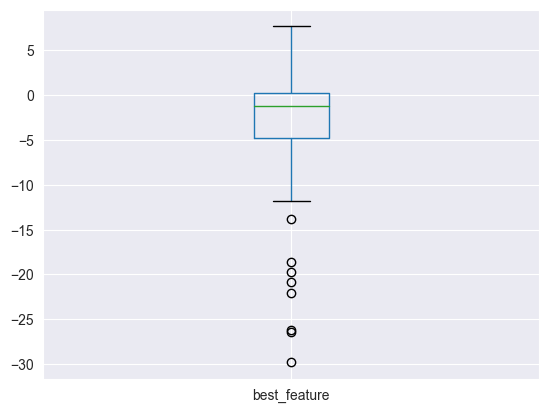

count    72.000000
mean     -3.640967
std       7.614582
min     -29.793510
25%      -4.770681
50%      -1.284786
75%       0.212577
max       7.638889
Name: best_feature, dtype: float64
only improved datasets


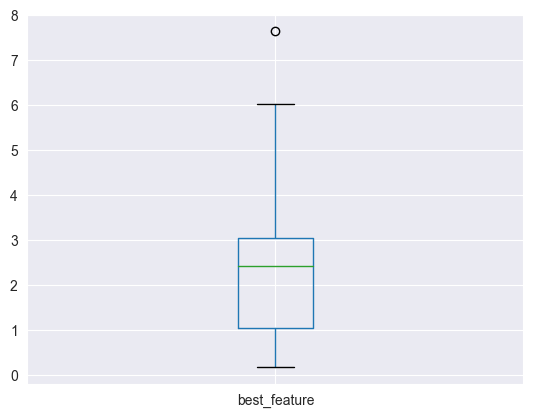

C:\Users\jonas\AppData\Local\Temp\ipykernel_21548\1695562739.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns="best_feature", inplace=True)


count    19.000000
mean      2.495579
std       1.973238
min       0.173060
25%       1.051457
50%       2.420242
75%       3.042240
max       7.638889
Name: best_feature, dtype: float64
                              dataset_name      PCA     KPCA   KMEANS  \
0                                 kr-vs-kp -41.9811 -44.6226 -44.9057   
1                                   letter -86.2429 -87.3177 -94.3651   
2                            balance-scale -36.0215 -34.9462 -10.7527   
3                            mfeat-factors -22.1198 -42.3963 -29.9539   
4                            mfeat-fourier -66.7820 -67.1280 -81.8339   
5                                 breast-w  -0.8734  -1.7467  -1.7467   
6                           mfeat-karhunen -75.5039 -67.7519 -14.5736   
7                      mfeat-morphological -23.9264 -29.8569  -6.9530   
8                            mfeat-zernike -41.2313 -62.8731 -60.4478   
9                                      cmc -25.2708 -26.7148 -28.5199   
10        

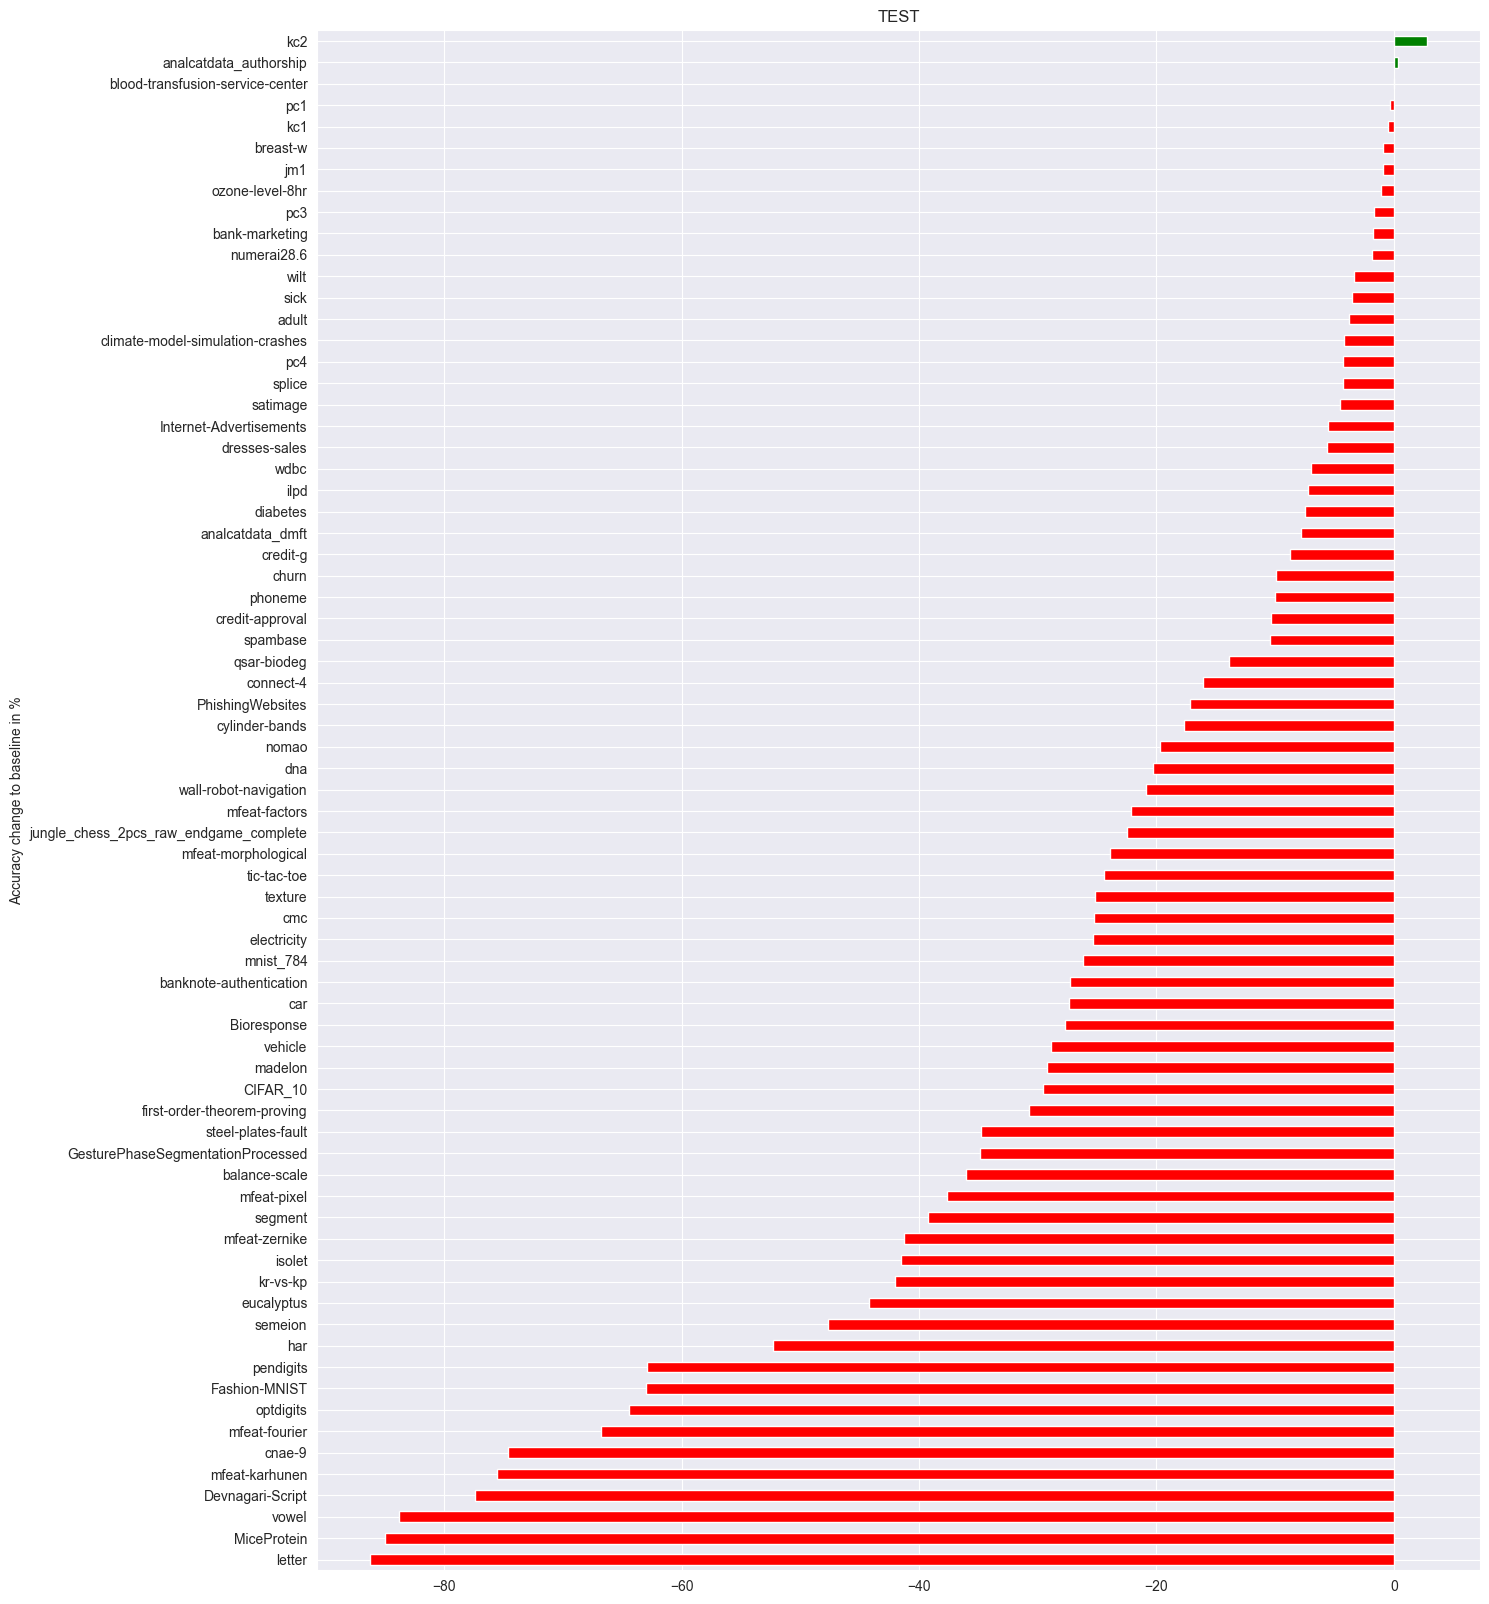

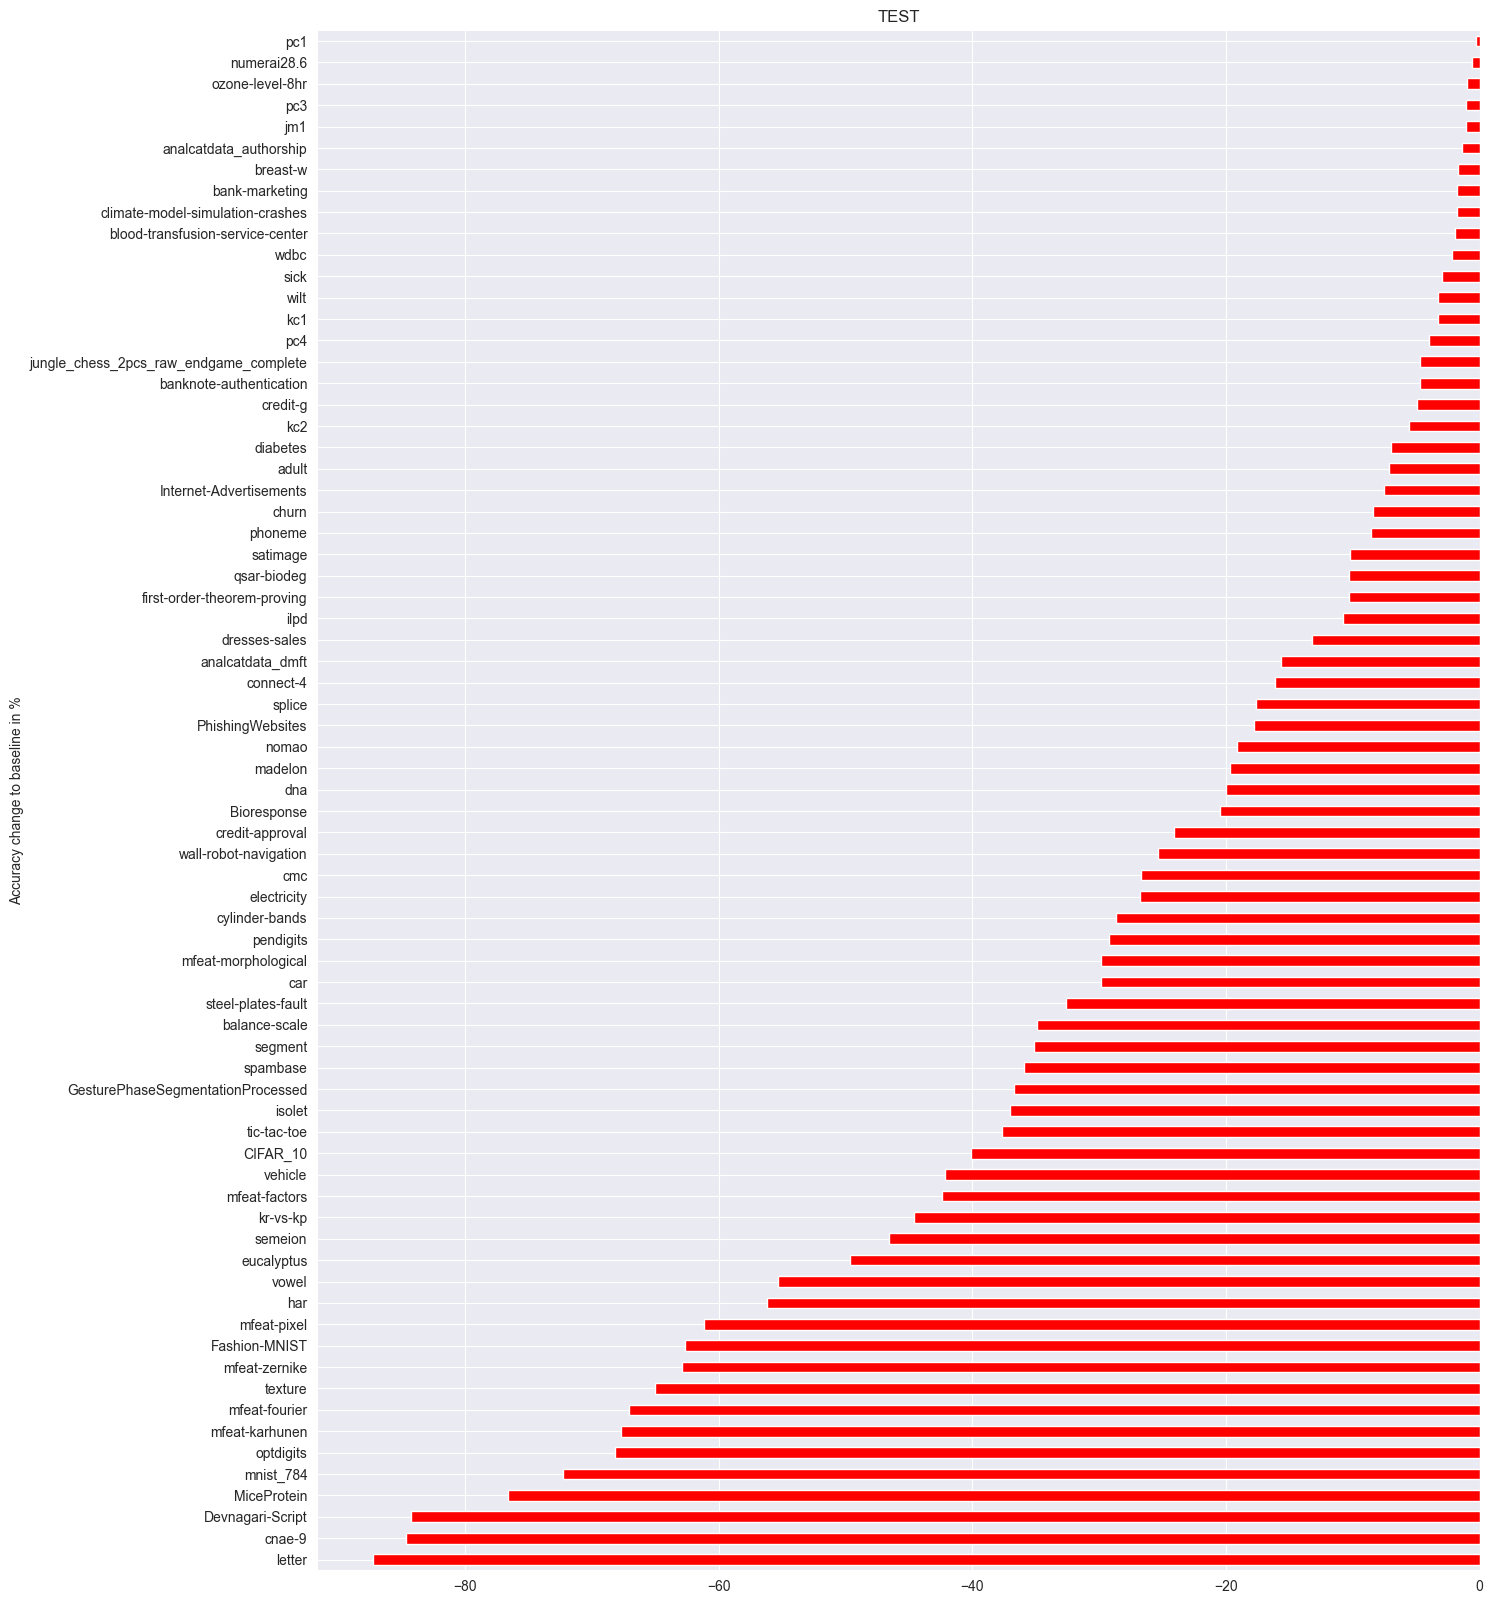

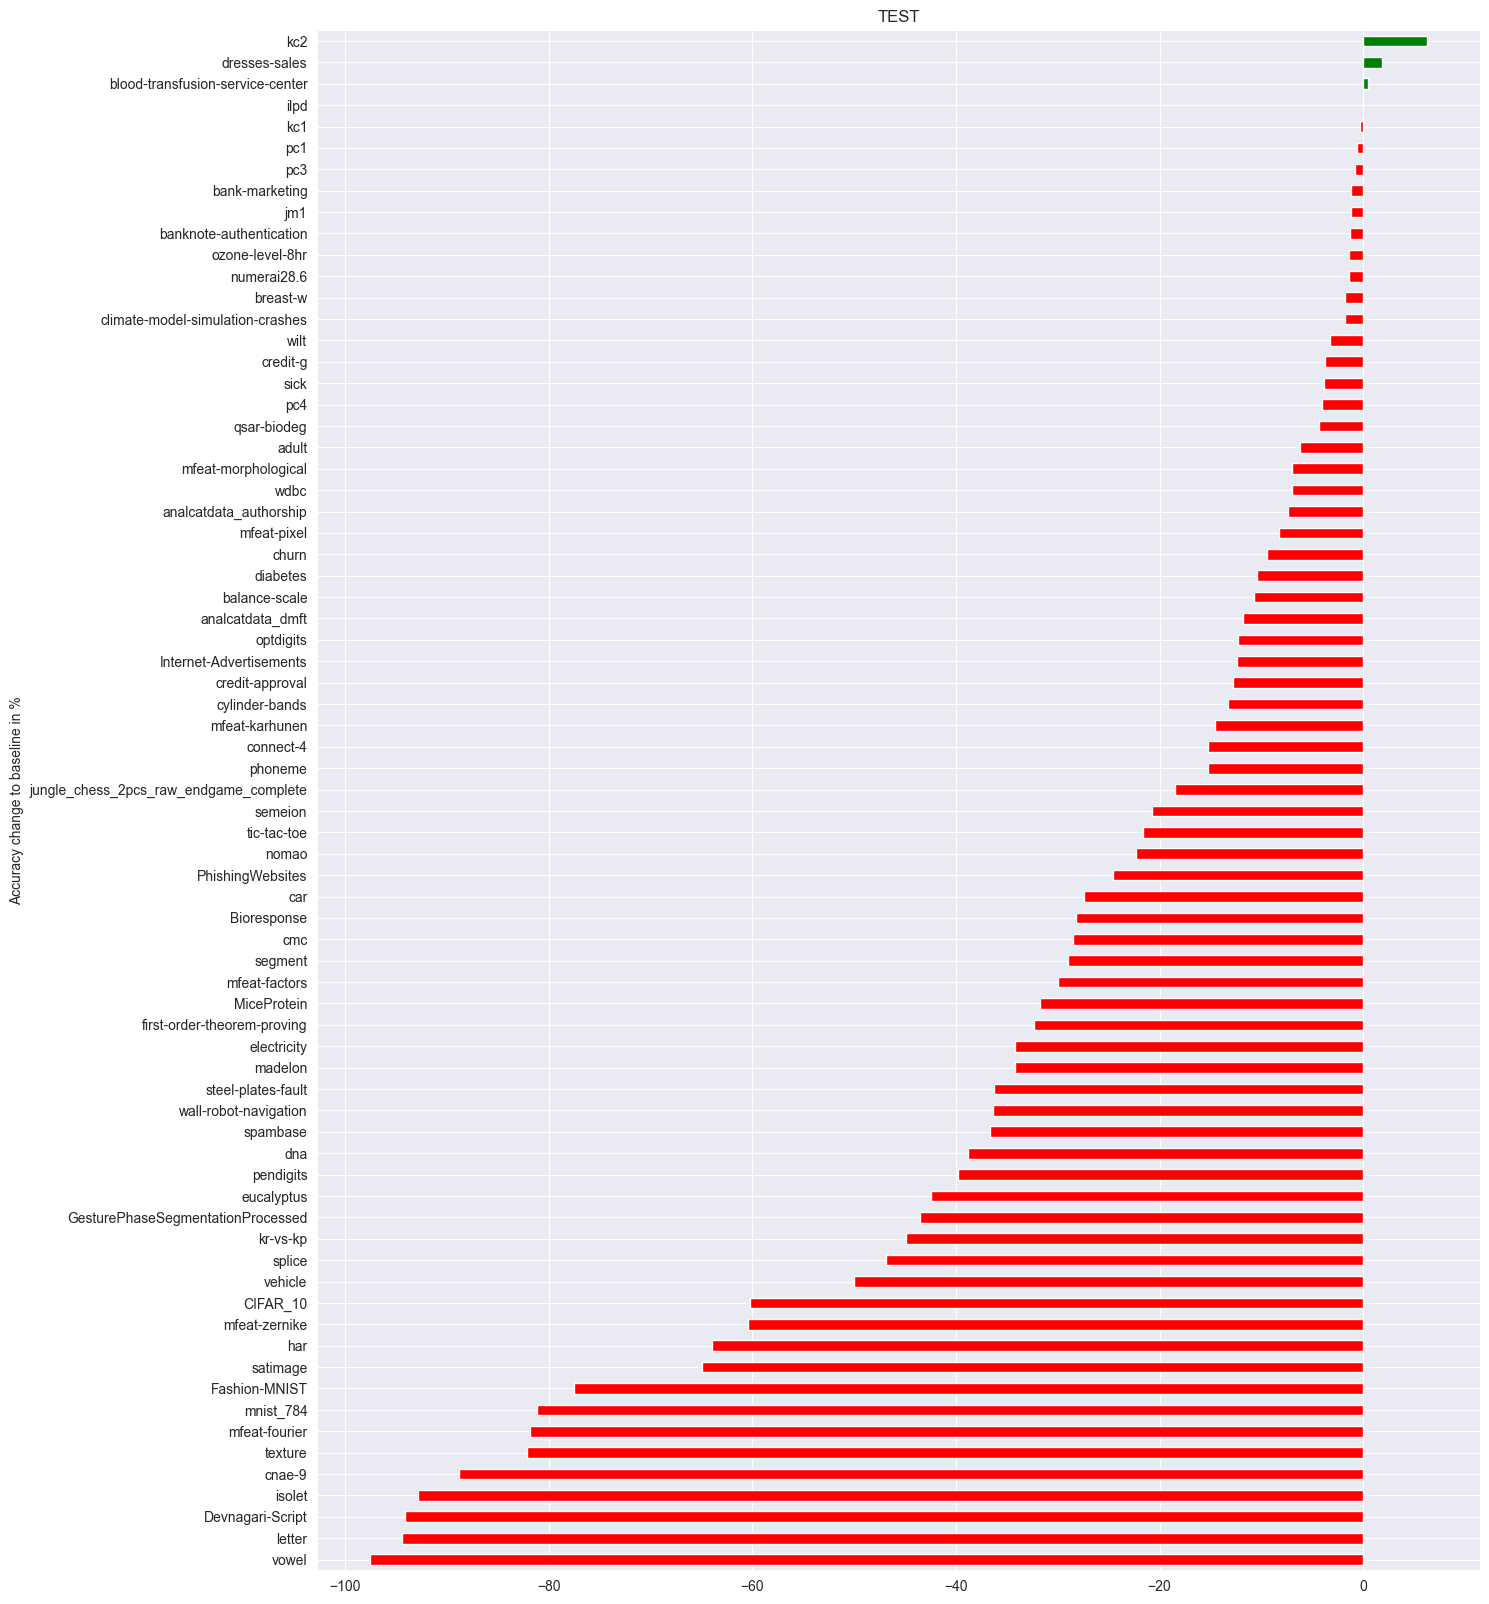

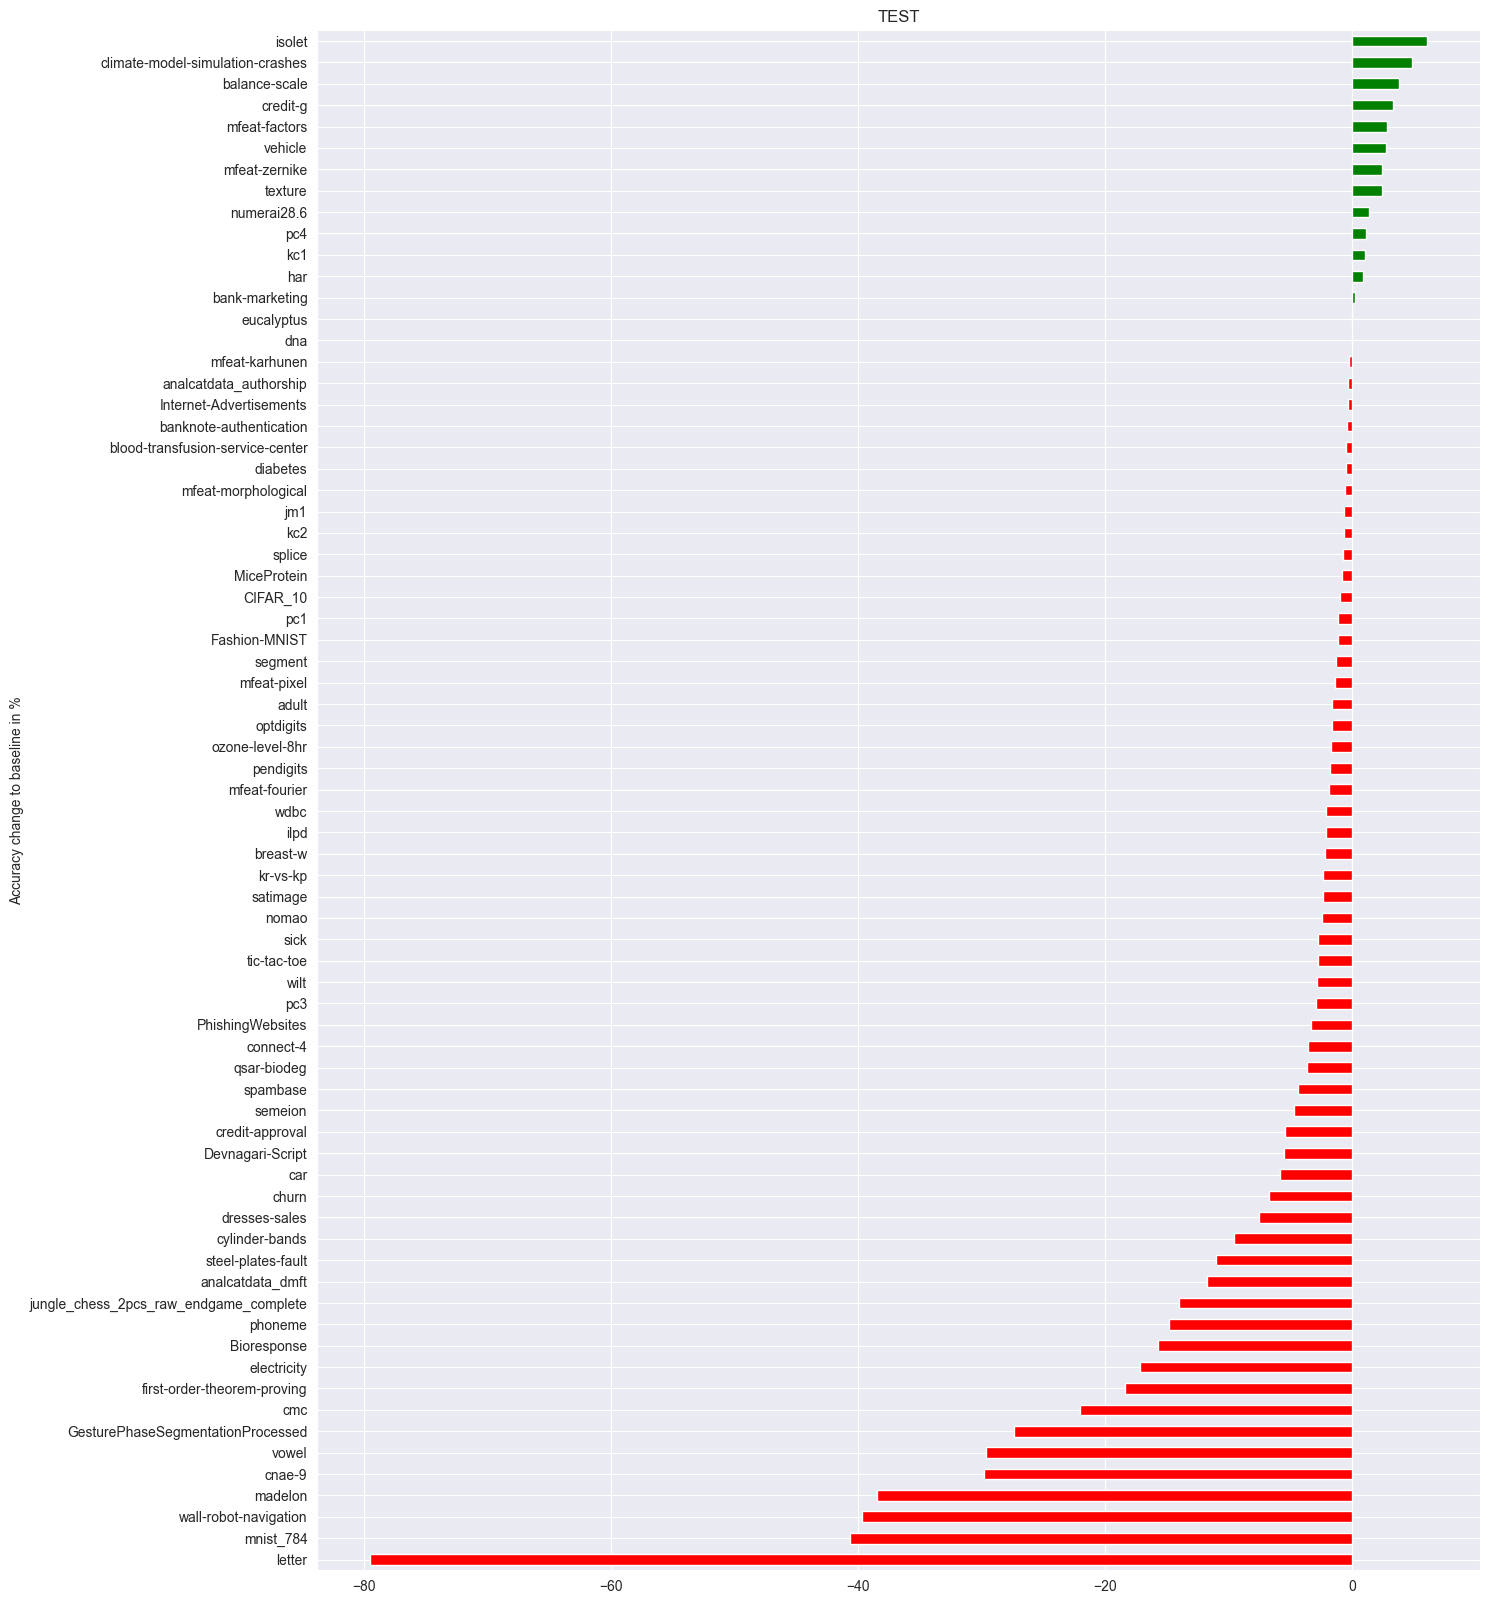

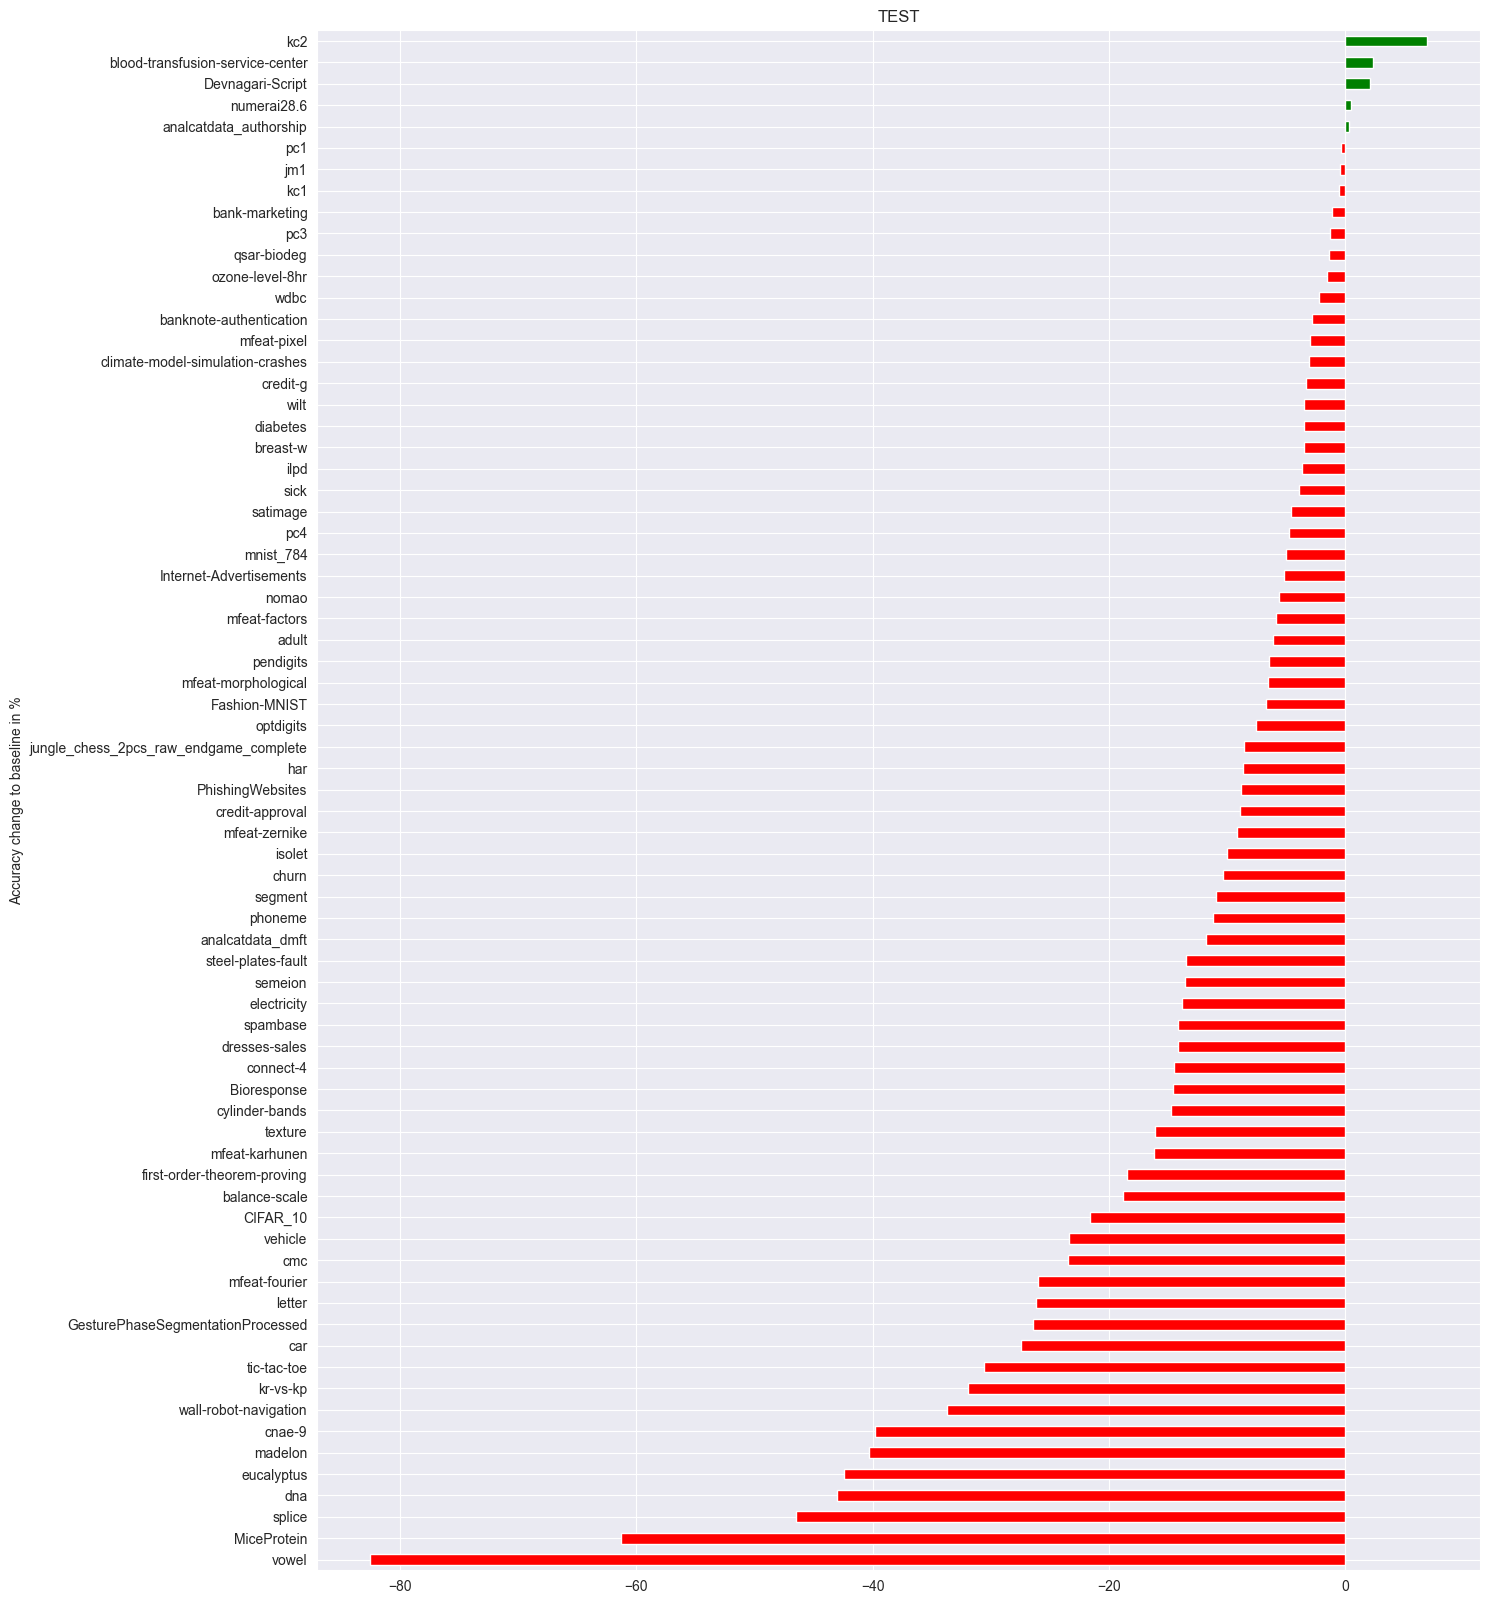

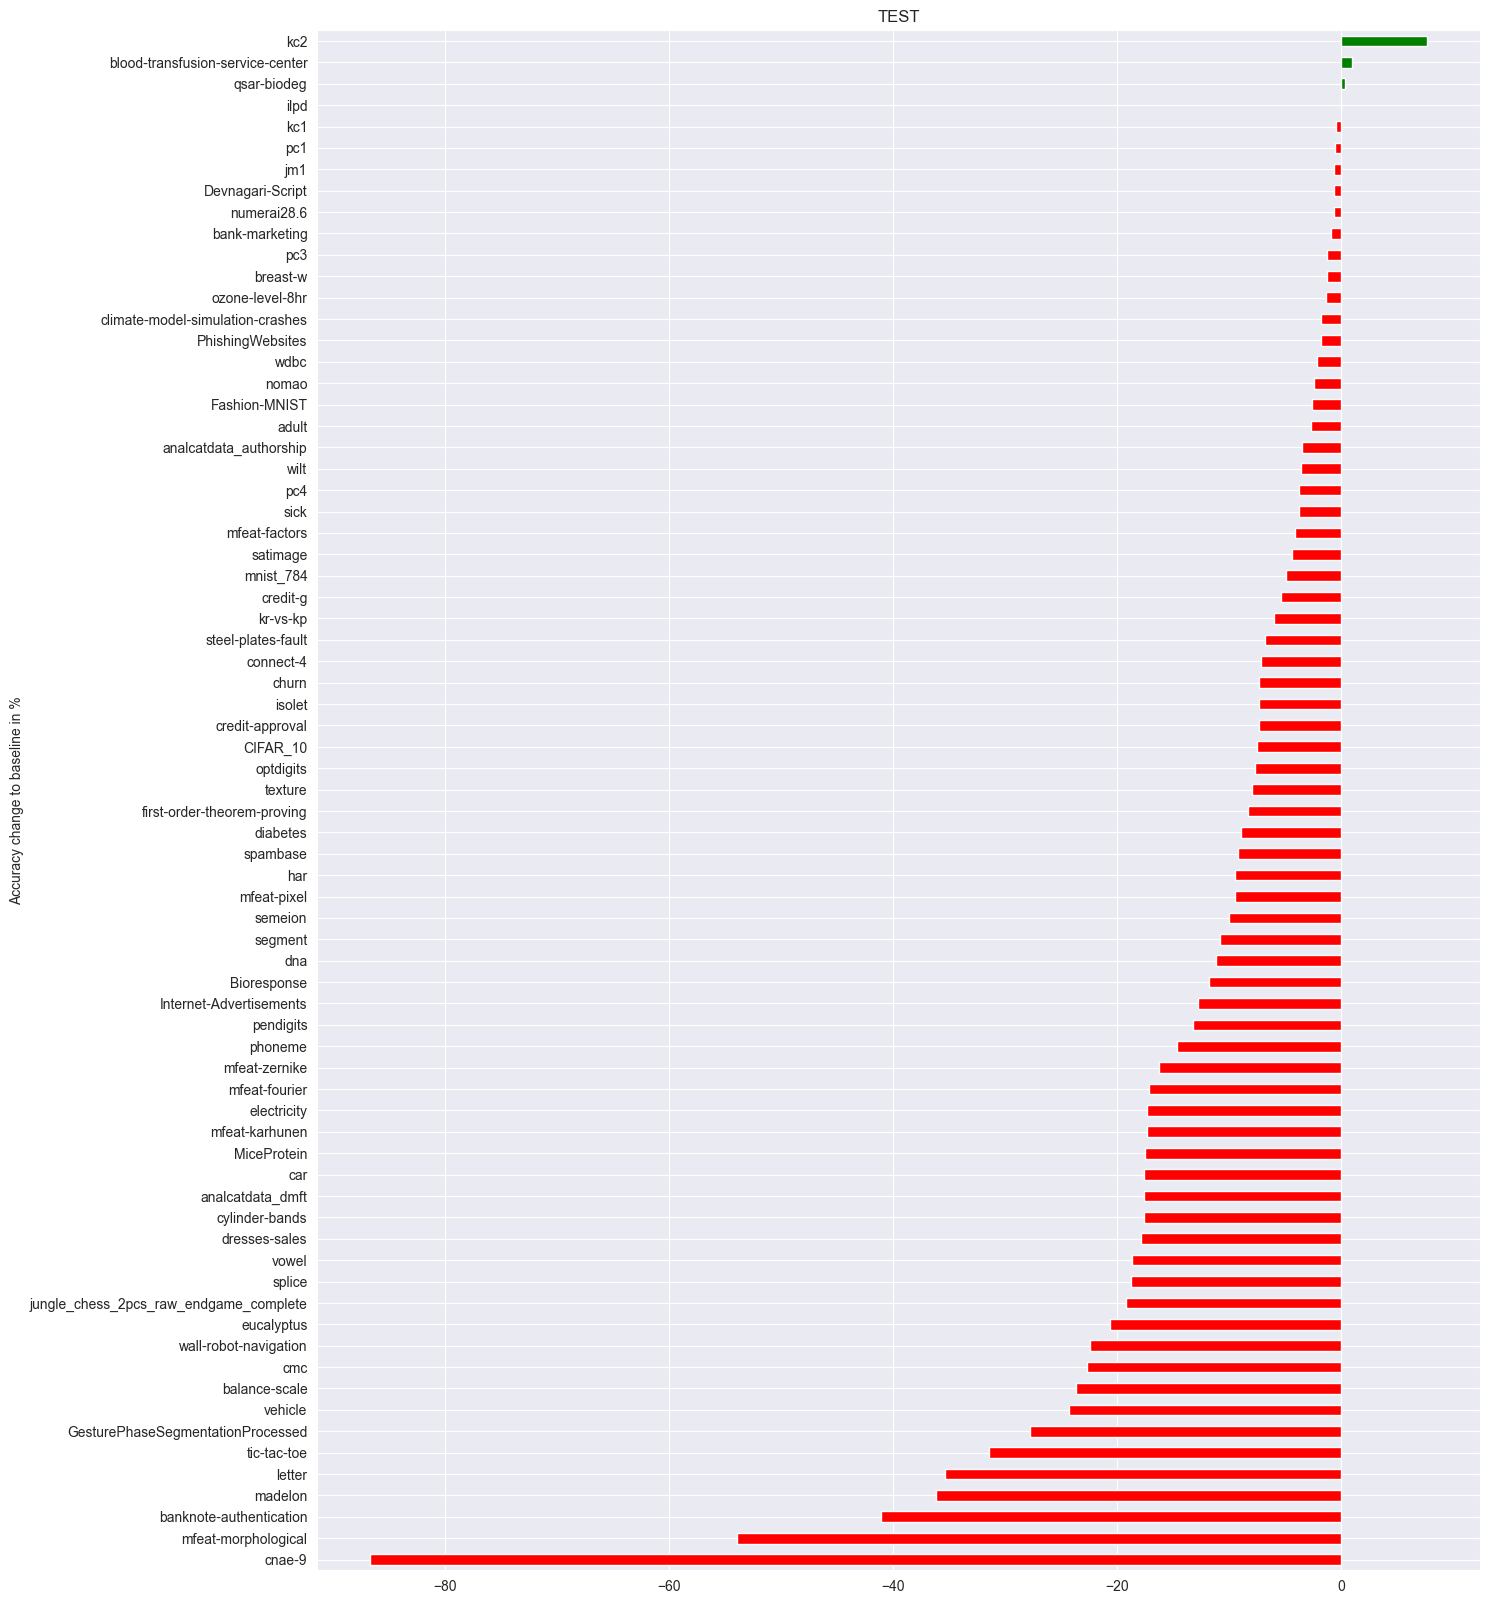

In [95]:
calc_stats_and_plot_all_featuretypes(df, feature_column_split_index=1)

# Features filtered only vs. baseline


In [96]:
df = df_results.loc[:, df_results.columns.str.contains("only_[a-zA-Z]+_filtered_test_score_change_to_baseline_filtered|dataset_id|dataset_name", regex=True)]
df.head()


dataset_id   dataset_name  \
0           3       kr-vs-kp   
1           6         letter   
2          11  balance-scale   
3          12  mfeat-factors   
4          14  mfeat-fourier   

   only_pca_filtered_test_score_change_to_baseline_filtered  \
0                                                -33.301887   
1                                                -78.473822   
2                                                -36.021505   
3                                                -31.797235   
4                                                -15.397924   

   only_kpca_filtered_test_score_change_to_baseline_filtered  \
0                                                 -25.188679   
1                                                 -77.015200   
2                                                 -34.946237   
3                                                 -32.565284   
4                                                 -46.539792   

   only_kmeans_filtered_test_score_change_to_baseline_filtered  \
0                                                   -25.094340   
1                                                   -54.629203   
2                                                   -10.752688   
3                                                   -25.960061   
4                                                   -35.640138   

   only_lda_filtered_test_score_change_to_baseline_filtered  \
0                                                 -3.207547   
1                                                -73.760172   
2                                                  3.763441   
3                                                  0.153610   
4                                                 -2.422145   

   only_umap_filtered_test_score_change_to_baseline_filtered  \
0                                                 -29.433962   
1                                                 -40.380777   
2                                                 -18.817204   
3                                                  -6.605223   
4                                                  -9.861592   

   only_autoencoder_filtered_test_score_change_to_baseline_filtered  
0                                                         -4.811321  
1                                                        -30.370029  
2                                                        -47.849462  
3                                                         -3.686636  
4                                                        -13.321799

Total improved Datasets over all features: 22 (0.31%)

Anzahl Datasets
  feature_name  improved  unchanged  decreased
0          PCA         4          3         65
1         KPCA         1          1         70
2       KMEANS         5          2         65
3          LDA        12          2         58
4         UMAP         4          2         66
5  AUTOENCODER         5          0         67

Prozent Datasets
  feature_name  improved  unchanged  decreased
0          PCA      0.06       0.04       0.90
1         KPCA      0.01       0.01       0.97
2       KMEANS      0.07       0.03       0.90
3          LDA      0.17       0.03       0.81
4         UMAP      0.06       0.03       0.92
5  AUTOENCODER      0.07       0.00       0.93
all datasets


C:\Users\jonas\AppData\Local\Temp\ipykernel_21548\1695562739.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["best_feature"] = highest_values


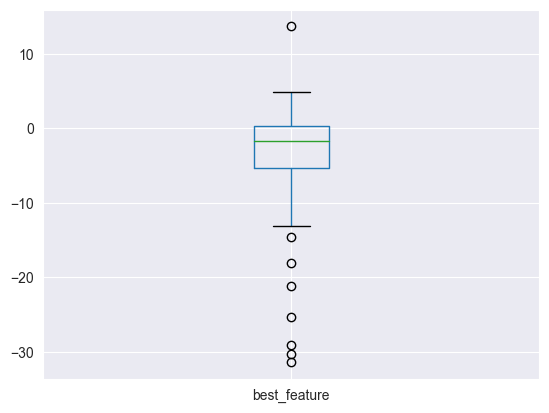

count    72.000000
mean     -3.875138
std       7.989386
min     -31.426303
25%      -5.329153
50%      -1.691224
75%       0.274971
max      13.725490
Name: best_feature, dtype: float64
only improved datasets


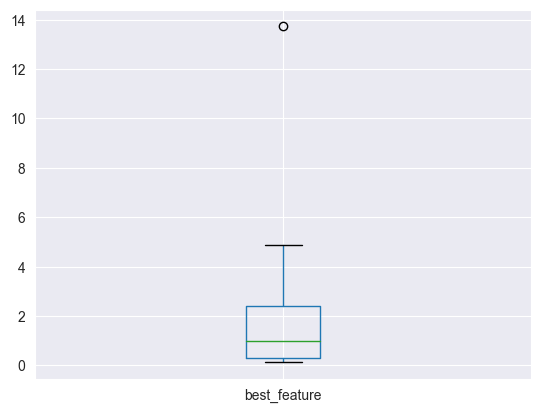

count    22.000000
mean      1.948660
std       2.944998
min       0.127119
25%       0.286211
50%       1.001053
75%       2.410339
max      13.725490
Name: best_feature, dtype: float64


C:\Users\jonas\AppData\Local\Temp\ipykernel_21548\1695562739.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns="best_feature", inplace=True)


                              dataset_name      PCA     KPCA   KMEANS  \
0                                 kr-vs-kp -33.3019 -25.1887 -25.0943   
1                                   letter -78.4738 -77.0152 -54.6292   
2                            balance-scale -36.0215 -34.9462 -10.7527   
3                            mfeat-factors -31.7972 -32.5653 -25.9601   
4                            mfeat-fourier -15.3979 -46.5398 -35.6401   
5                                 breast-w  -0.8734  -1.7467  -1.7467   
6                           mfeat-karhunen -58.6047 -64.8062 -11.7829   
7                      mfeat-morphological -23.9264 -29.8569  -6.9530   
8                            mfeat-zernike -62.1269 -39.3657 -38.6194   
9                                      cmc -10.1083 -15.8845  -7.2202   
10                               optdigits -58.2623 -61.7804 -24.5736   
11                         credit-approval -13.7931 -11.3300  -0.4926   
12                                credit-g  -3.3195

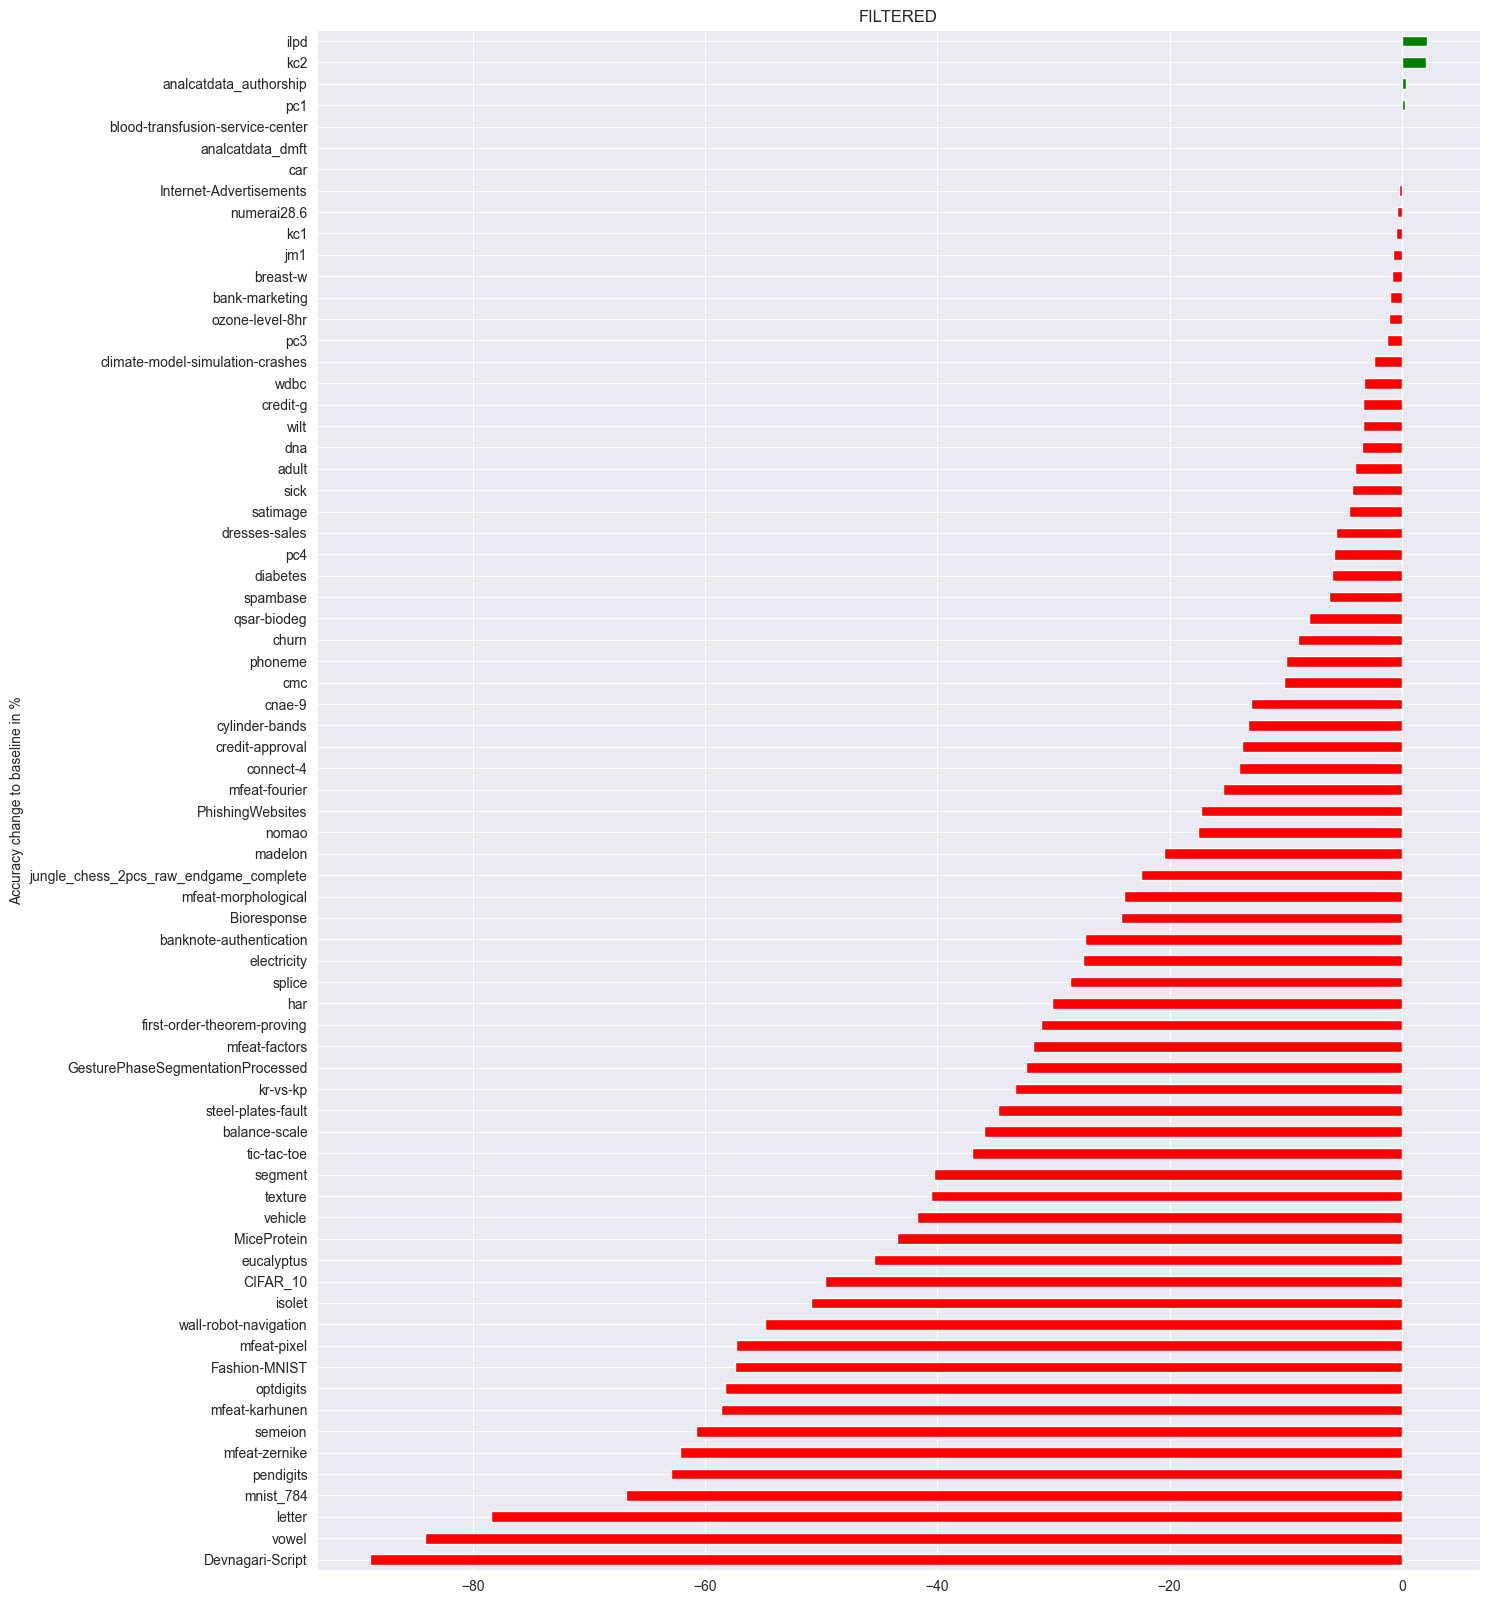

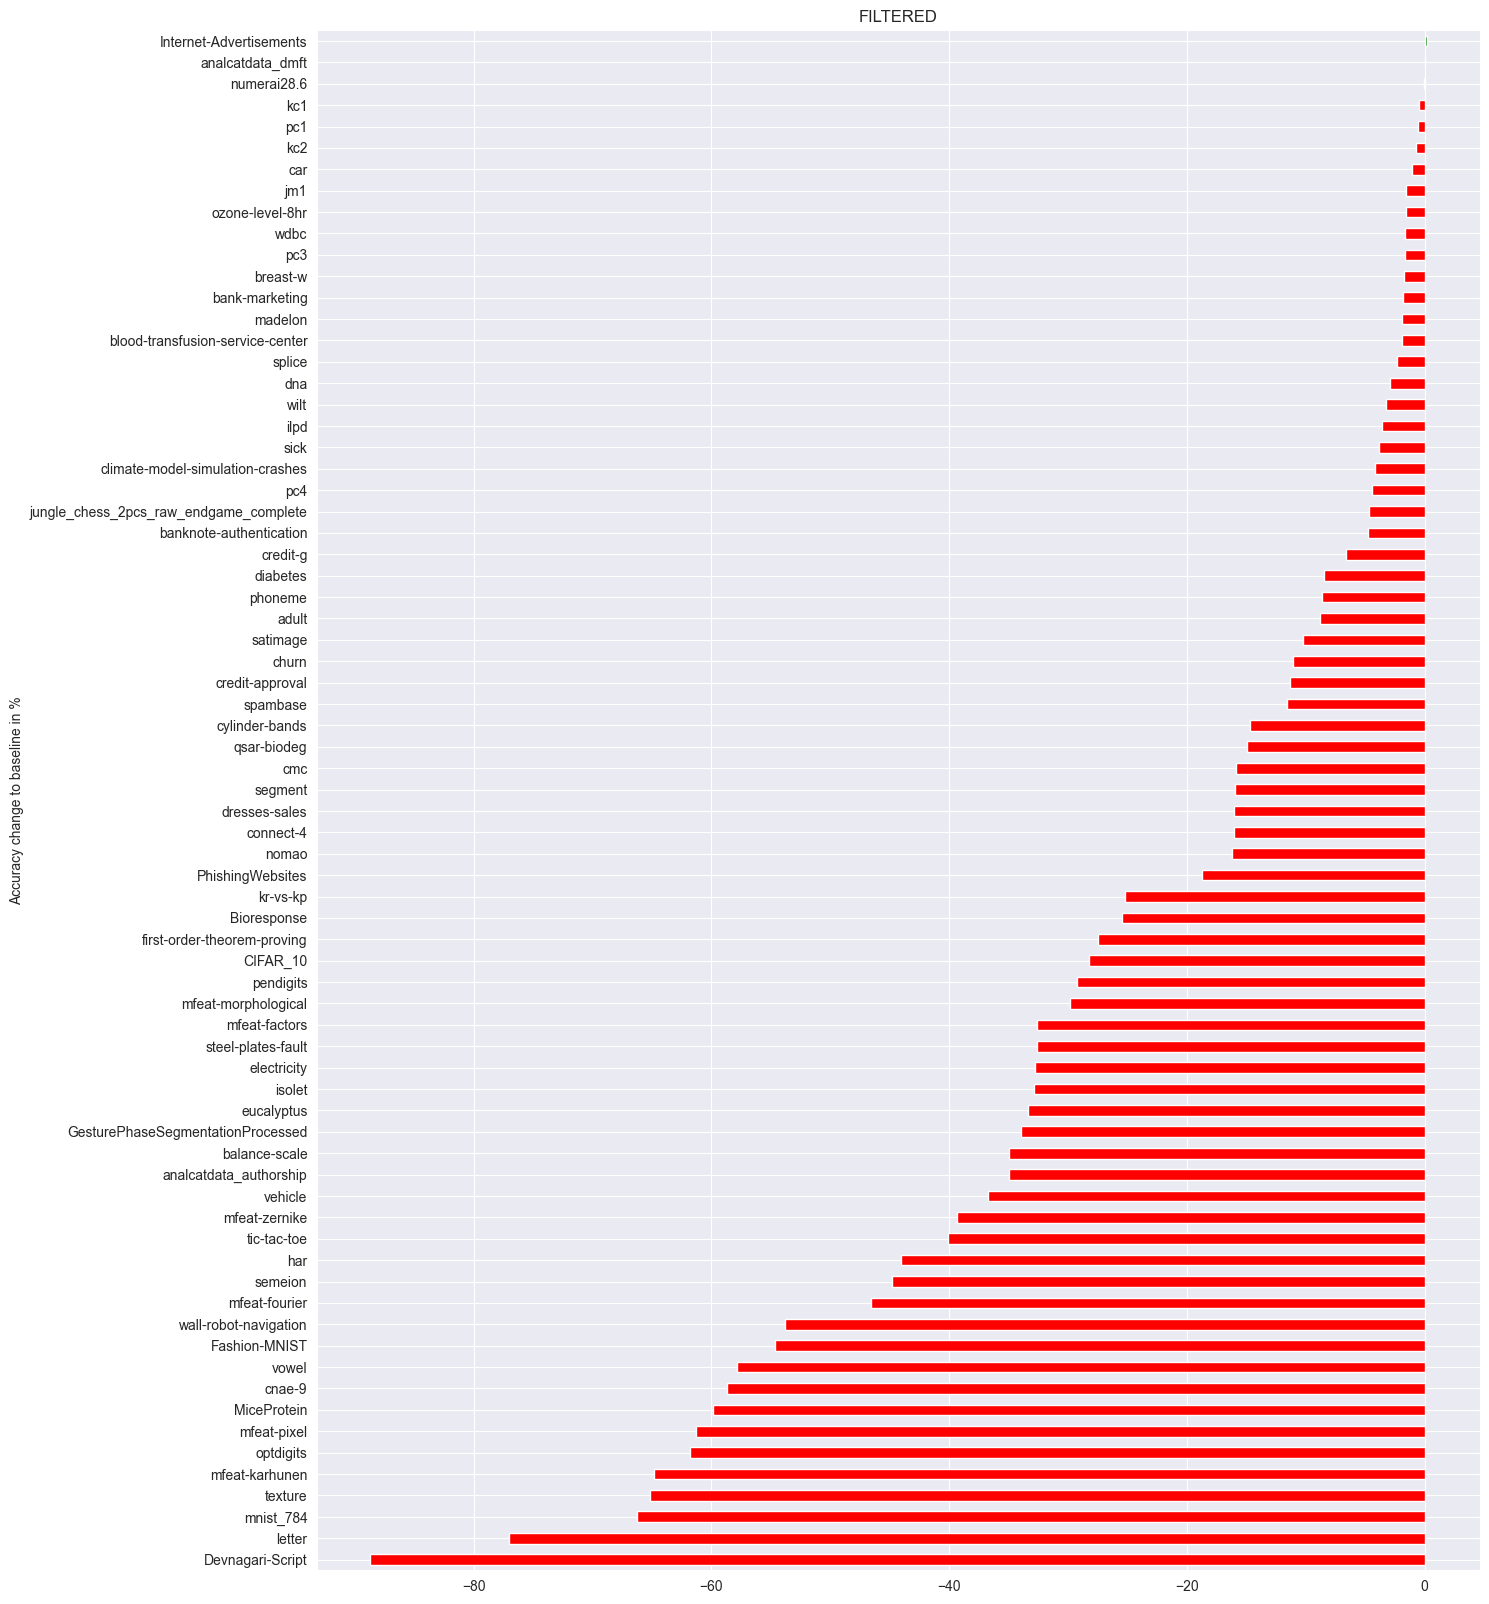

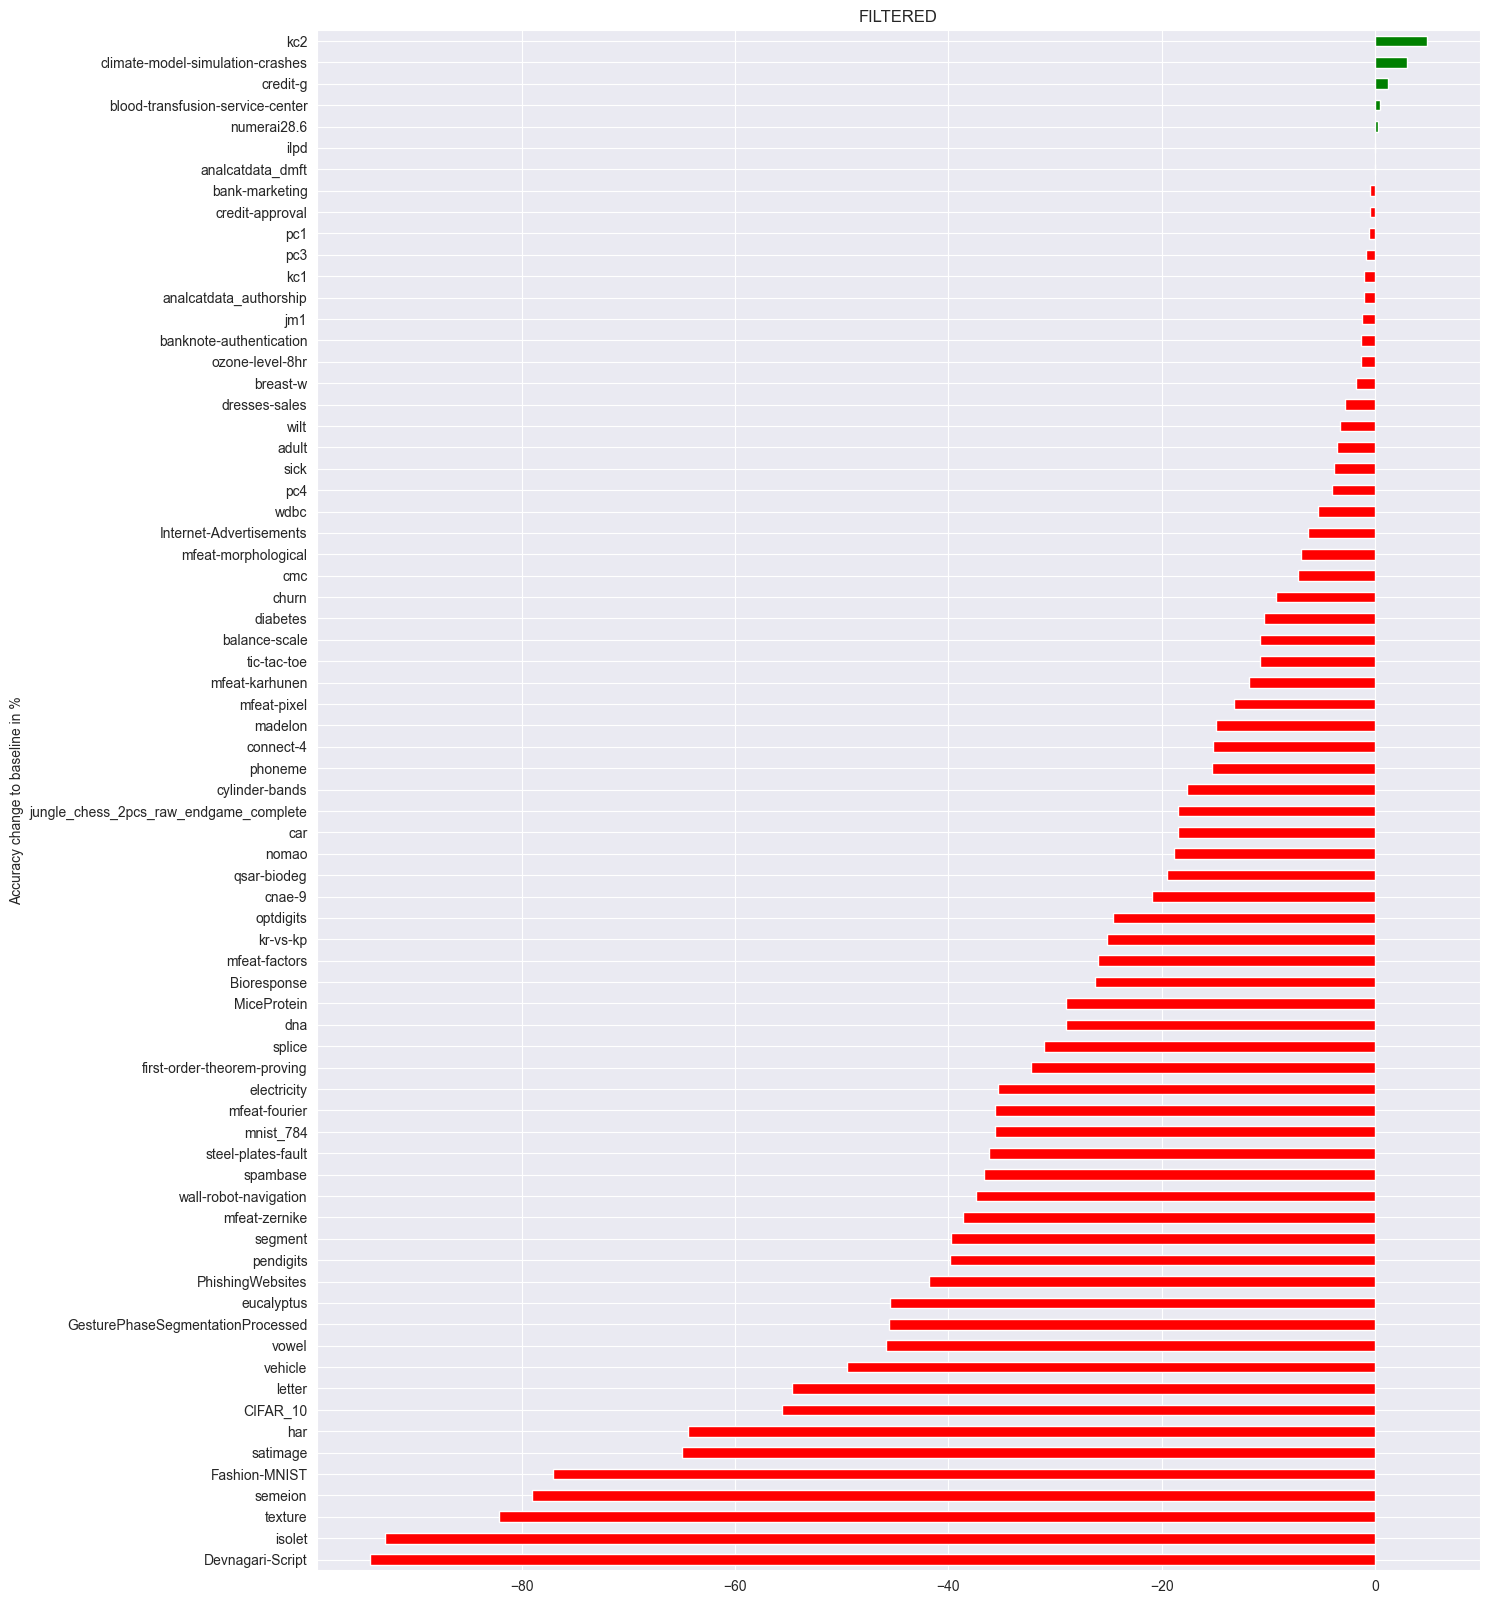

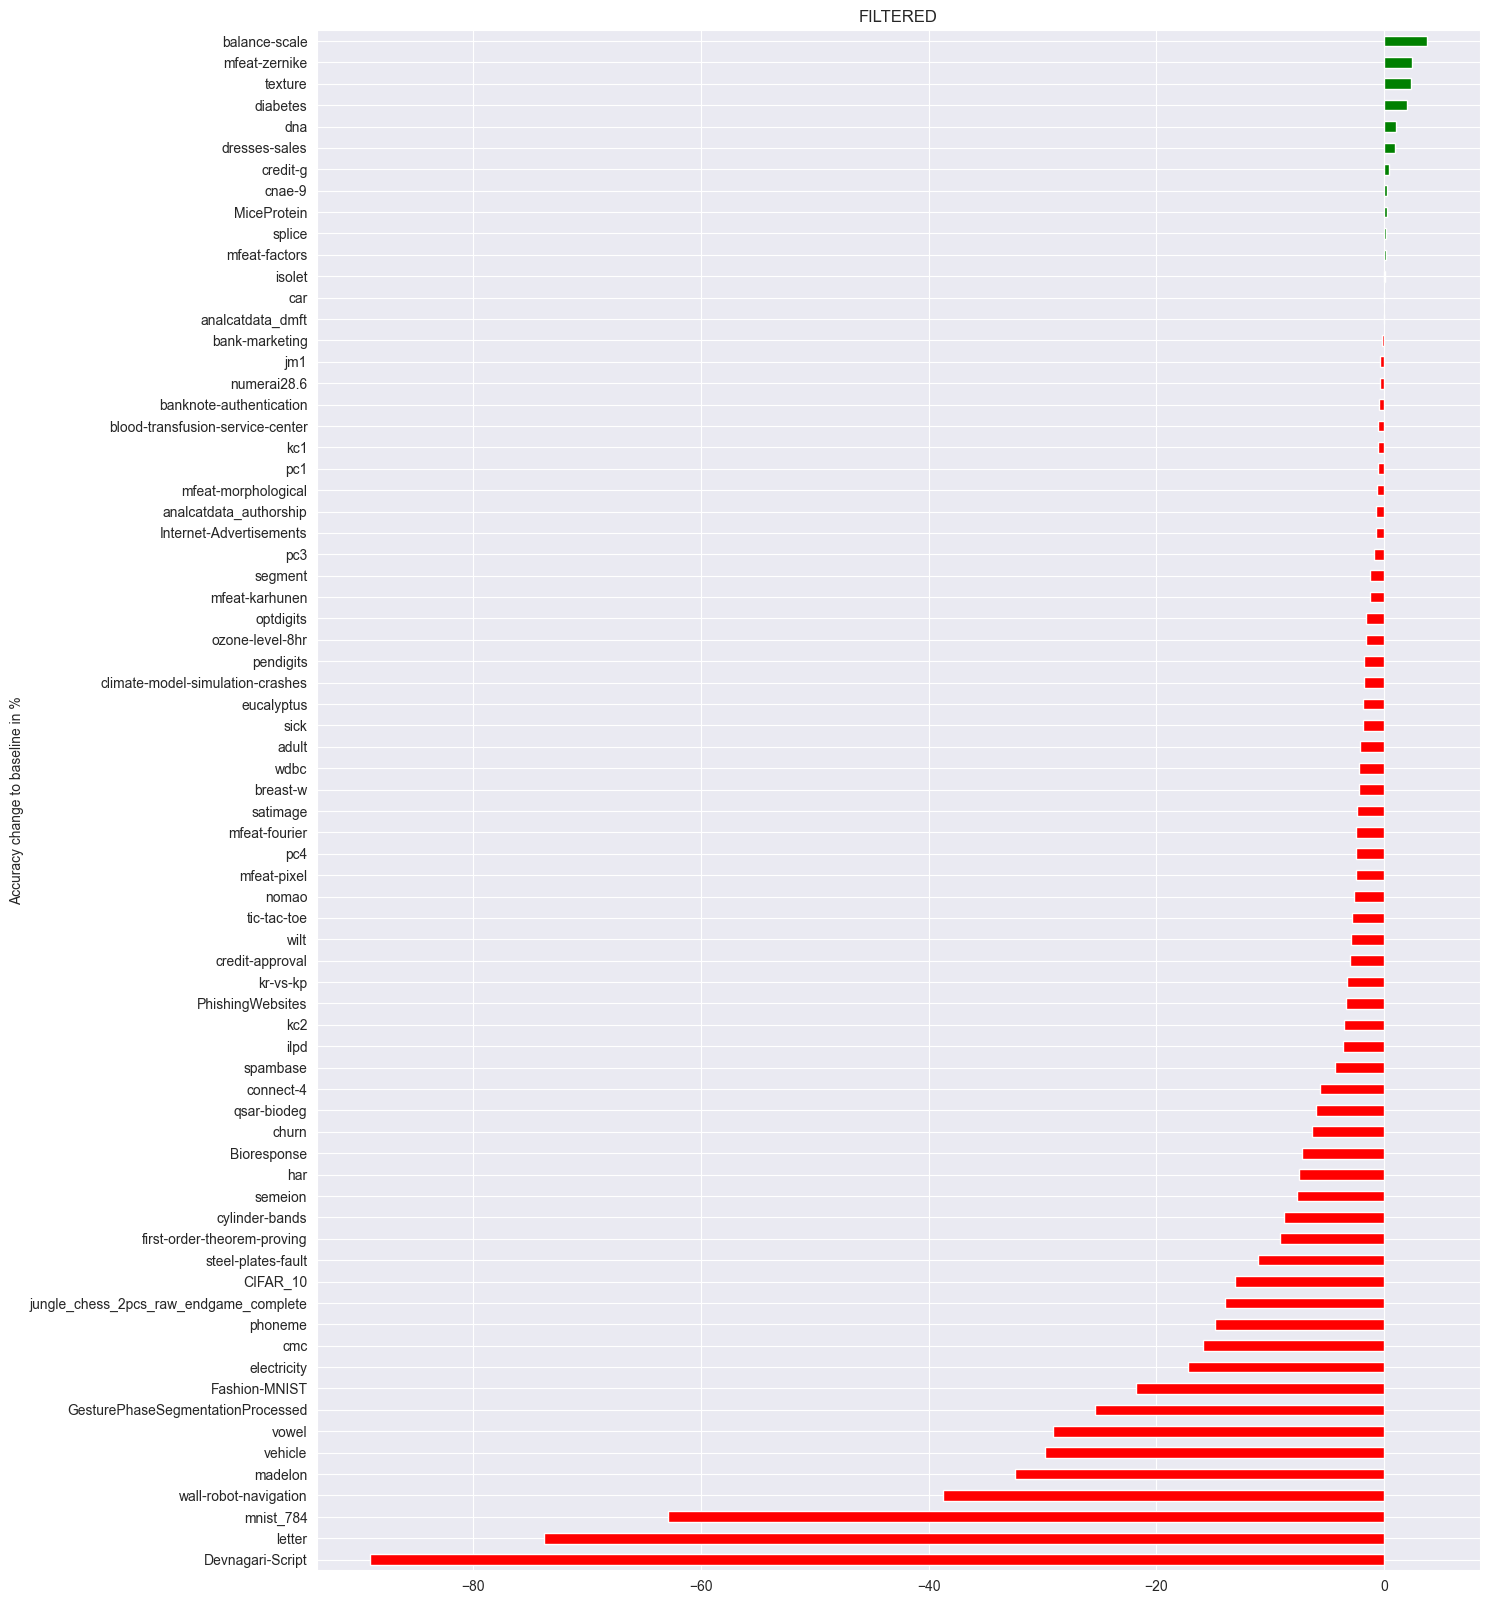

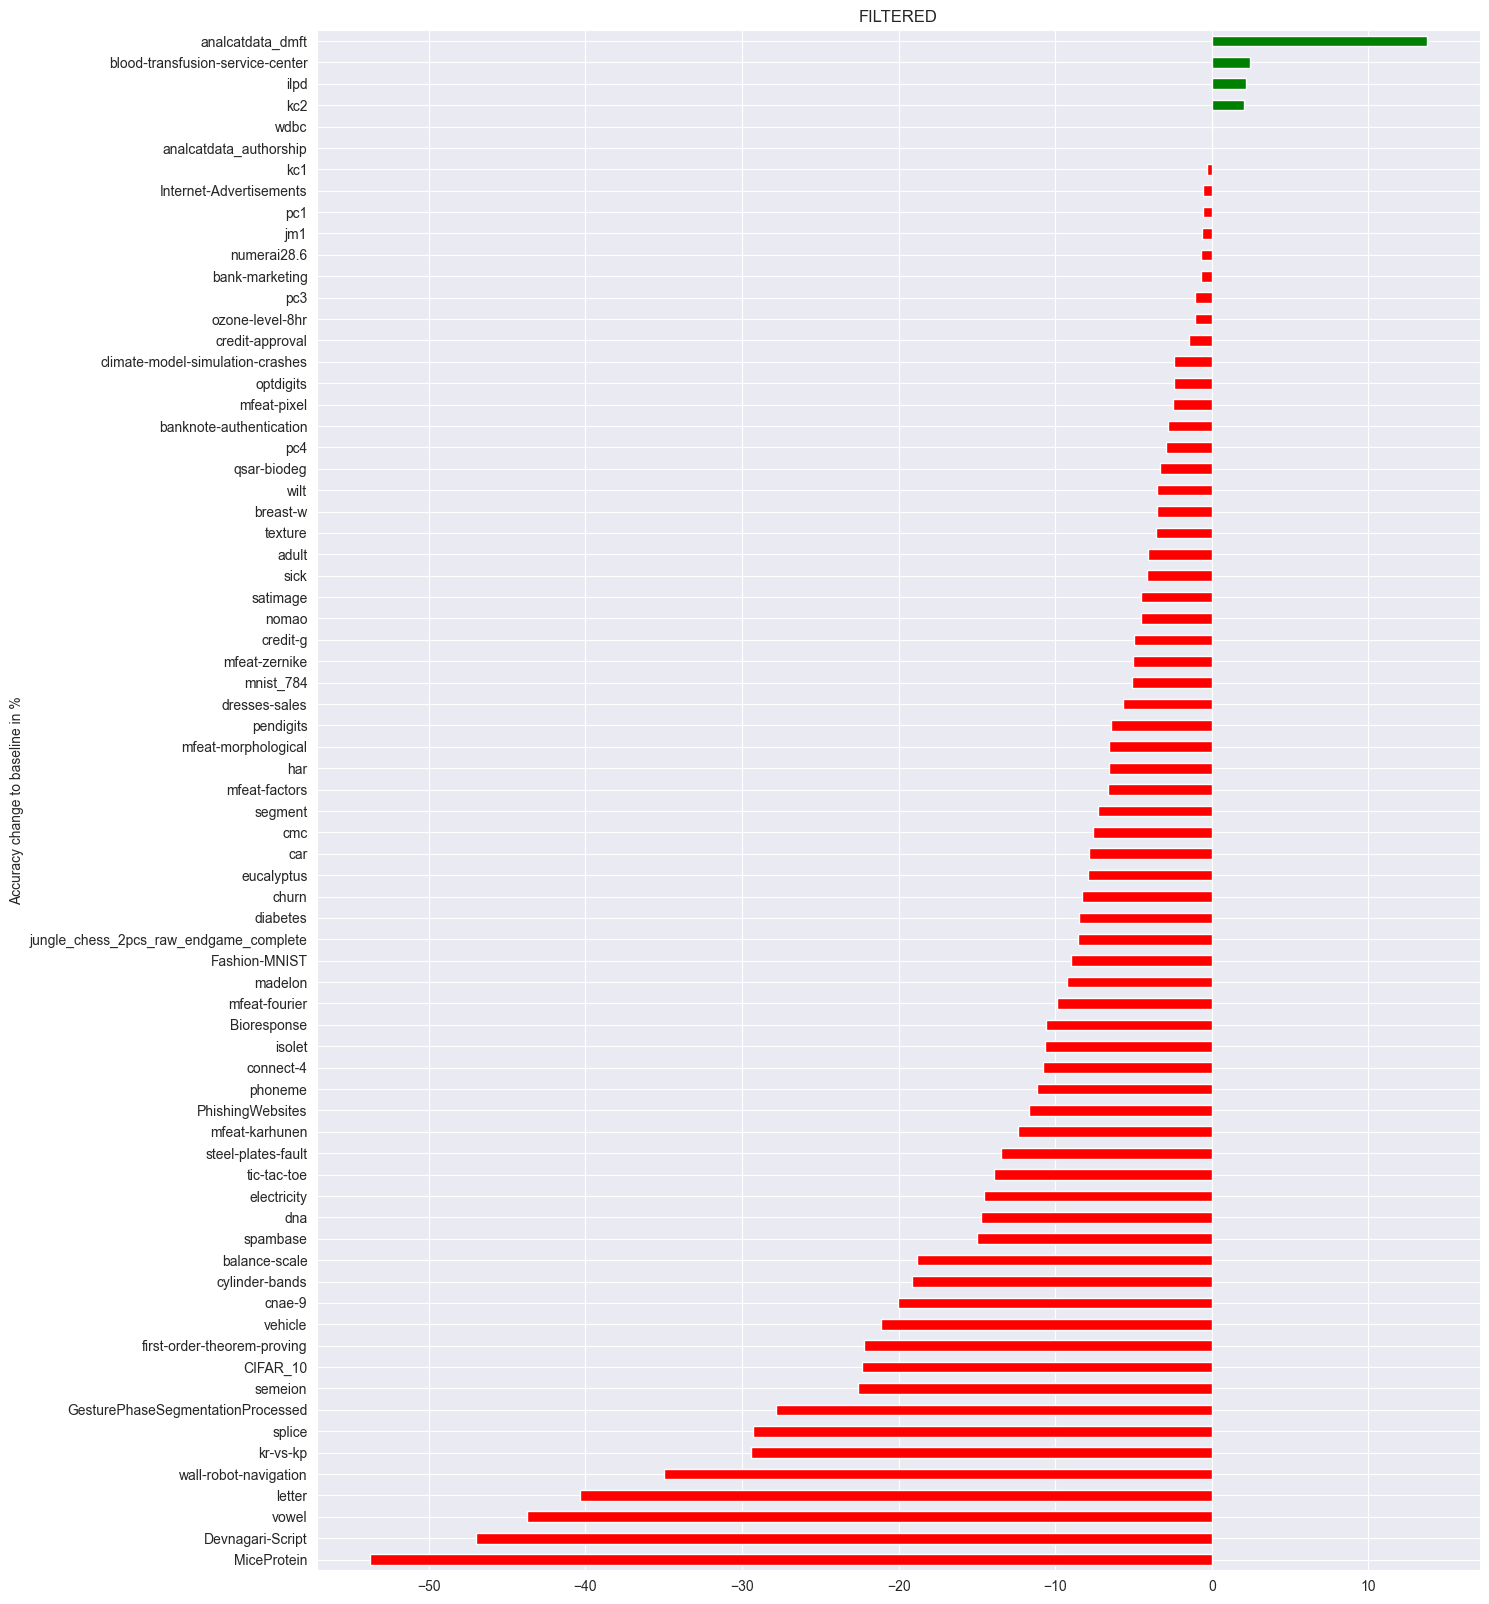

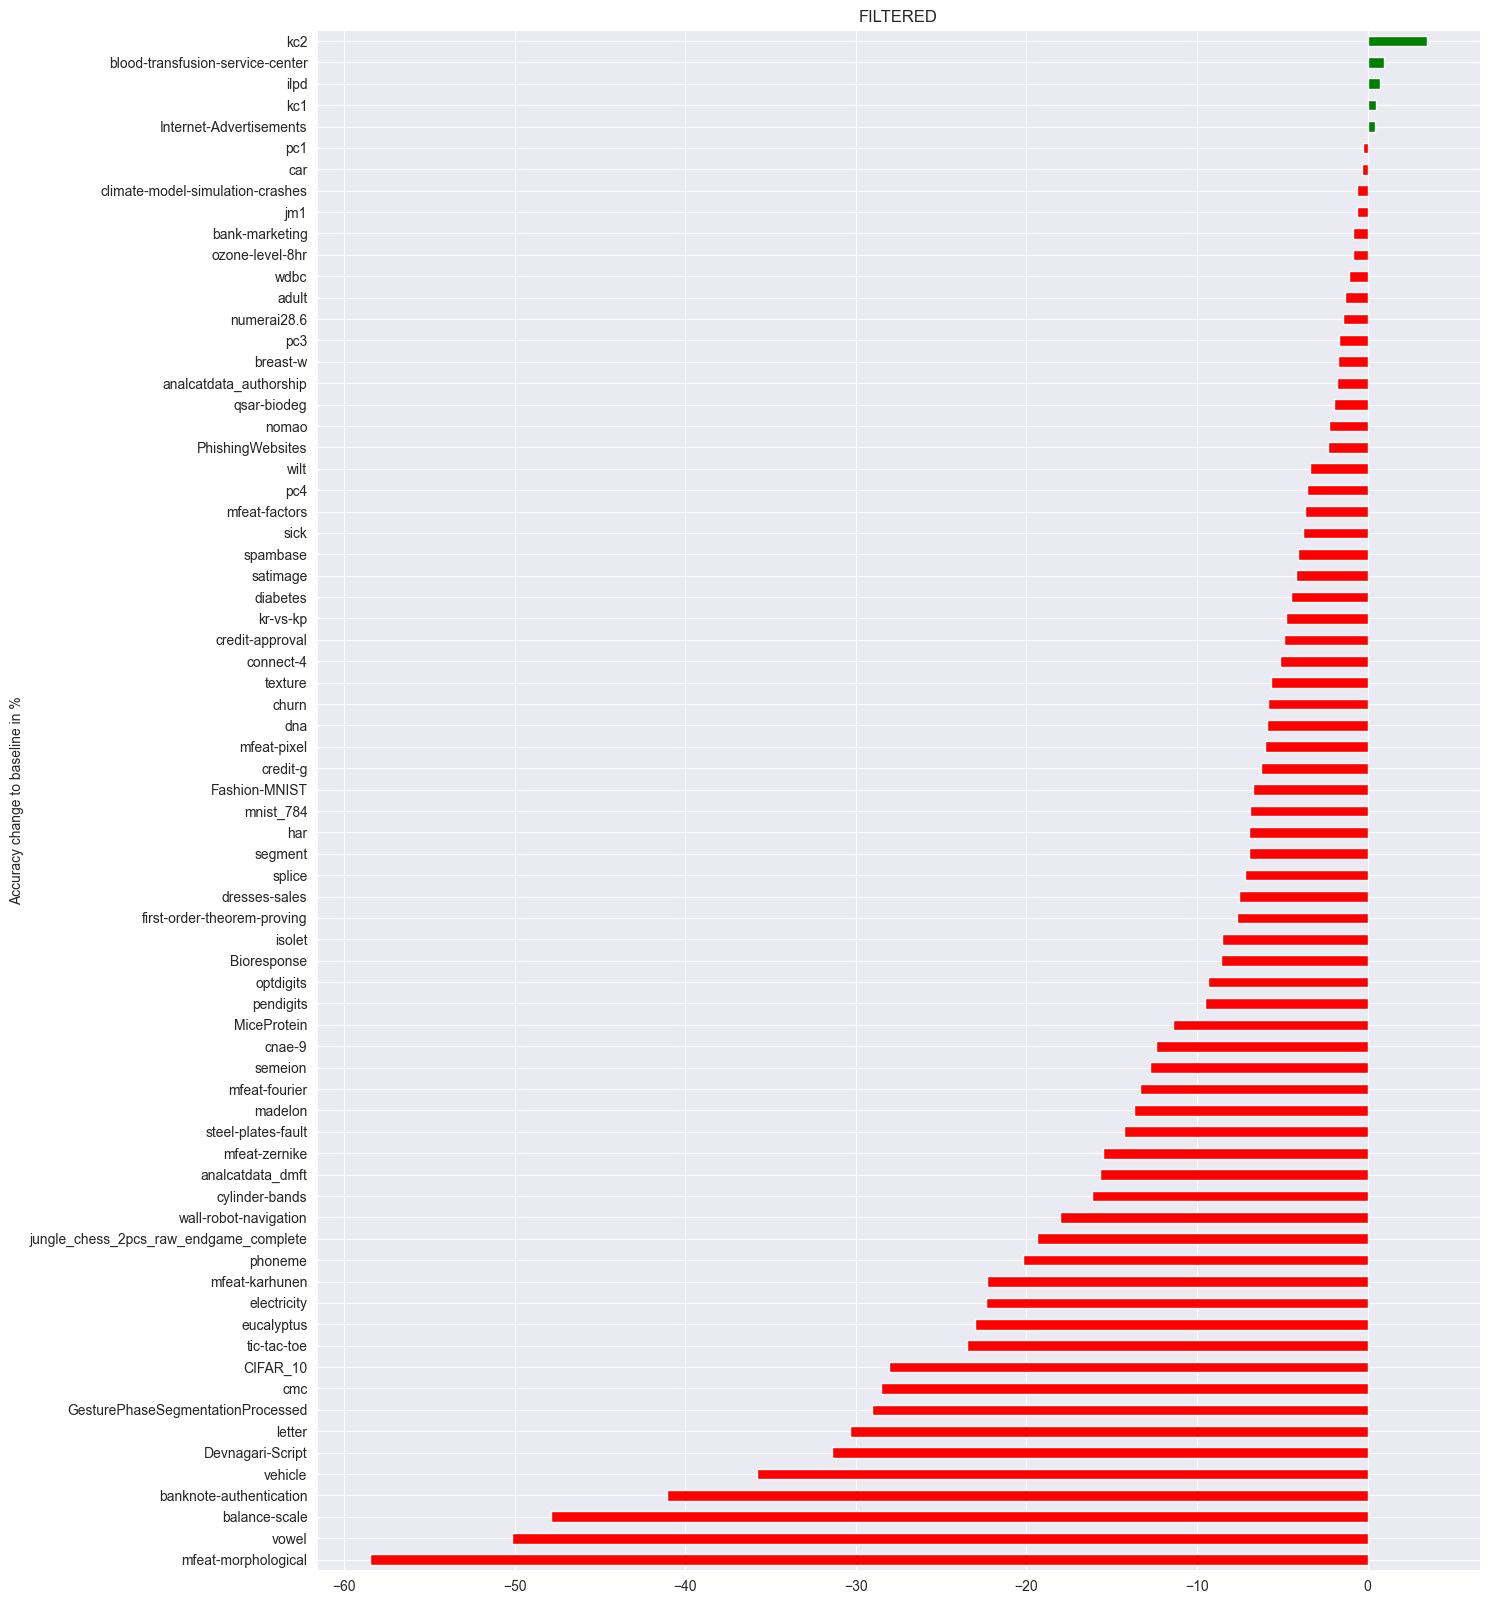

In [97]:
calc_stats_and_plot_all_featuretypes(df, feature_column_split_index=1)

# Baseline features filtered with new features vs. baseline

In [98]:
df = df_results.loc[:, df_results.columns.str.contains("baseline_filtered_[a-zA-Z]+_test_score_change_to_baseline_filtered|dataset_id|dataset_name", regex=True)]
df.head()

dataset_id   dataset_name  \
0           3       kr-vs-kp   
1           6         letter   
2          11  balance-scale   
3          12  mfeat-factors   
4          14  mfeat-fourier   

   baseline_filtered_pca_test_score_change_to_baseline_filtered  \
0                                                      0.377358   
1                                                     -0.399202   
2                                                     -1.075269   
3                                                     -0.153610   
4                                                      0.000000   

   baseline_filtered_kpca_test_score_change_to_baseline_filtered  \
0                                                       0.660377   
1                                                       0.230309   
2                                                      -1.075269   
3                                                       0.153610   
4                                                      -0.173010   

   baseline_filtered_kmeans_test_score_change_to_baseline_filtered  \
0                                                         0.188679   
1                                                         0.245663   
2                                                        -3.225806   
3                                                        -0.307220   
4                                                        -0.692042   

   baseline_filtered_lda_test_score_change_to_baseline_filtered  \
0                                                      1.415094   
1                                                     -0.168893   
2                                                      5.376344   
3                                                      2.611367   
4                                                     -1.730104   

   baseline_filtered_umap_test_score_change_to_baseline_filtered  \
0                                                       0.943396   
1                                                      -0.214955   
2                                                      -3.763441   
3                                                      -0.614439   
4                                                       0.000000   

   baseline_filtered_autoencoder_test_score_change_to_baseline_filtered  
0                                                              0.754717  
1                                                             -1.059420  
2                                                             -1.612903  
3                                                             -0.460829  
4                                                             -0.865052

Total improved Datasets over all features: 60 (0.83%)

Anzahl Datasets
  feature_name  improved  unchanged  decreased
0          PCA        30          8         34
1         KPCA        37          7         28
2       KMEANS        28         10         34
3          LDA        43          4         25
4         UMAP        36          5         31
5  AUTOENCODER        33          6         33

Prozent Datasets
  feature_name  improved  unchanged  decreased
0          PCA      0.42       0.11       0.47
1         KPCA      0.51       0.10       0.39
2       KMEANS      0.39       0.14       0.47
3          LDA      0.60       0.06       0.35
4         UMAP      0.50       0.07       0.43
5  AUTOENCODER      0.46       0.08       0.46
all datasets


C:\Users\jonas\AppData\Local\Temp\ipykernel_21548\1695562739.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["best_feature"] = highest_values


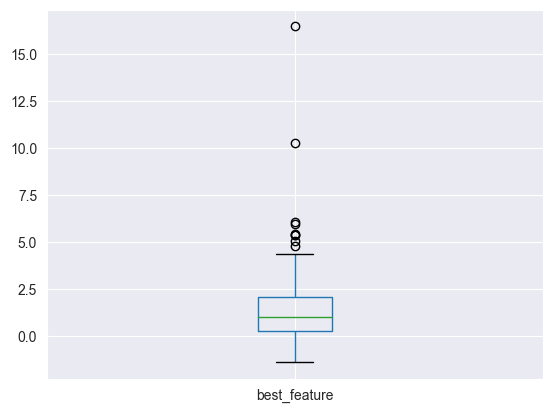

count    72.000000
mean      1.780347
std       2.661571
min      -1.397713
25%       0.243723
50%       1.010859
75%       2.059109
max      16.476742
Name: best_feature, dtype: float64
only improved datasets


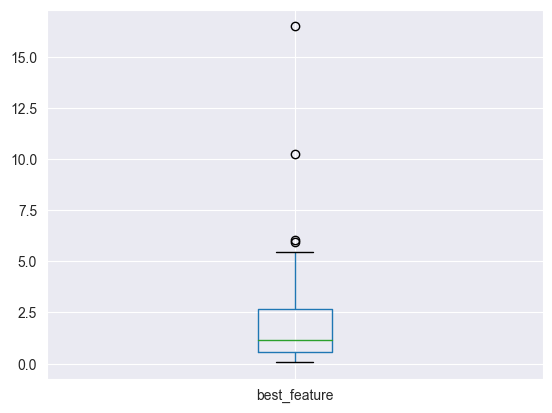

count    60.000000
mean      2.184289
std       2.738316
min       0.061463
25%       0.583414
50%       1.175439
75%       2.686681
max      16.476742
Name: best_feature, dtype: float64


C:\Users\jonas\AppData\Local\Temp\ipykernel_21548\1695562739.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns="best_feature", inplace=True)


                              dataset_name     PCA     KPCA  KMEANS      LDA  \
0                                 kr-vs-kp  0.3774   0.6604  0.1887   1.4151   
1                                   letter -0.3992   0.2303  0.2457  -0.1689   
2                            balance-scale -1.0753  -1.0753 -3.2258   5.3763   
3                            mfeat-factors -0.1536   0.1536 -0.3072   2.6114   
4                            mfeat-fourier  0.0000  -0.1730 -0.6920  -1.7301   
5                                 breast-w -0.4367  -0.8734 -0.8734  -0.4367   
6                           mfeat-karhunen  0.4651  -0.4651  0.1550   1.0853   
7                      mfeat-morphological -0.6135  -1.0225  0.6135   0.8180   
8                            mfeat-zernike  0.0000   0.7463  1.1194   3.5448   
9                                      cmc  1.0830   0.0000  0.0000  -6.1372   
10                               optdigits -0.1599   0.0000  0.0000   0.1066   
11                         credit-approv

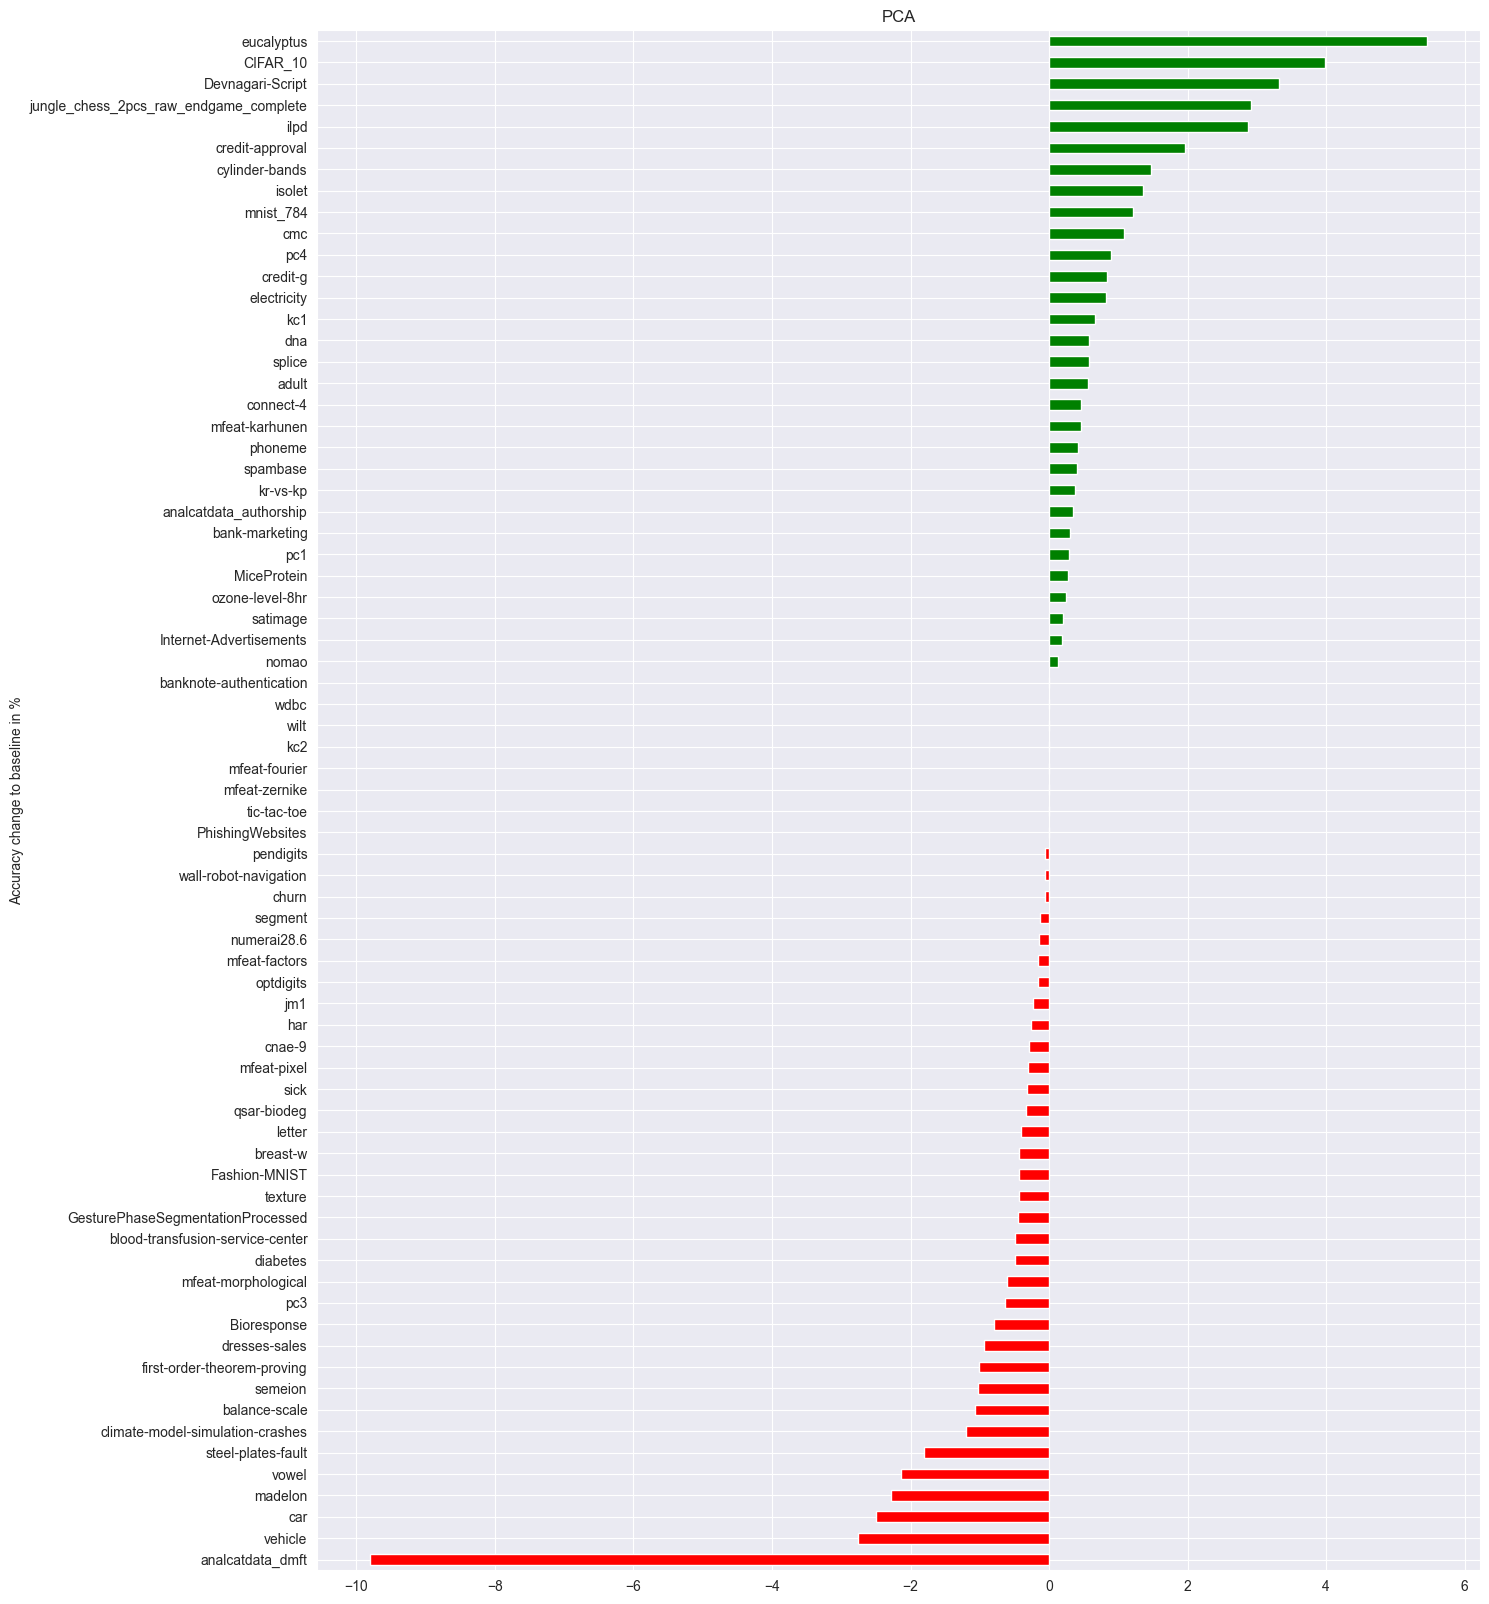

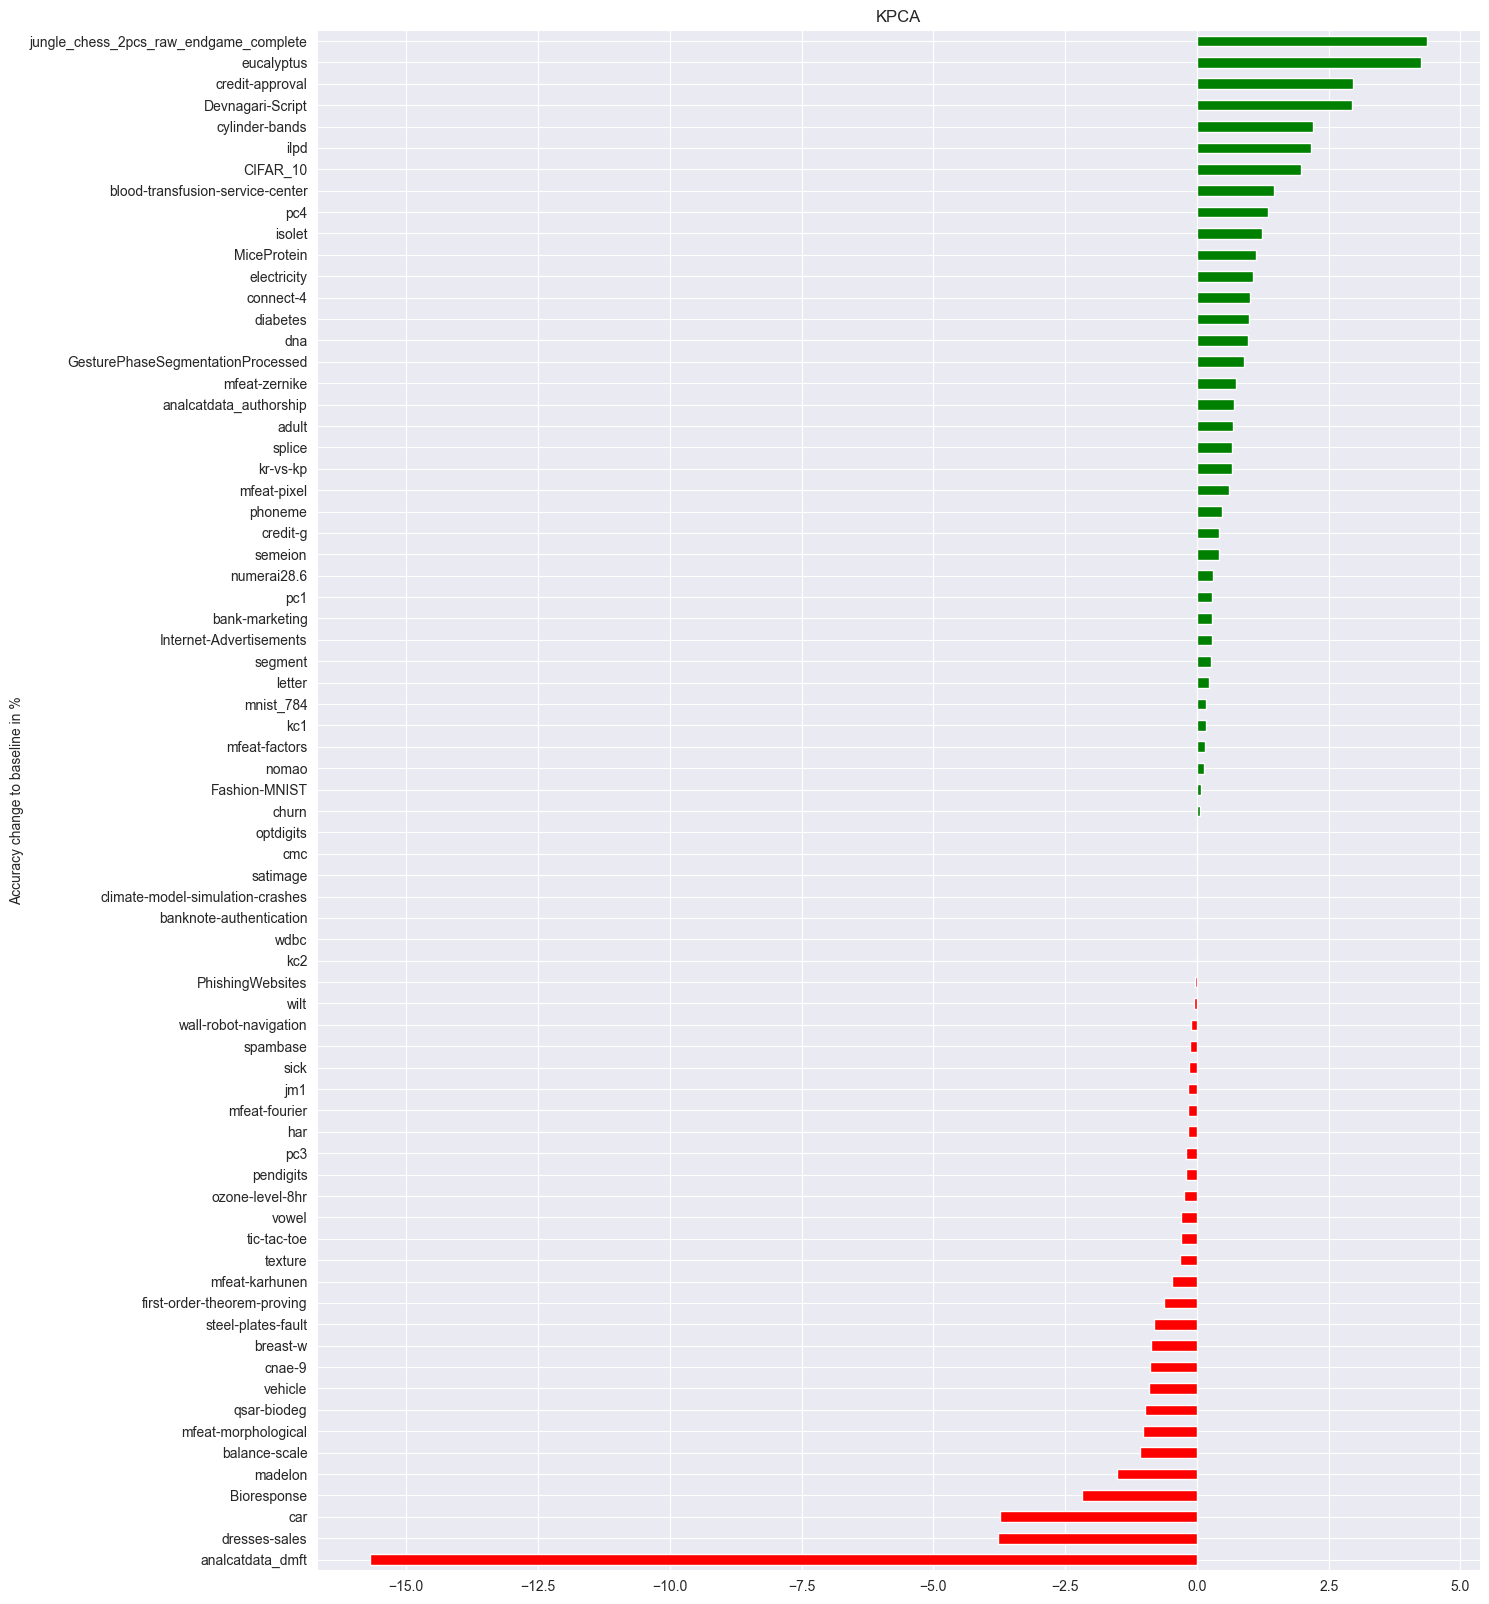

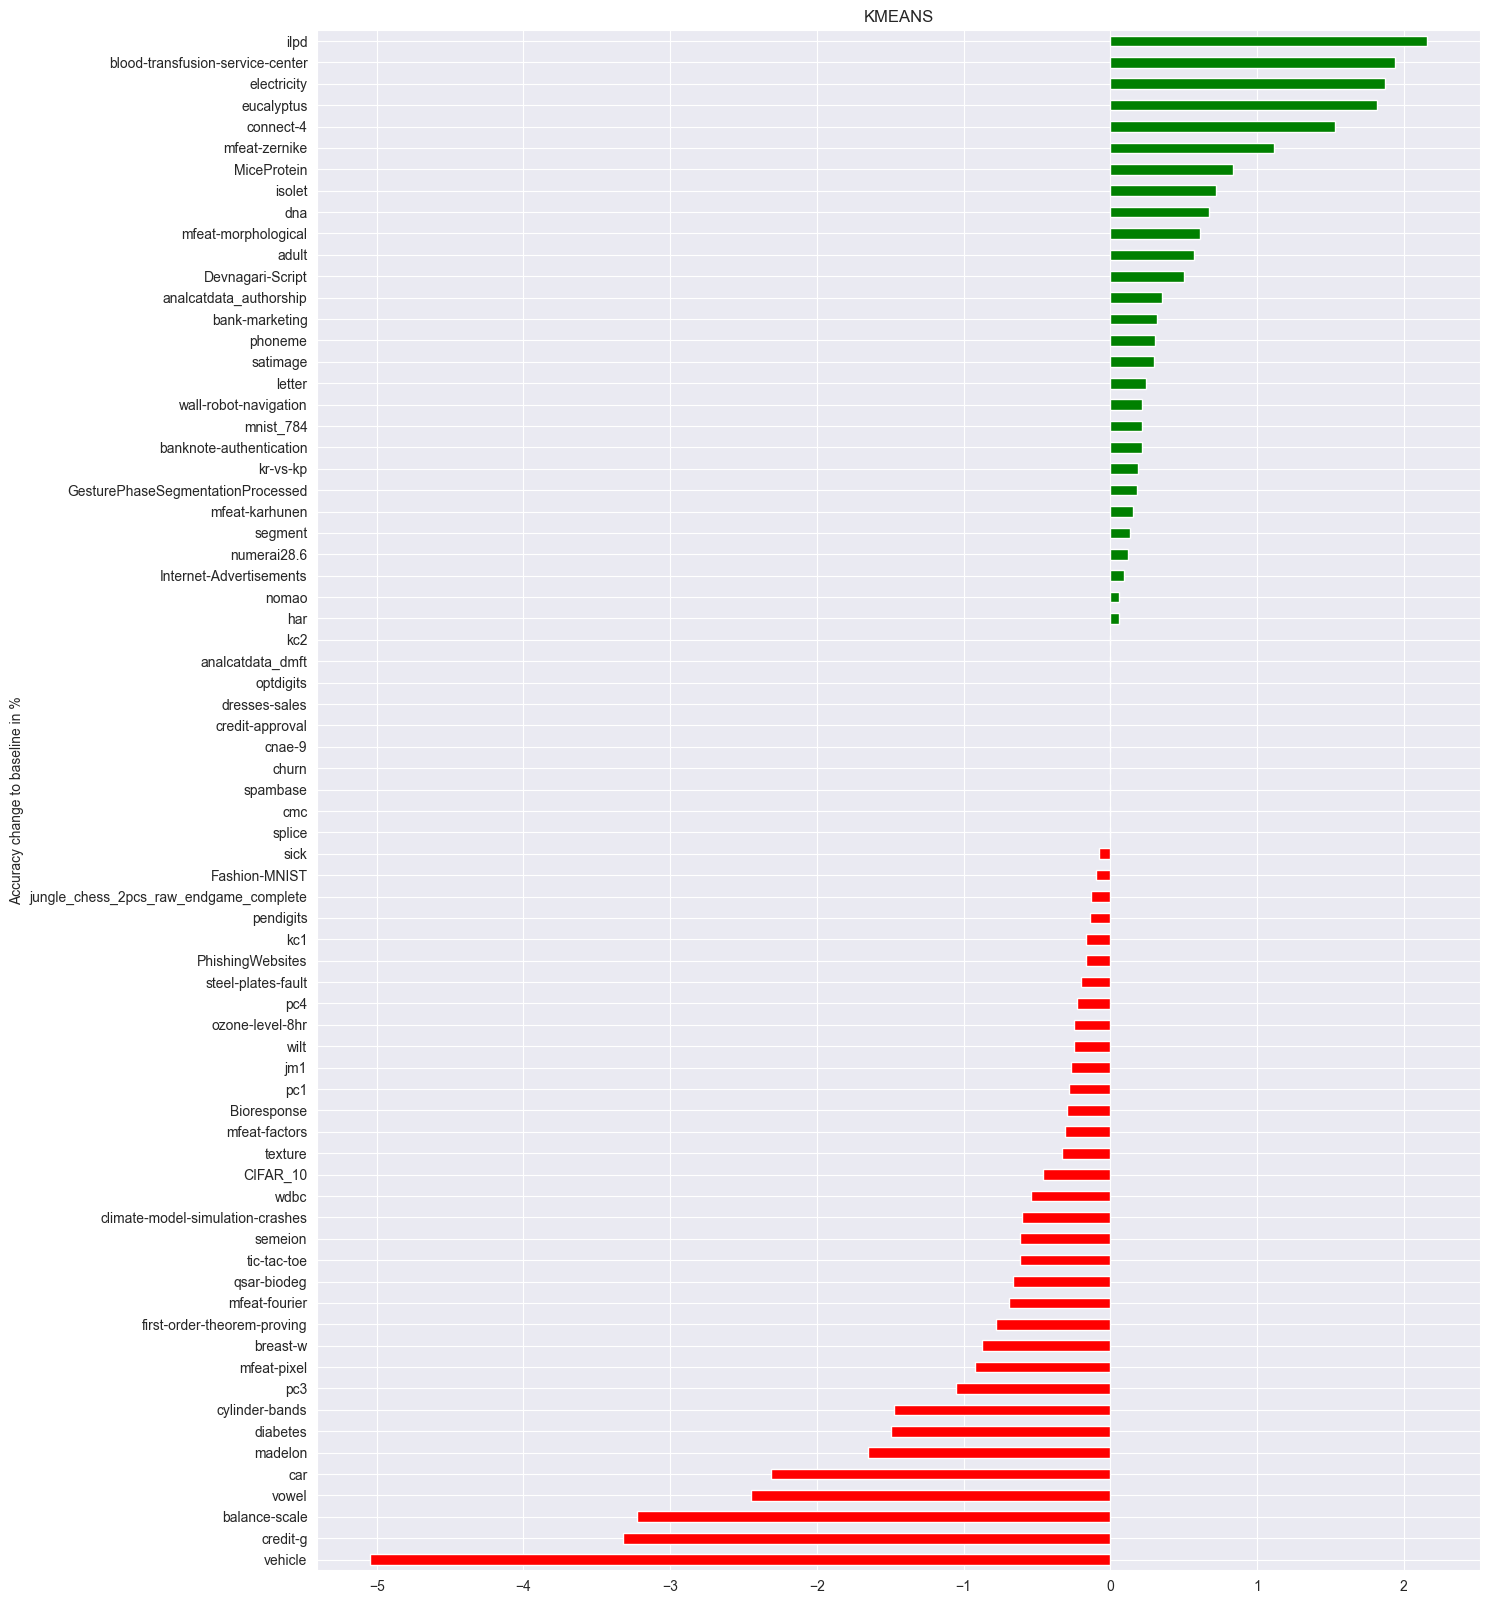

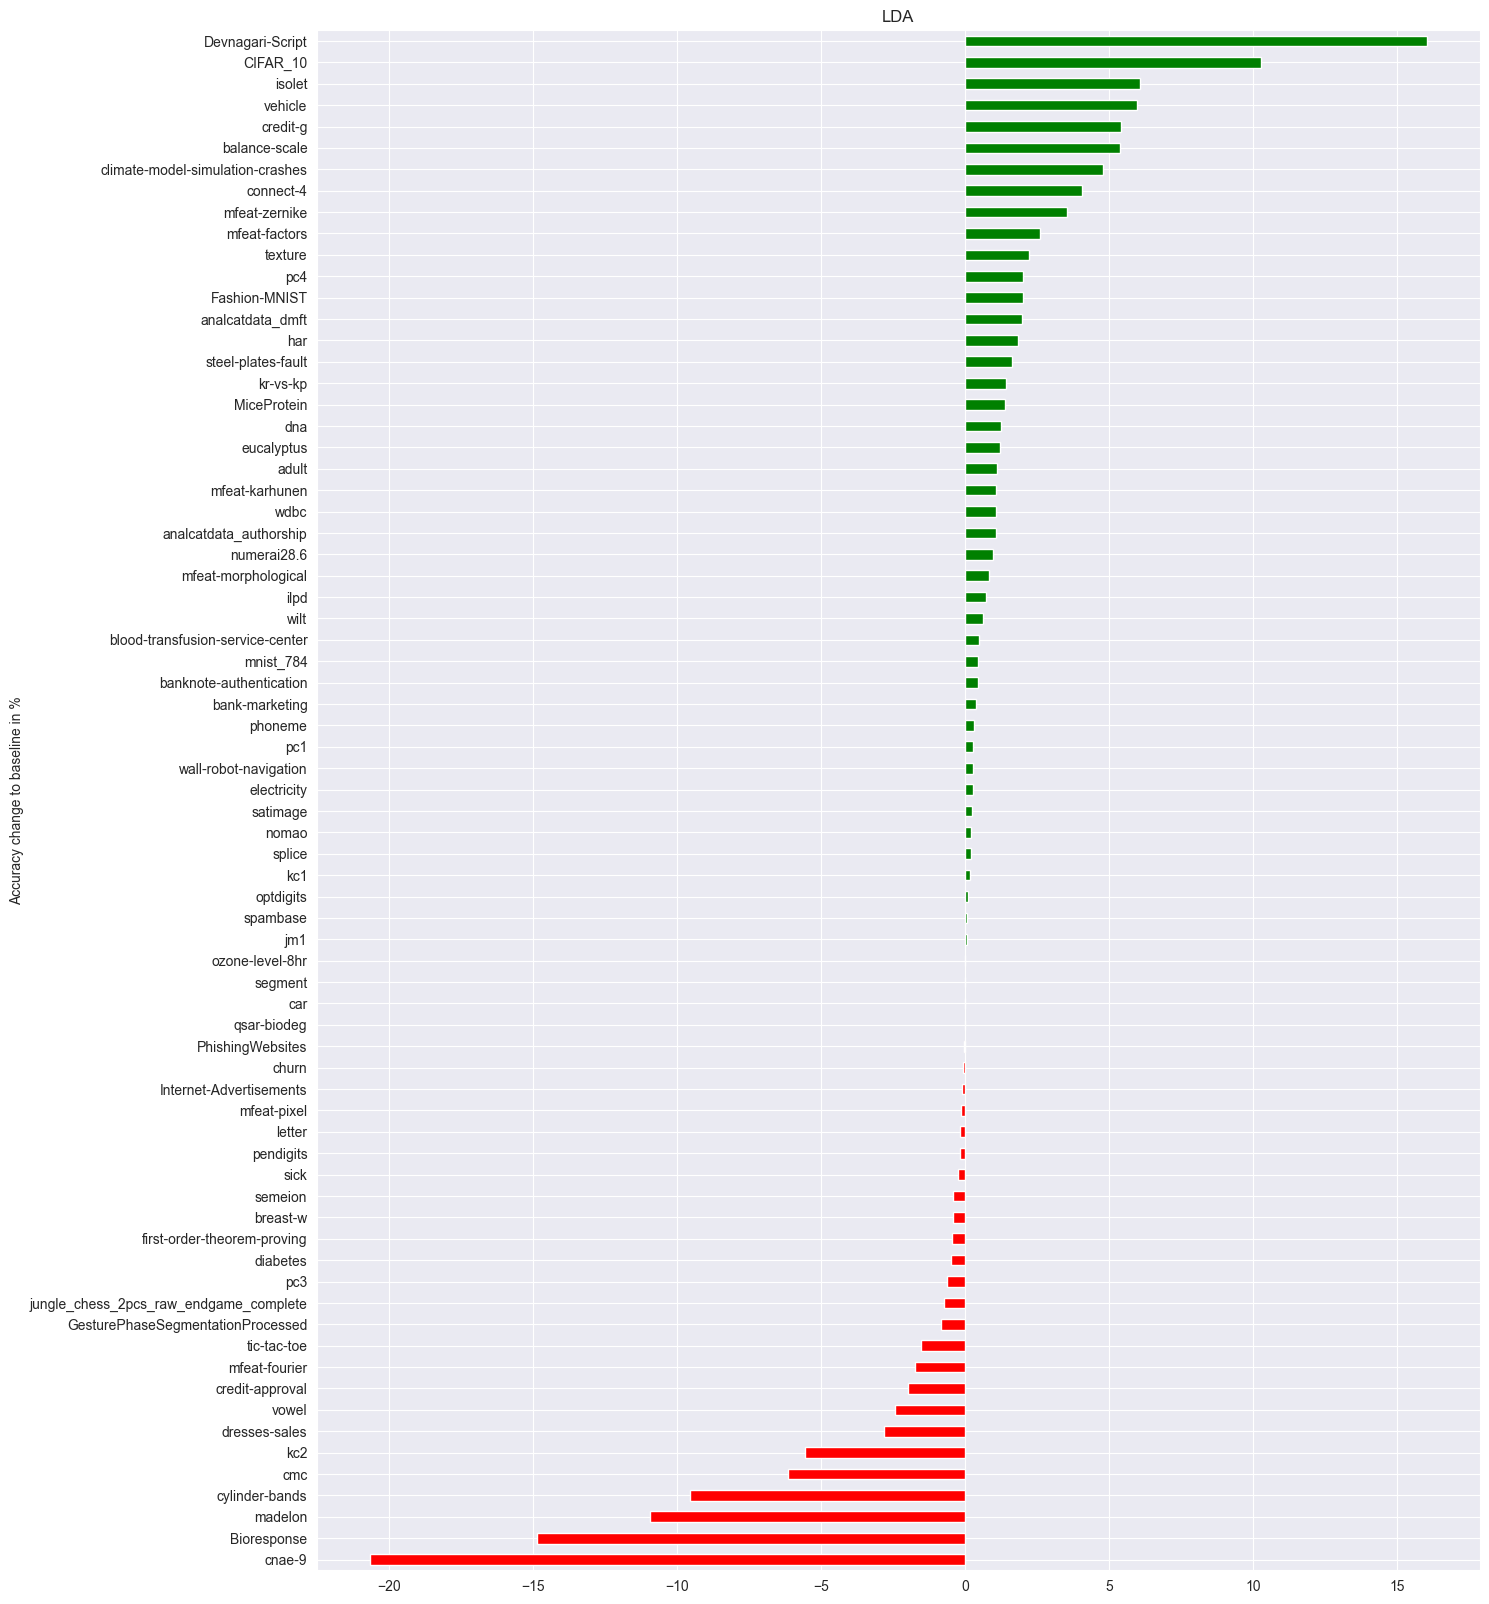

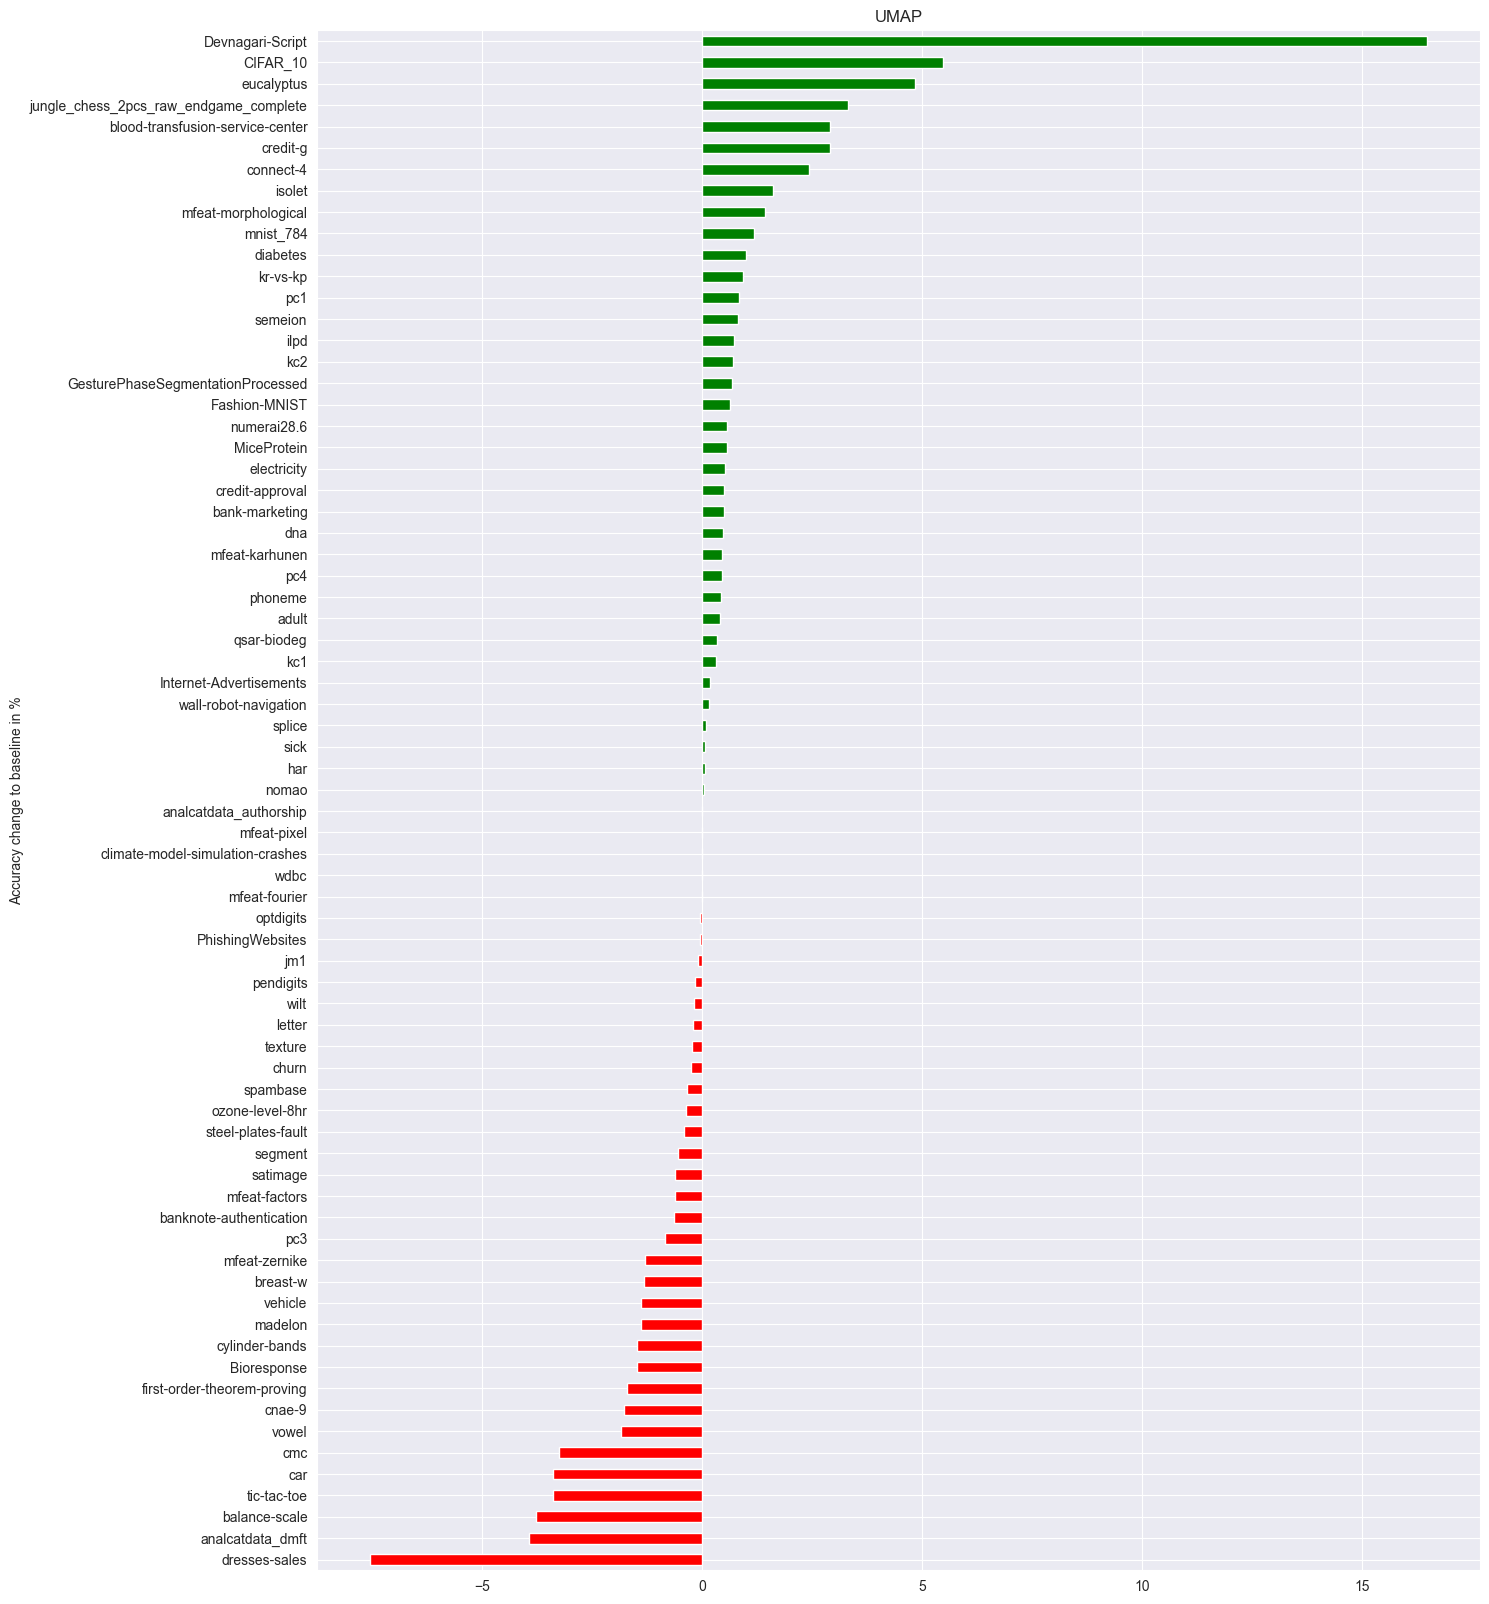

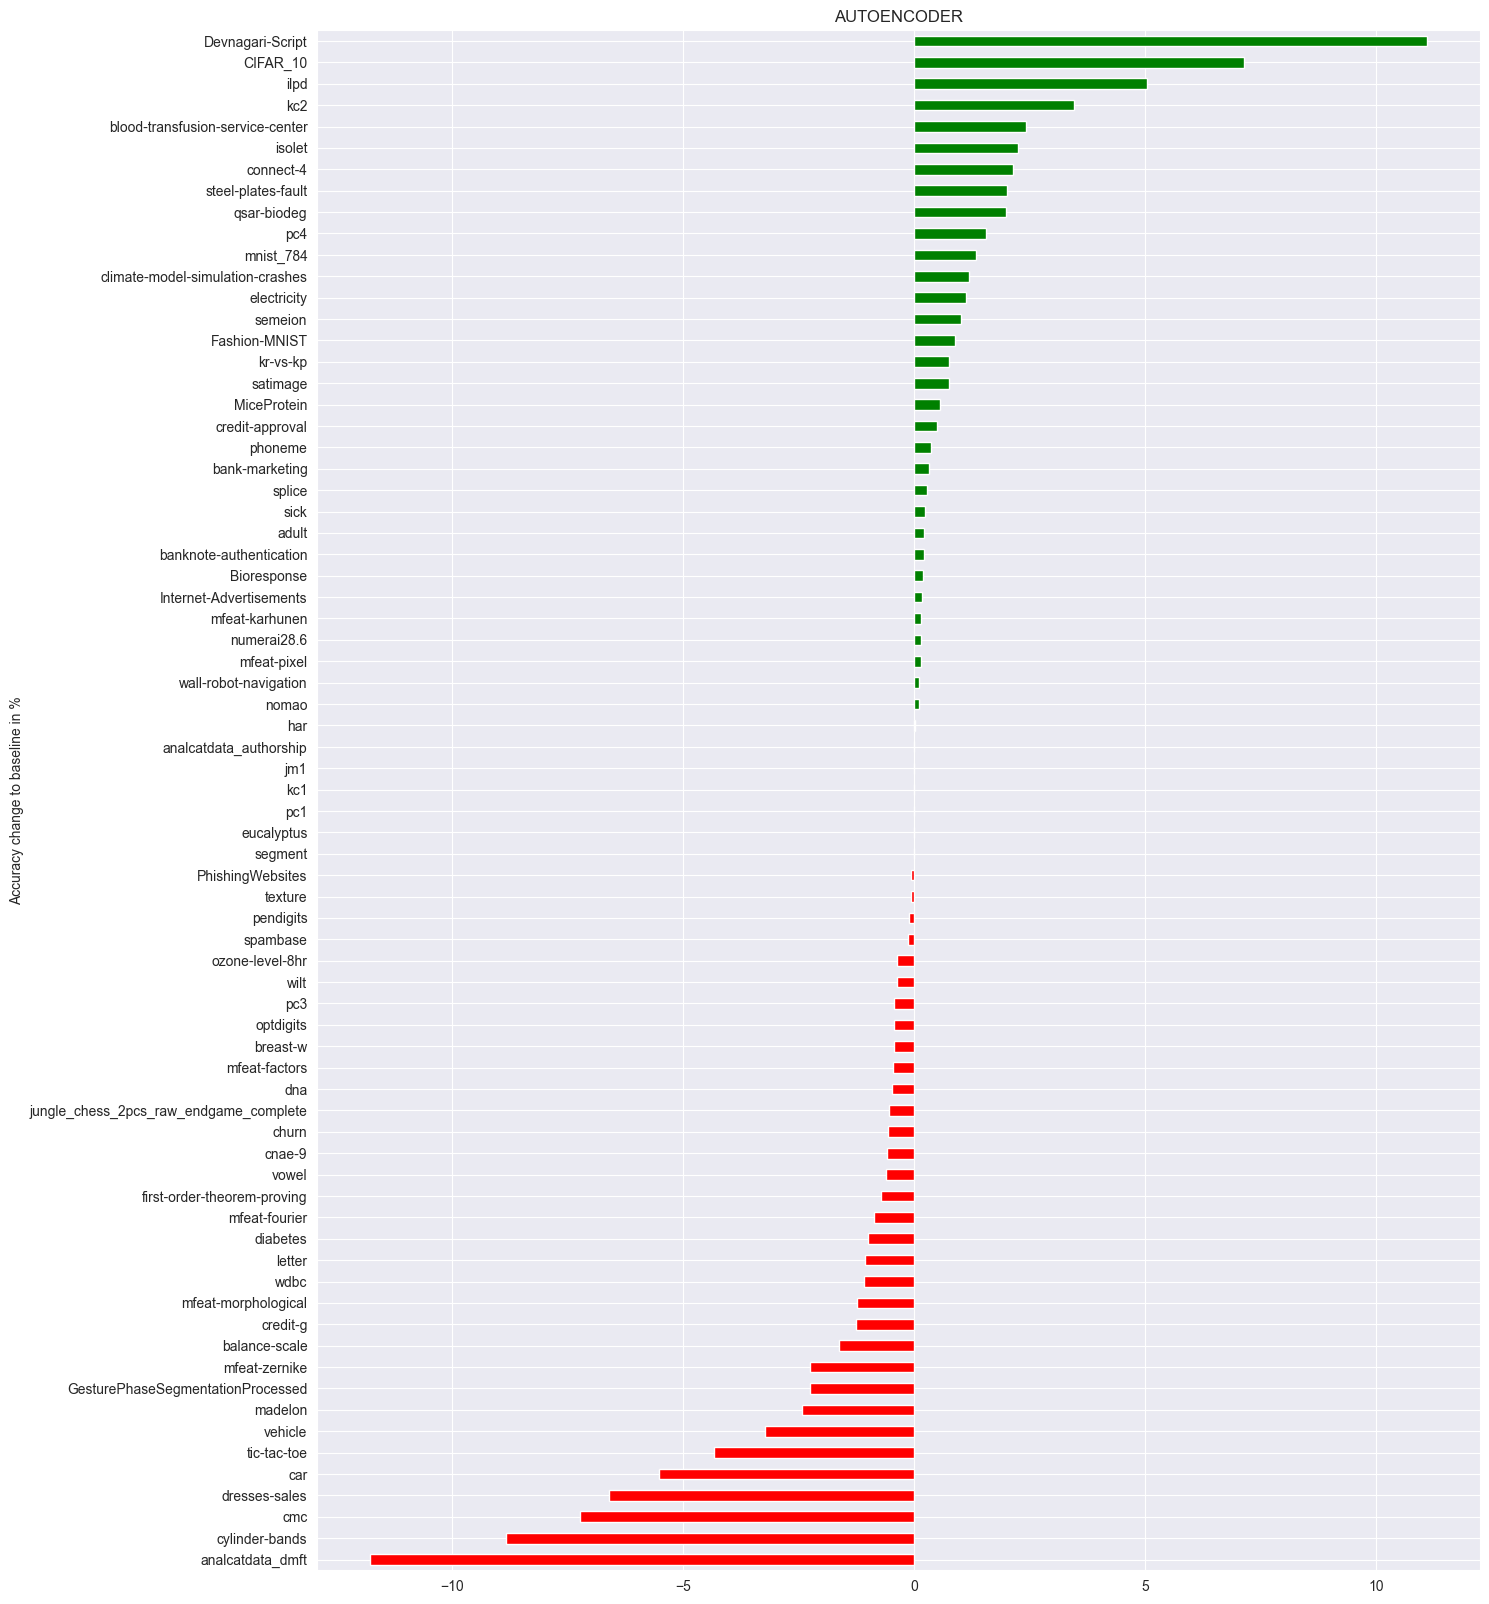

In [99]:
calc_stats_and_plot_all_featuretypes(df, feature_column_split_index=2)

# Baseline features filtered with new features filtered vs. baseline

In [100]:
df = df_results.loc[:, df_results.columns.str.contains("baseline_filtered_[a-zA-Z]+_filtered_test_score_change_to_baseline_filtered|dataset_id|dataset_name", regex=True)]
df.head()

dataset_id   dataset_name  \
0           3       kr-vs-kp   
1           6         letter   
2          11  balance-scale   
3          12  mfeat-factors   
4          14  mfeat-fourier   

   baseline_filtered_pca_filtered_test_score_change_to_baseline_filtered  \
0                                                               0.000000   
1                                                              -0.245663   
2                                                              -1.075269   
3                                                              -0.153610   
4                                                              -1.384083   

   baseline_filtered_kpca_filtered_test_score_change_to_baseline_filtered  \
0                                                                0.283019   
1                                                               -0.291724   
2                                                               -1.075269   
3                                                                0.153610   
4                                                                0.692042   

   baseline_filtered_kmeans_filtered_test_score_change_to_baseline_filtered  \
0                                                                  0.094340   
1                                                                 -0.138185   
2                                                                 -3.225806   
3                                                                 -0.460829   
4                                                                 -0.346021   

   baseline_filtered_lda_filtered_test_score_change_to_baseline_filtered  \
0                                                               0.377358   
1                                                               0.061416   
2                                                               5.376344   
3                                                               1.843318   
4                                                              -0.173010   

   baseline_filtered_umap_filtered_test_score_change_to_baseline_filtered  \
0                                                                0.094340   
1                                                               -0.168893   
2                                                               -3.763441   
3                                                                0.460829   
4                                                               -1.211073   

   baseline_filtered_autoencoder_filtered_test_score_change_to_baseline_filtered  
0                                                                       0.188679  
1                                                                      -0.875173  
2                                                                       0.537634  
3                                                                      -0.307220  
4                                                                      -1.038062

Total improved Datasets over all features: 61 (0.85%)

Anzahl Datasets
  feature_name  improved  unchanged  decreased
0          PCA        30          9         33
1         KPCA        32         10         30
2       KMEANS        23          7         42
3          LDA        41          3         28
4         UMAP        28          3         41
5  AUTOENCODER        25          5         42

Prozent Datasets
  feature_name  improved  unchanged  decreased
0          PCA      0.42       0.12       0.46
1         KPCA      0.44       0.14       0.42
2       KMEANS      0.32       0.10       0.58
3          LDA      0.57       0.04       0.39
4         UMAP      0.39       0.04       0.57
5  AUTOENCODER      0.35       0.07       0.58
all datasets


C:\Users\jonas\AppData\Local\Temp\ipykernel_21548\1695562739.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["best_feature"] = highest_values


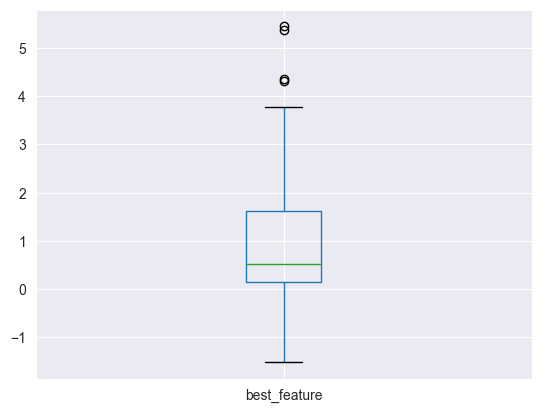

count    72.000000
mean      1.066504
std       1.396525
min      -1.529052
25%       0.142494
50%       0.515501
75%       1.621151
max       5.454545
Name: best_feature, dtype: float64
only improved datasets


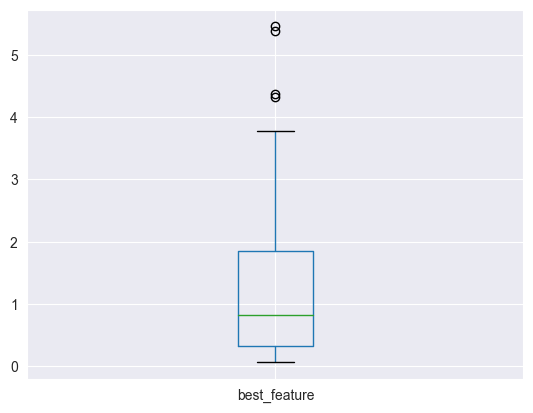

count    61.000000
mean      1.322765
std       1.356692
min       0.061416
25%       0.317579
50%       0.822368
75%       1.843318
max       5.454545
Name: best_feature, dtype: float64


C:\Users\jonas\AppData\Local\Temp\ipykernel_21548\1695562739.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns="best_feature", inplace=True)


                              dataset_name     PCA    KPCA  KMEANS     LDA  \
0                                 kr-vs-kp  0.0000  0.2830  0.0943  0.3774   
1                                   letter -0.2457 -0.2917 -0.1382  0.0614   
2                            balance-scale -1.0753 -1.0753 -3.2258  5.3763   
3                            mfeat-factors -0.1536  0.1536 -0.4608  1.8433   
4                            mfeat-fourier -1.3841  0.6920 -0.3460 -0.1730   
5                                 breast-w -0.4367 -0.8734 -0.8734 -0.4367   
6                           mfeat-karhunen  0.1550 -0.4651  0.4651 -0.3101   
7                      mfeat-morphological -0.6135 -1.0225  0.6135  0.8180   
8                            mfeat-zernike -0.5597 -0.9328 -0.5597  3.1716   
9                                      cmc  0.7220  0.3610 -0.3610  1.4440   
10                               optdigits -0.1599  0.1066 -0.4797 -0.1599   
11                         credit-approval -0.4926  0.4926  0.49

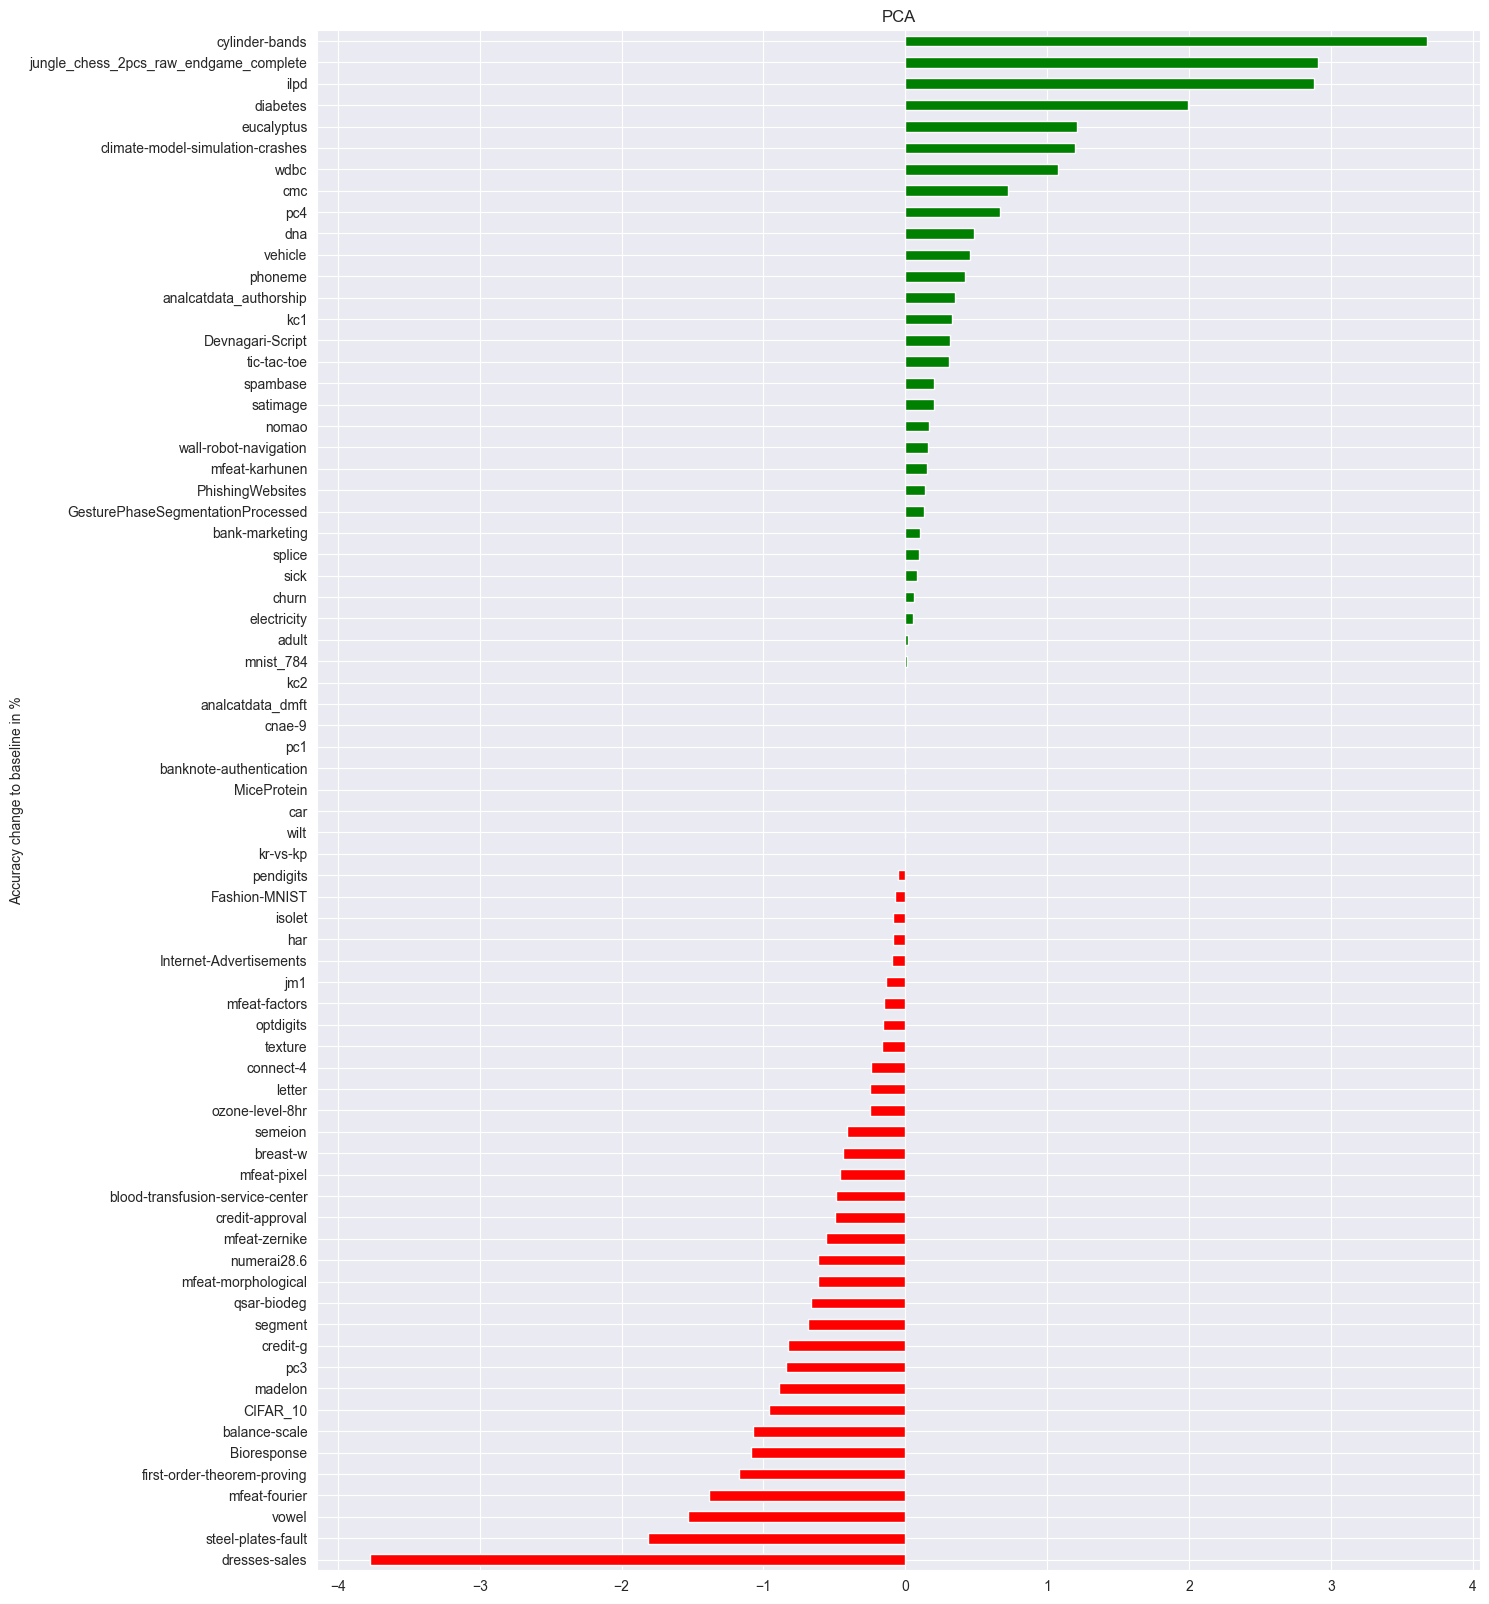

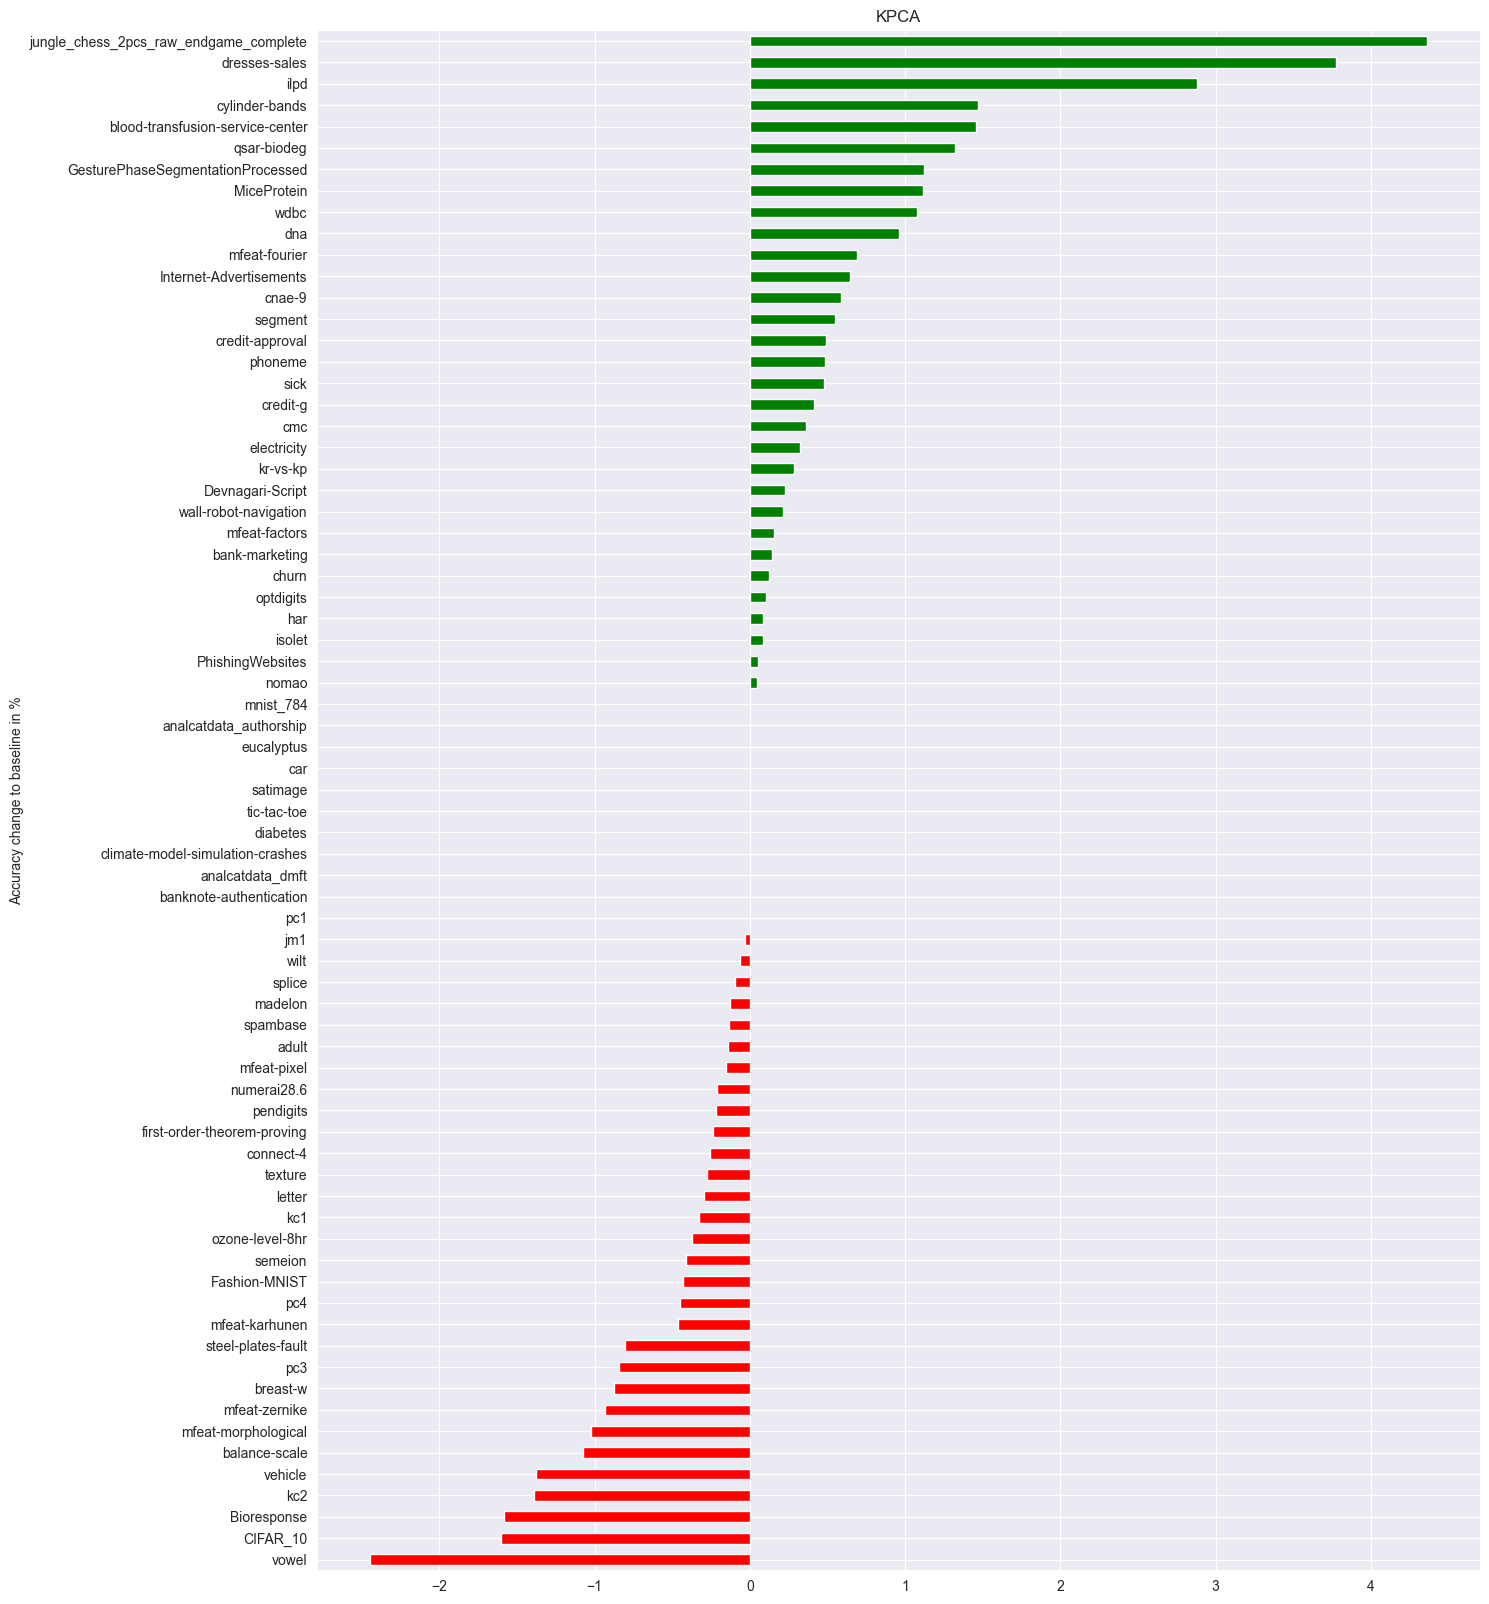

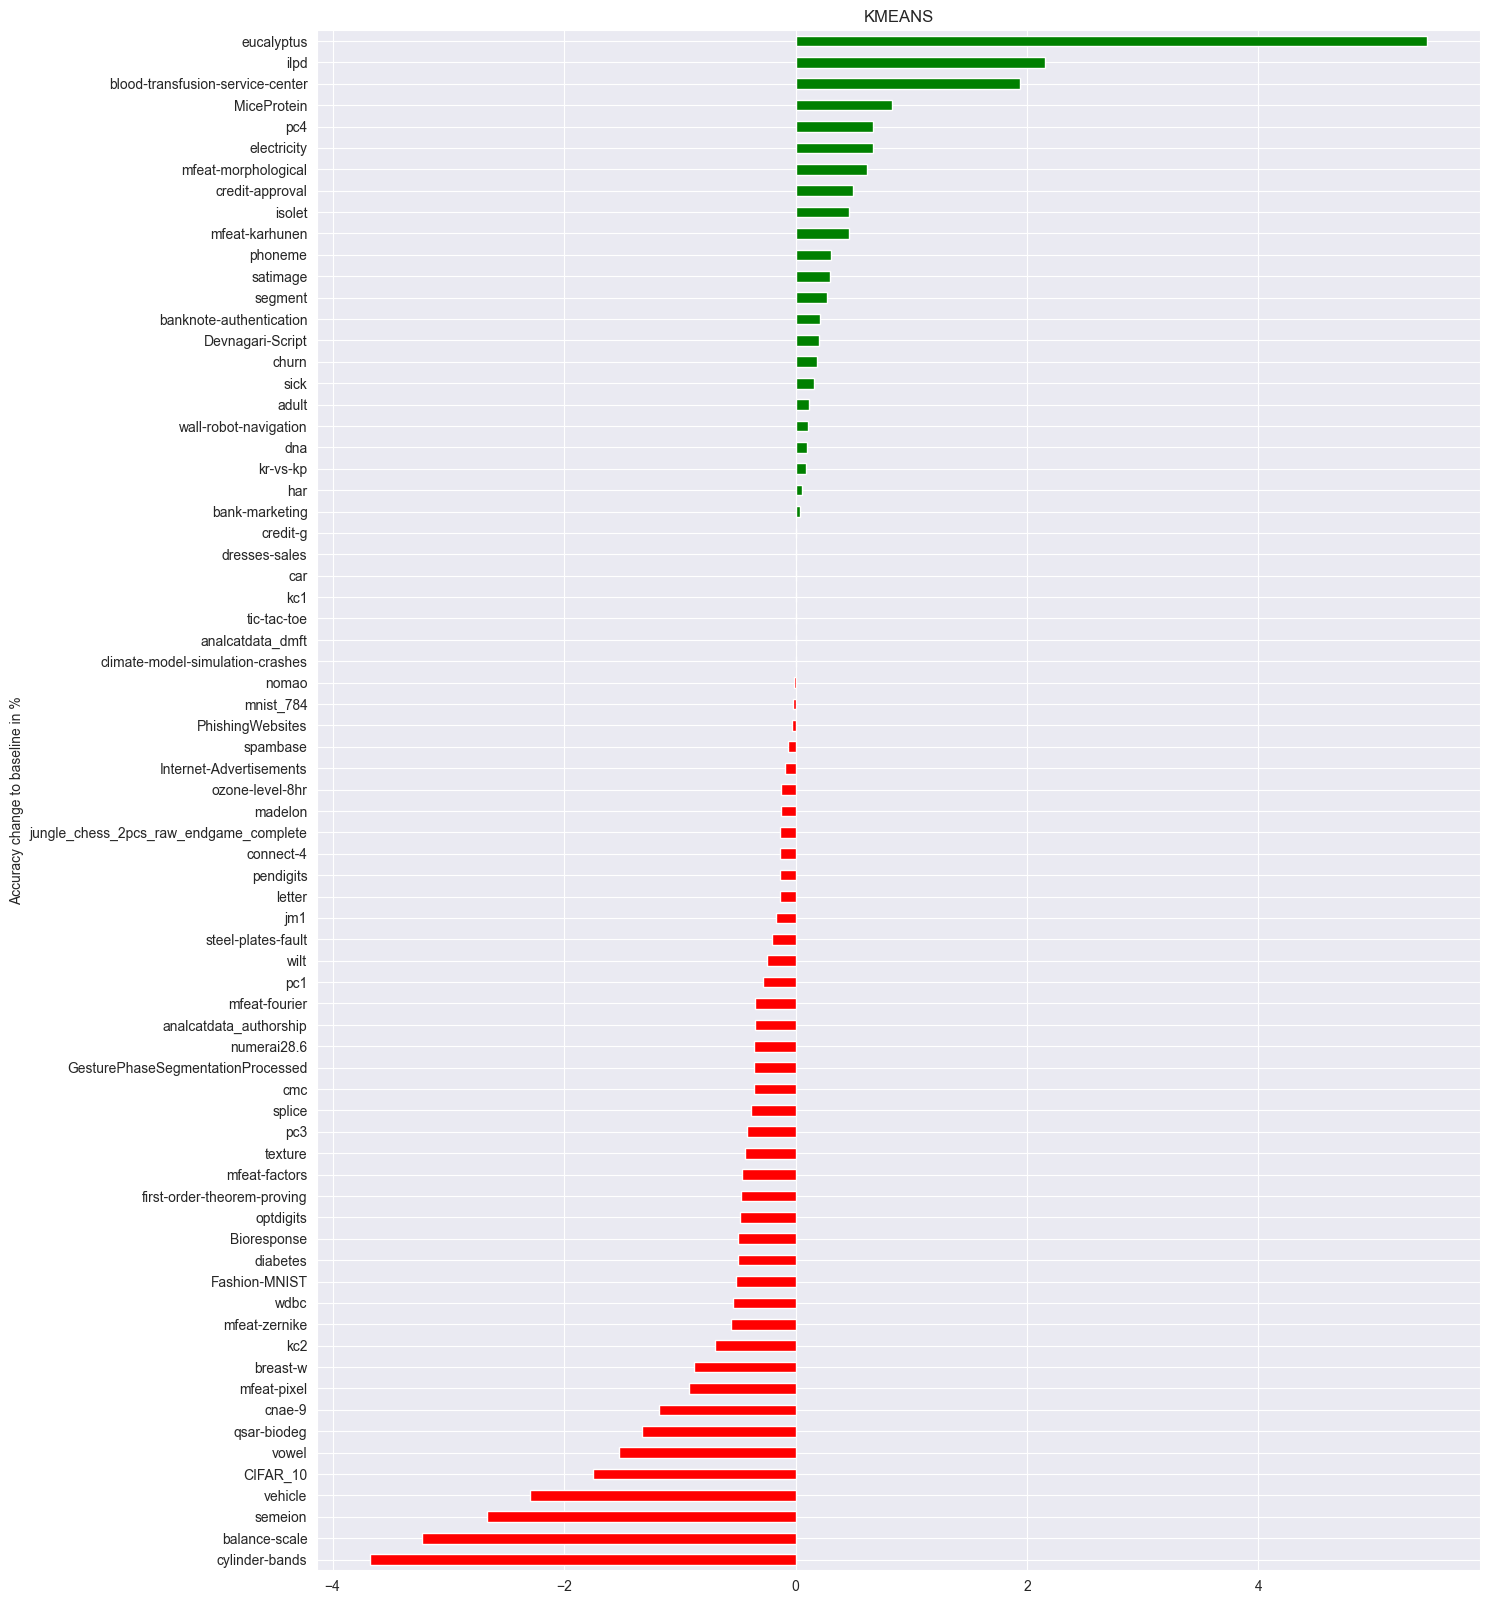

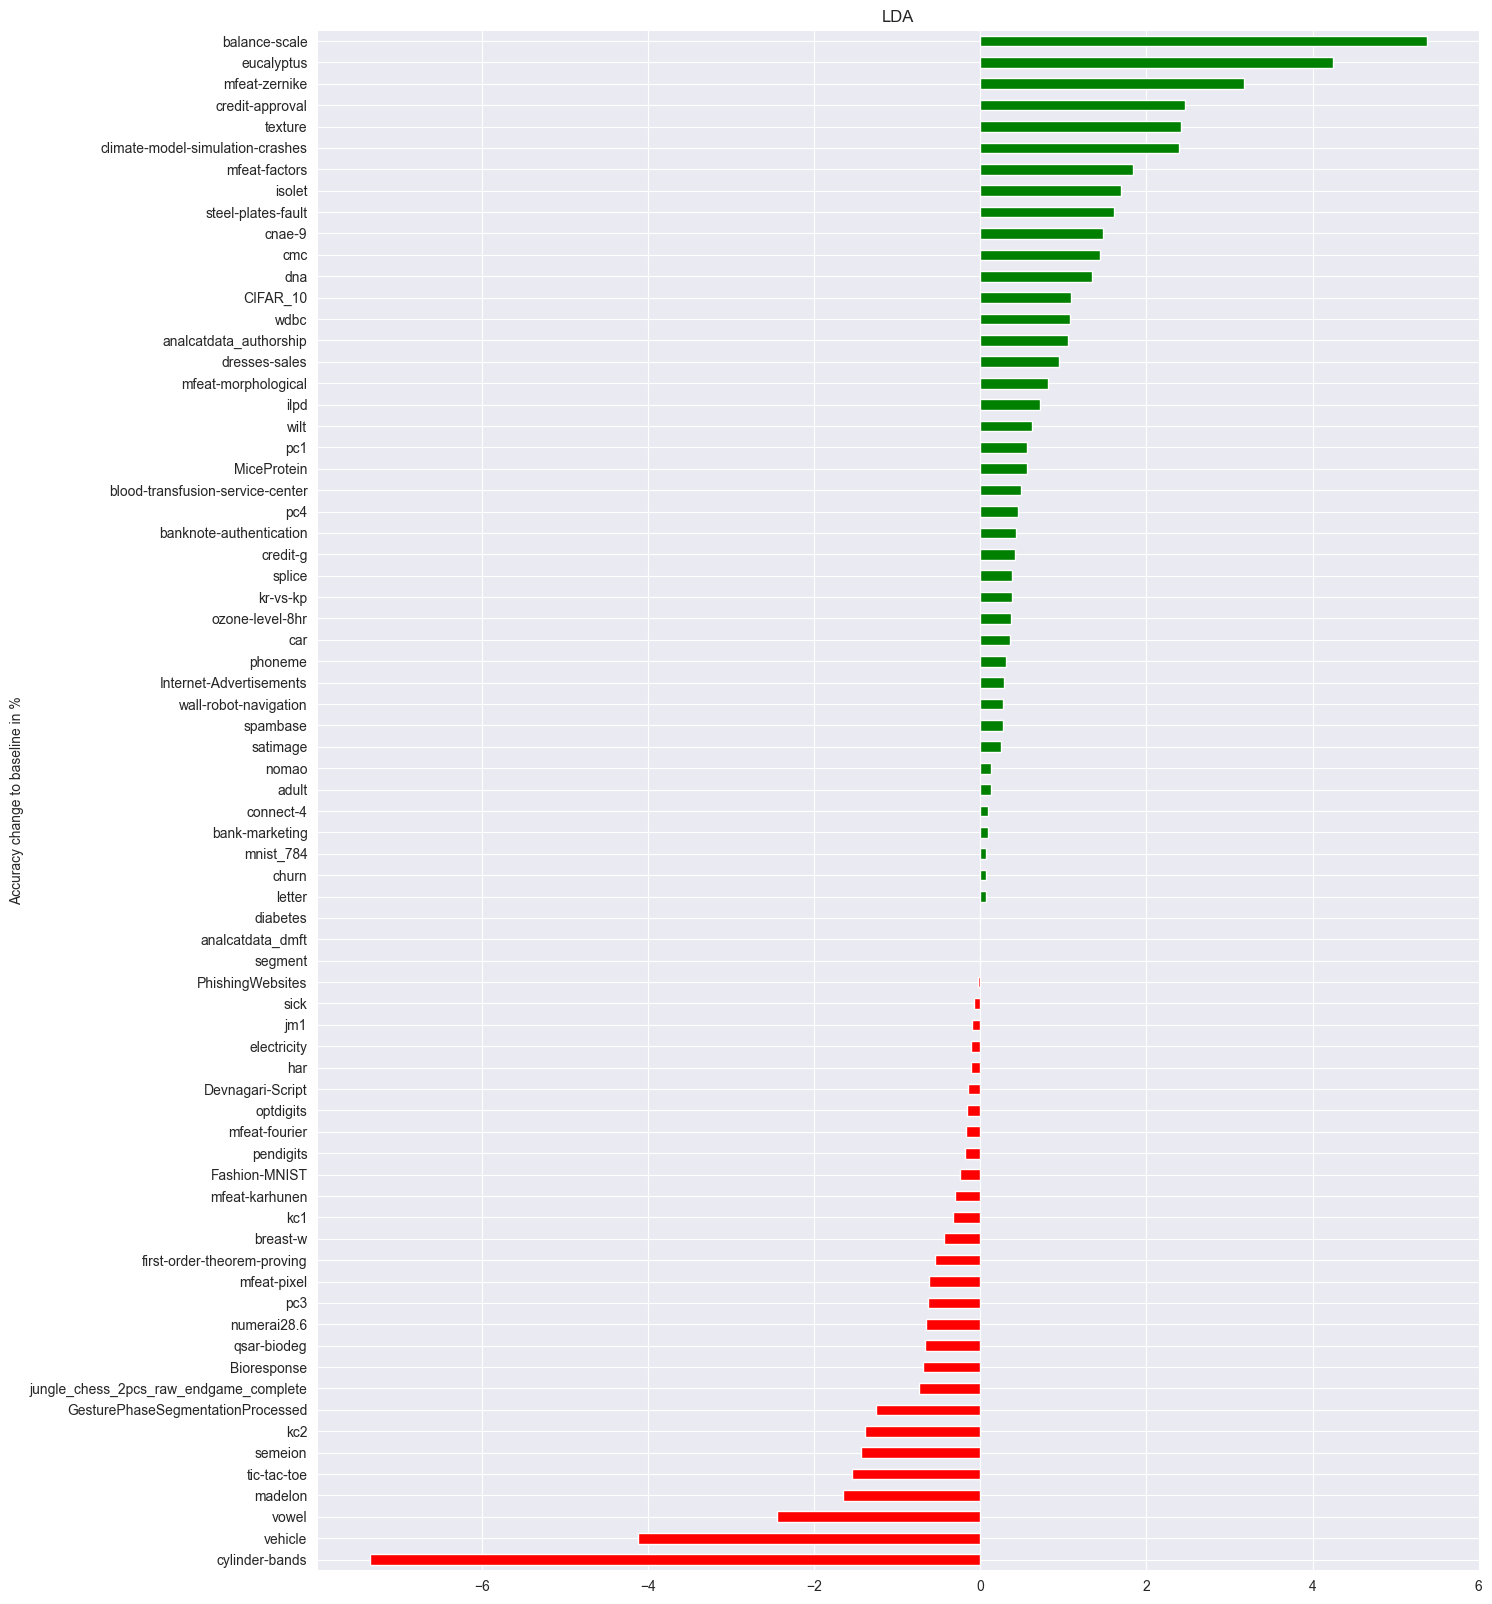

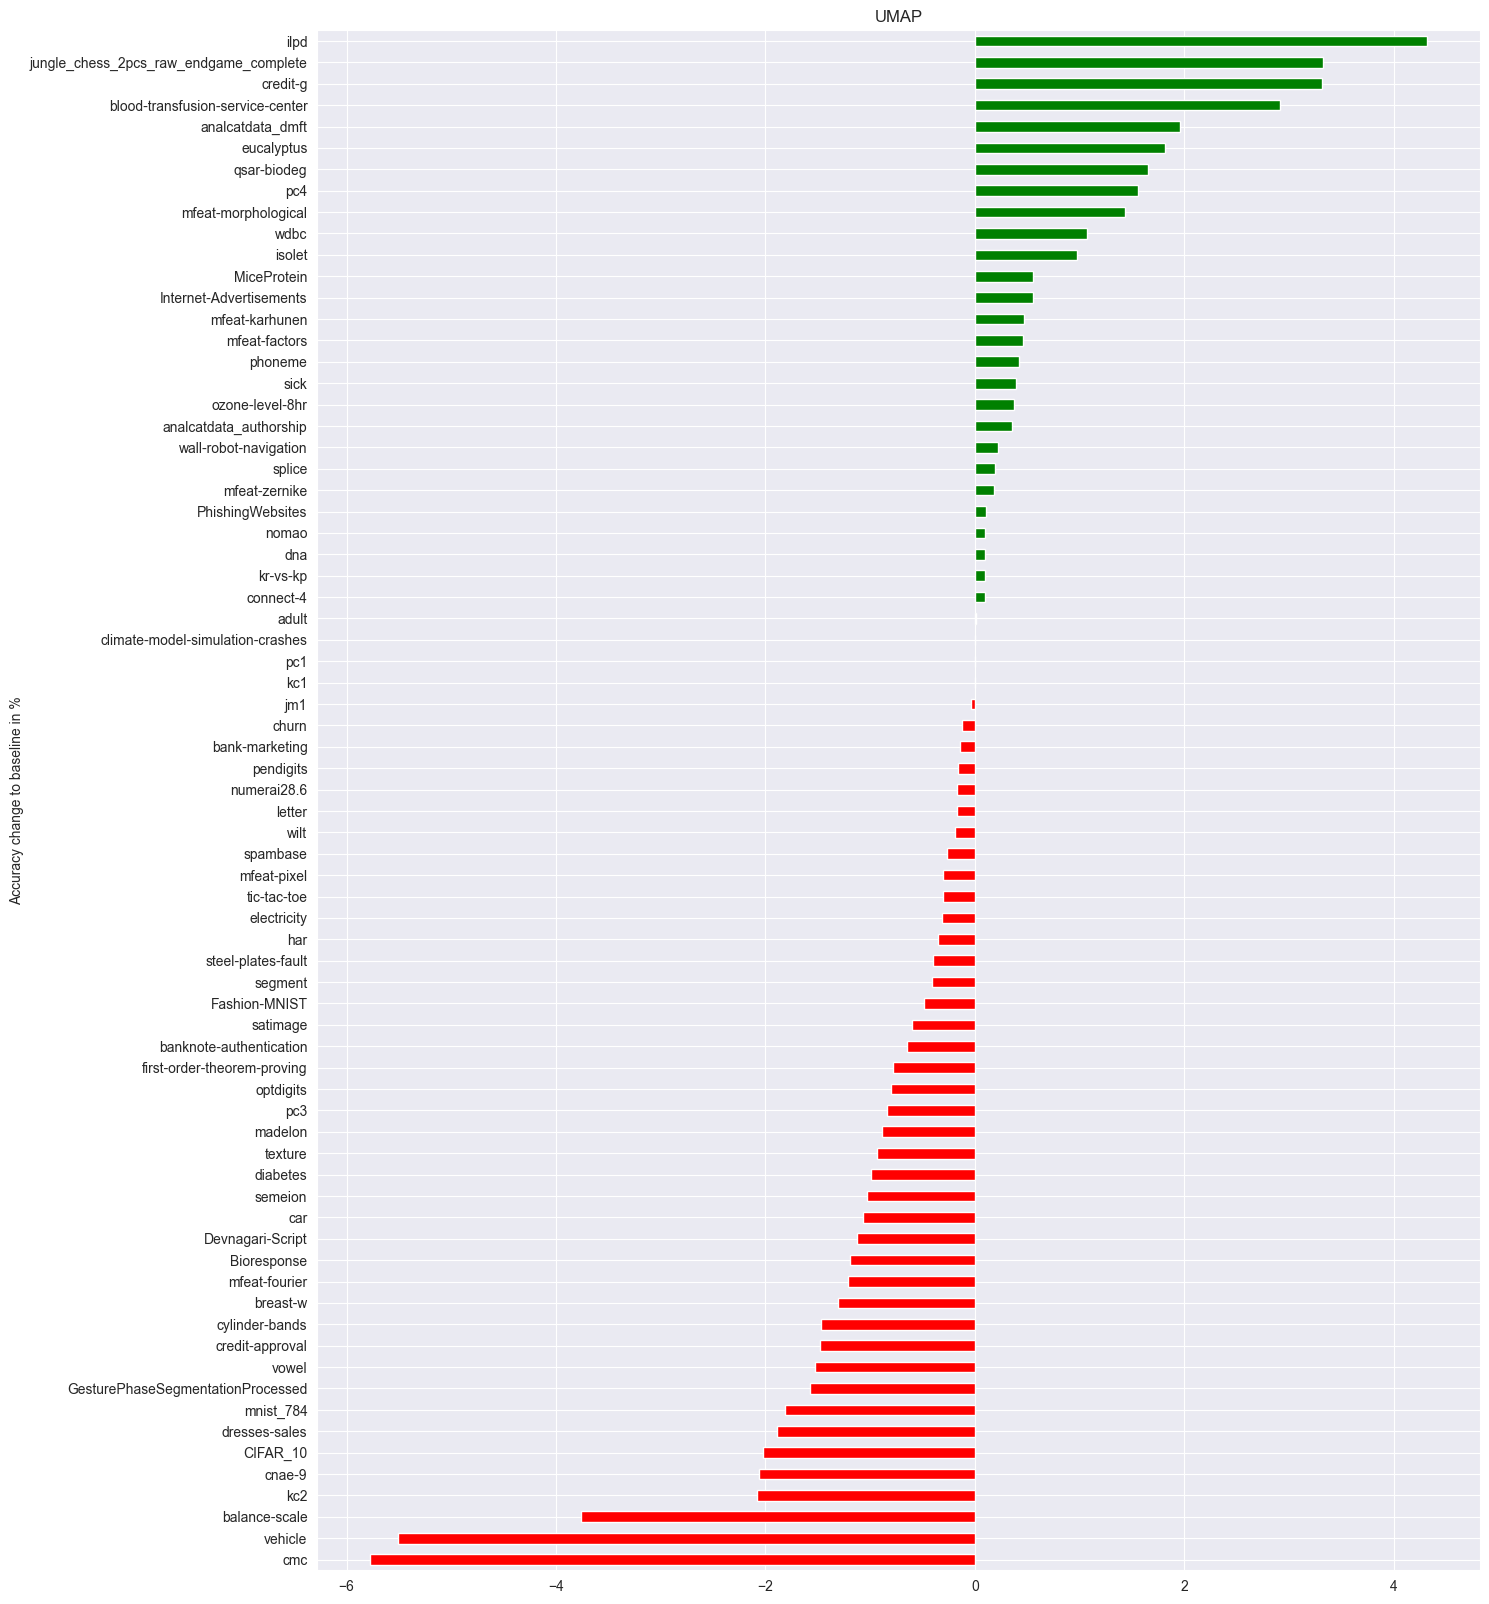

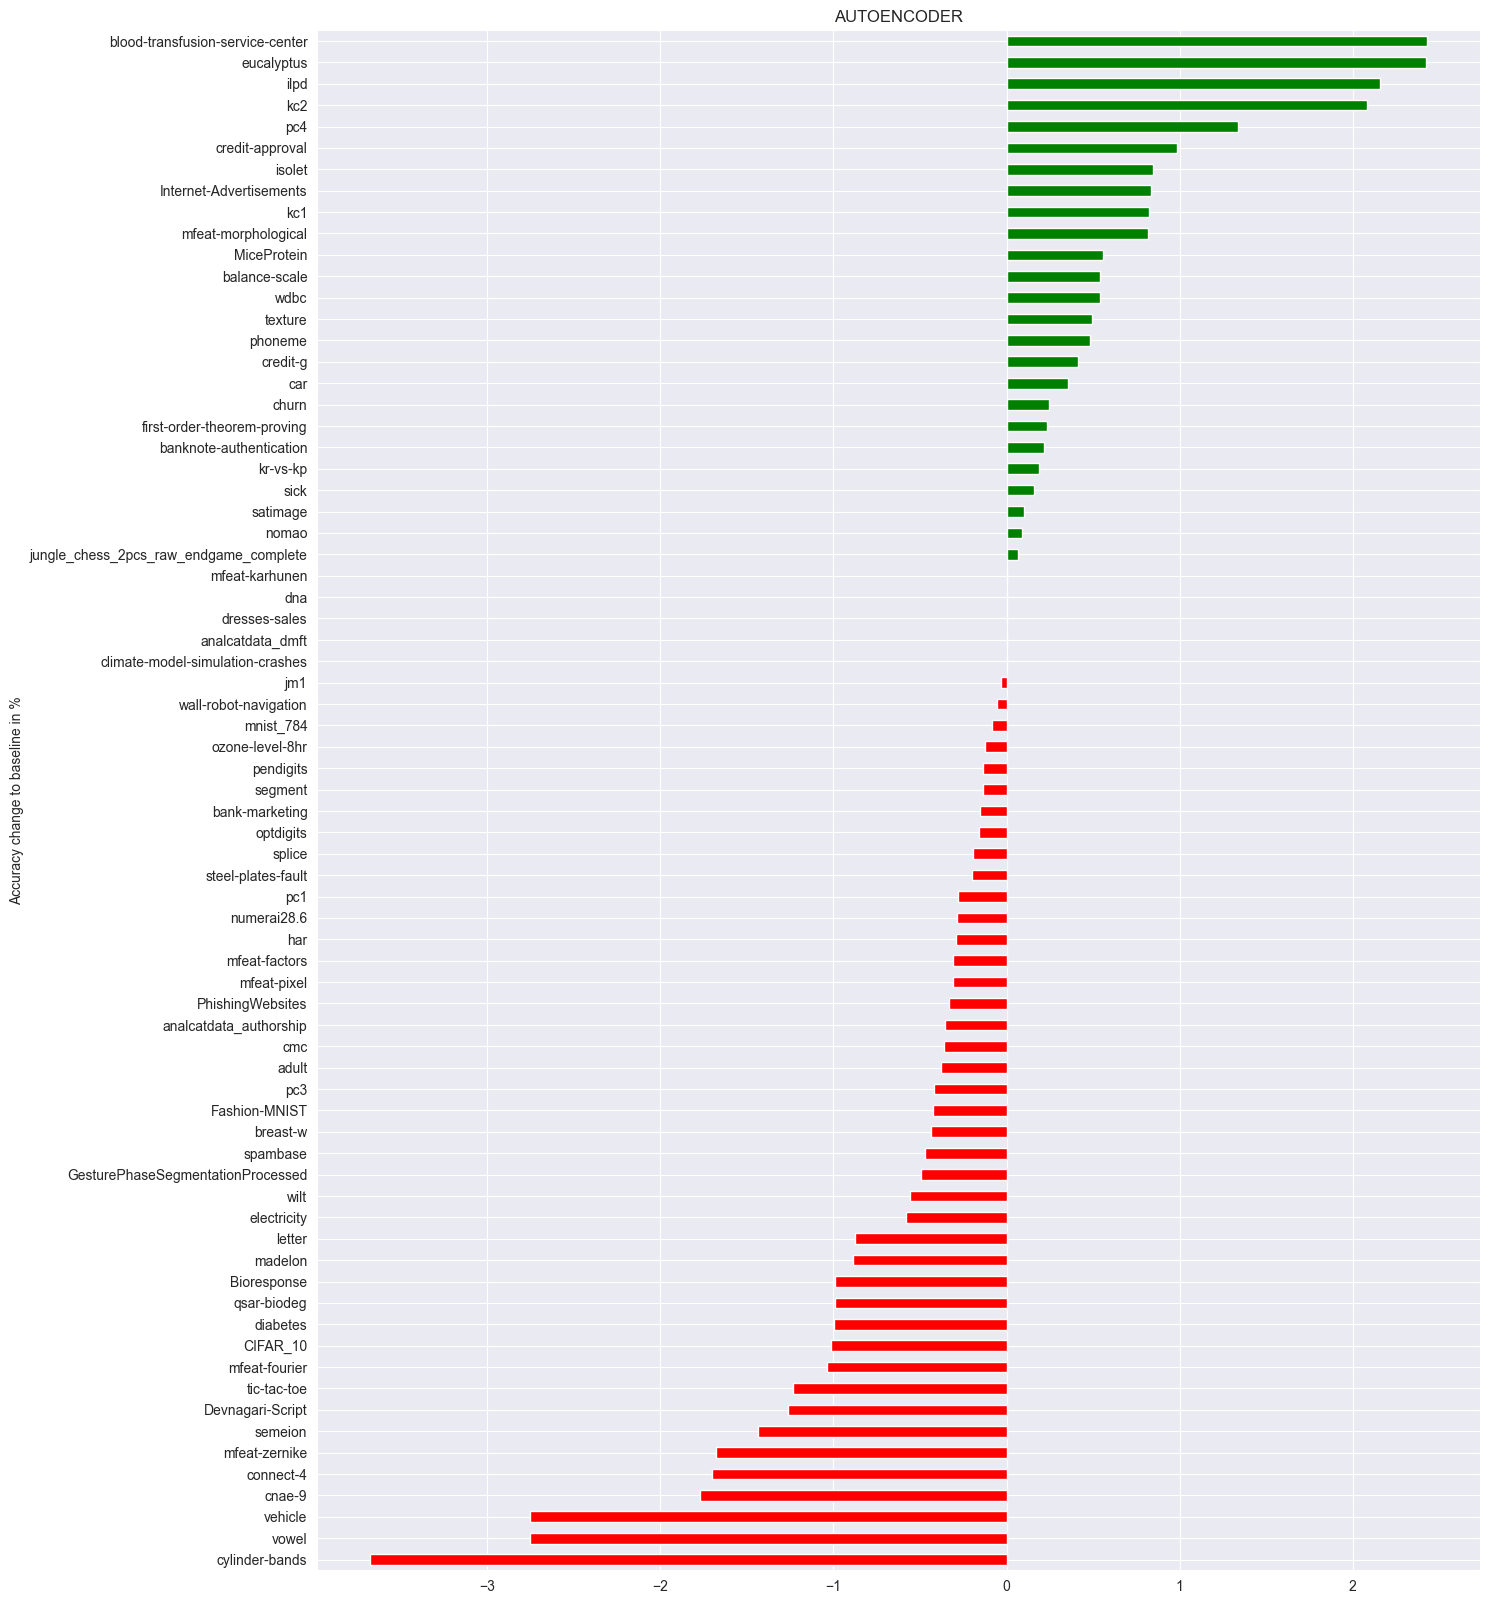

In [101]:
calc_stats_and_plot_all_featuretypes(df, feature_column_split_index=2)

# Baseline features filtered vs. selected features

Total improved Datasets over all features: 42 (58.33%)
all datasets


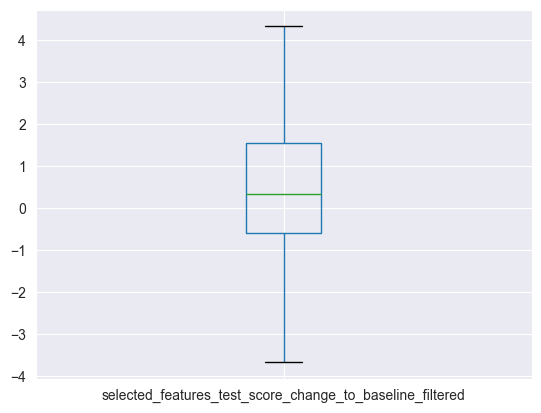

count    72.000000
mean     -0.077395
std       5.348630
min     -23.893805
25%      -0.585519
50%       0.324766
75%       1.538277
max      24.159350
Name: selected_features_test_score_change_to_baseline_filtered, dtype: float64
only improved datasets


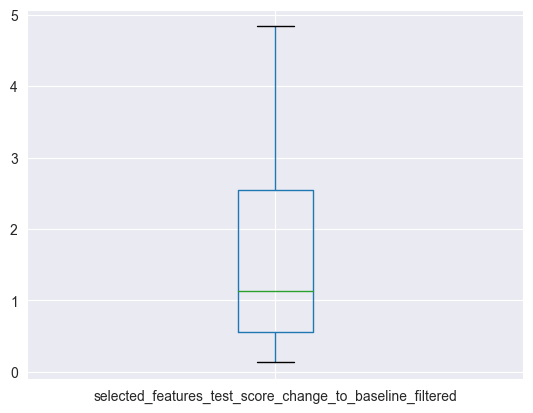

count    42.000000
mean      2.307236
std       3.845773
min       0.132380
25%       0.555285
50%       1.132761
75%       2.553152
max      24.159350
Name: selected_features_test_score_change_to_baseline_filtered, dtype: float64


In [102]:
df = df_results.loc[:, df_results.columns.str.contains("selected_features|dataset_id|dataset_name", regex=True)]
df = df.loc[:, ~df.columns.str.contains("selected_features_filtered", regex=True)]
df.head()

calc_stats_and_plot_all_features_or_filtered(df, test_score_change_to_baseline_filtered_columnname="selected_features_test_score_change_to_baseline_filtered",
test_score_greater_baseline_filtered_test_score_columnname="selected_features_test_score > baseline_filtered_test_score")

# Baseline features filtered vs. selected features filtered

Total improved Datasets over all features: 35 (48.61%)
all datasets


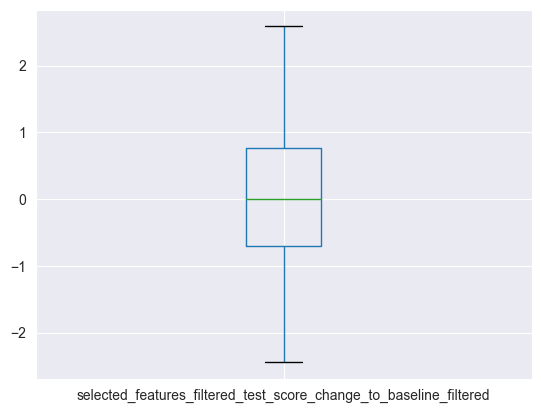

count    72.000000
mean     -0.099394
std       2.185885
min     -11.029412
25%      -0.707496
50%       0.000000
75%       0.767226
max       5.913978
Name: selected_features_filtered_test_score_change_to_baseline_filtered, dtype: float64
only improved datasets


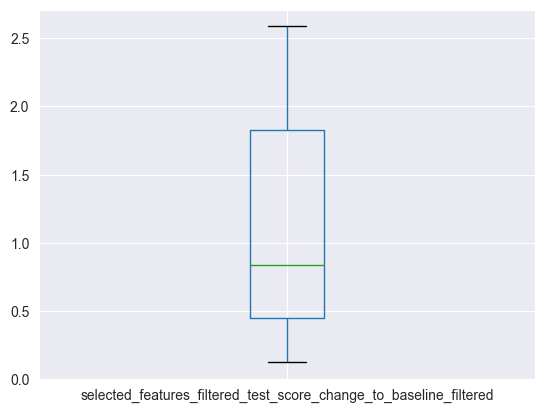

count    35.000000
mean      1.283137
std       1.233241
min       0.123153
25%       0.450350
50%       0.835655
75%       1.828352
max       5.913978
Name: selected_features_filtered_test_score_change_to_baseline_filtered, dtype: float64


In [103]:
df = df_results.loc[:, df_results.columns.str.contains("selected_features_filtered|dataset_id|dataset_name", regex=True)]
df.head()

calc_stats_and_plot_all_features_or_filtered(df, test_score_change_to_baseline_filtered_columnname="selected_features_filtered_test_score_change_to_baseline_filtered",
test_score_greater_baseline_filtered_test_score_columnname="selected_features_filtered_test_score > baseline_filtered_test_score")

# Baseline features filtered vs. all features

Total improved Datasets over all features: 43 (59.72%)
all datasets


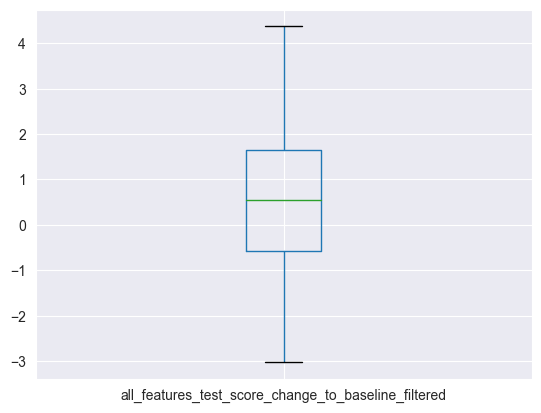

count    72.000000
mean      0.156854
std       5.614624
min     -22.418879
25%      -0.572342
50%       0.544922
75%       1.638482
max      24.070615
Name: all_features_test_score_change_to_baseline_filtered, dtype: float64
only improved datasets


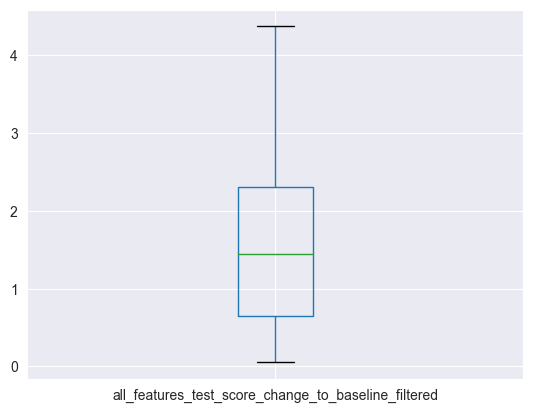

count    43.000000
mean      2.560097
std       4.155687
min       0.053305
25%       0.649830
50%       1.442025
75%       2.308671
max      24.070615
Name: all_features_test_score_change_to_baseline_filtered, dtype: float64


In [104]:
df = df_results.loc[:, df_results.columns.str.contains("all_features|dataset_id|dataset_name", regex=True)]
df.head()

calc_stats_and_plot_all_features_or_filtered(df, test_score_change_to_baseline_filtered_columnname="all_features_test_score_change_to_baseline_filtered",
test_score_greater_baseline_filtered_test_score_columnname="all_features_test_score > baseline_filtered_test_score")

# Baseline features filtered vs. all features filtered

Total improved Datasets over all features: 37 (51.39%)
all datasets


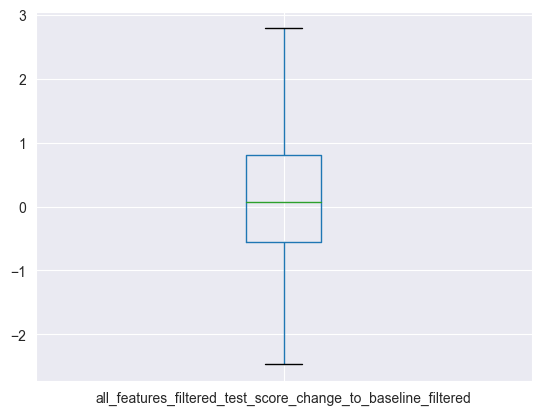

count    72.000000
mean      0.254668
std       2.905921
min     -11.029412
25%      -0.554856
50%       0.067047
75%       0.803761
max      15.686275
Name: all_features_filtered_test_score_change_to_baseline_filtered, dtype: float64
only improved datasets


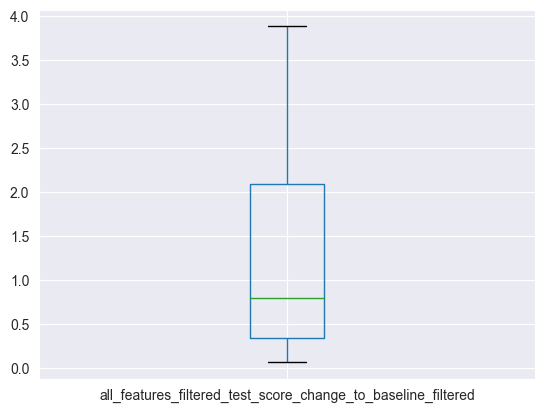

count    37.000000
mean      1.729899
std       2.888676
min       0.066890
25%       0.346021
50%       0.799017
75%       2.090209
max      15.686275
Name: all_features_filtered_test_score_change_to_baseline_filtered, dtype: float64


In [105]:
df = df_results.loc[:, df_results.columns.str.contains("all_features_filtered|dataset_id|dataset_name", regex=True)]
df.head()

calc_stats_and_plot_all_features_or_filtered(df, test_score_change_to_baseline_filtered_columnname="all_features_filtered_test_score_change_to_baseline_filtered",
test_score_greater_baseline_filtered_test_score_columnname="all_features_filtered_test_score > baseline_filtered_test_score")

# Baseline features filtered vs. Stacking Baseline features filtered

In [106]:
df = df_results.loc[:, df_results.columns.str.contains("stacking_baseline_filtered|baseline_filtered_test_score|dataset_id|dataset_name", regex=True)]
df = df.loc[:, ~df.columns.str.contains("only|train|time|hyper|pca|lda|umap|kmeans|>", regex=True)]
df.head()

dataset_id   dataset_name  baseline_filtered_test_score  \
0           3       kr-vs-kp                      0.975161   
1           6         letter                      0.957794   
2          11  balance-scale                      0.873239   
3          12  mfeat-factors                      0.957353   
4          14  mfeat-fourier                      0.850000   

   stacking_baseline_filtered_test_score  
0                               0.980681  
1                               0.968971  
2                               0.938967  
3                               0.964706  
4                               0.869118

In [107]:
df["stacking>baseline"] = df['stacking_baseline_filtered_test_score'] > df["baseline_filtered_test_score"]
df["stacking=baseline"] = df['stacking_baseline_filtered_test_score'] == df["baseline_filtered_test_score"]
df["stacking<baseline"] = df['stacking_baseline_filtered_test_score'] < df["baseline_filtered_test_score"]

print(f"stacking>baseline: {df['stacking>baseline'].sum()}")
print(f"stacking=baseline: {df['stacking=baseline'].sum()}")
print(f"stacking<baseline: {df['stacking<baseline'].sum()}")

df["test_score_change_to_baseline_filtered_columnname"] = (df["stacking_baseline_filtered_test_score"] / df['baseline_filtered_test_score'] -1) *100
df.head()

stacking>baseline: 56
stacking=baseline: 2
stacking<baseline: 14


dataset_id   dataset_name  baseline_filtered_test_score  \
0           3       kr-vs-kp                      0.975161   
1           6         letter                      0.957794   
2          11  balance-scale                      0.873239   
3          12  mfeat-factors                      0.957353   
4          14  mfeat-fourier                      0.850000   

   stacking_baseline_filtered_test_score  stacking>baseline  \
0                               0.980681               True   
1                               0.968971               True   
2                               0.938967               True   
3                               0.964706               True   
4                               0.869118               True   

   stacking=baseline  stacking<baseline  \
0              False              False   
1              False              False   
2              False              False   
3              False              False   
4              False              False   

   test_score_change_to_baseline_filtered_columnname  
0                                           0.566038  
1                                           1.166897  
2                                           7.526882  
3                                           0.768049  
4                                           2.249135

Total improved Datasets over all features: 56 (77.78%)
all datasets


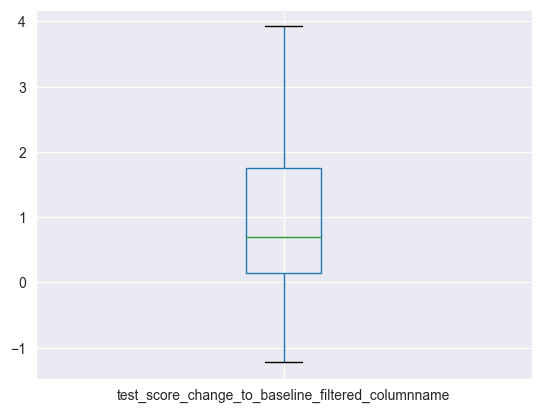

count    72.000000
mean      1.279973
std       4.161623
min     -21.568627
25%       0.142382
50%       0.698390
75%       1.751478
max      16.001990
Name: test_score_change_to_baseline_filtered_columnname, dtype: float64
only improved datasets


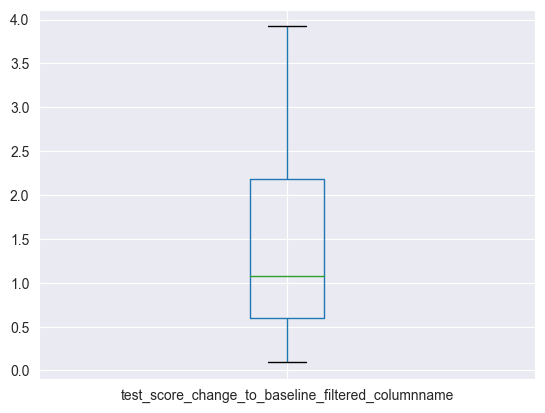

count    56.000000
mean      2.299354
std       3.134580
min       0.092678
25%       0.593317
50%       1.080961
75%       2.180989
max      16.001990
Name: test_score_change_to_baseline_filtered_columnname, dtype: float64


In [108]:
calc_stats_and_plot_all_features_or_filtered(df, test_score_change_to_baseline_filtered_columnname="test_score_change_to_baseline_filtered_columnname", test_score_greater_baseline_filtered_test_score_columnname="stacking>baseline")

# Stacking all features vs. Stacking Baseline features filtered

In [109]:
df = df_results.loc[:, df_results.columns.str.contains("stacking_all_features|stacking_baseline_filtered|dataset_id|dataset_name", regex=True)]
df = df.loc[:, ~df.columns.str.contains("only|train|time|hyper|pca|lda|umap|kmeans|autoencoder|selected_features|any", regex=True)]
df.head()

dataset_id   dataset_name  stacking_baseline_filtered_test_score  \
0           3       kr-vs-kp                               0.980681   
1           6         letter                               0.968971   
2          11  balance-scale                               0.938967   
3          12  mfeat-factors                               0.964706   
4          14  mfeat-fourier                               0.869118   

   stacking_all_features_test_score  
0                          0.992640  
1                          0.962941  
2                          0.910798  
3                          0.975000  
4                          0.841176

In [110]:
df["stacking_all_features>stacking_baseline_features"] = df['stacking_all_features_test_score'] > df['stacking_baseline_filtered_test_score']

print(f"stacking_all_features>stacking_baseline_features: {df['stacking_all_features>stacking_baseline_features'].sum()}")

df["test_score_change_to_baseline_filtered_columnname"] = (df["stacking_all_features_test_score"] / df['stacking_baseline_filtered_test_score'] -1) *100

df

stacking_all_features>stacking_baseline_features: 36


dataset_id                            dataset_name  \
0            3                                kr-vs-kp   
1            6                                  letter   
2           11                           balance-scale   
3           12                           mfeat-factors   
4           14                           mfeat-fourier   
5           15                                breast-w   
6           16                          mfeat-karhunen   
7           18                     mfeat-morphological   
8           22                           mfeat-zernike   
9           23                                     cmc   
10          28                               optdigits   
11          29                         credit-approval   
12          31                                credit-g   
13          32                               pendigits   
14          37                                diabetes   
15          38                                    sick   
16          44                                spambase   
17          46                                  splice   
18          50                             tic-tac-toe   
19          54                                 vehicle   
20         151                             electricity   
21         182                                satimage   
22         188                              eucalyptus   
23         300                                  isolet   
24         307                                   vowel   
25         458                  analcatdata_authorship   
26         469                        analcatdata_dmft   
27         554                               mnist_784   
28        1049                                     pc4   
29        1050                                     pc3   
30        1053                                     jm1   
31        1063                                     kc2   
32        1067                                     kc1   
33        1068                                     pc1   
34        1461                          bank-marketing   
35        1462                 banknote-authentication   
36        1464        blood-transfusion-service-center   
37        1468                                  cnae-9   
38        1475             first-order-theorem-proving   
39        1478                                     har   
40        1480                                    ilpd   
41        1485                                 madelon   
42        1486                                   nomao   
43        1487                         ozone-level-8hr   
44        1489                                 phoneme   
45        1494                             qsar-biodeg   
46        1497                   wall-robot-navigation   
47        1501                                 semeion   
48        1510                                    wdbc   
49        1590                                   adult   
50        4134                             Bioresponse   
51        4534                        PhishingWebsites   
52        4538       GesturePhaseSegmentationProcessed   
53        6332                          cylinder-bands   
54       23381                           dresses-sales   
55       23517                             numerai28.6   
56       40499                                 texture   
57       40668                               connect-4   
58       40670                                     dna   
59       40701                                   churn   
60       40923                        Devnagari-Script   
61       40927                                CIFAR_10   
62       40966                             MiceProtein   
63       40975                                     car   
64       40978                 Internet-Advertisements   
65       40979                             mfeat-pixel   
66       40982                      steel-plates-fault   
67       40983                                    wilt   
68

Total improved Datasets over all features: 36 (50.0%)
all datasets


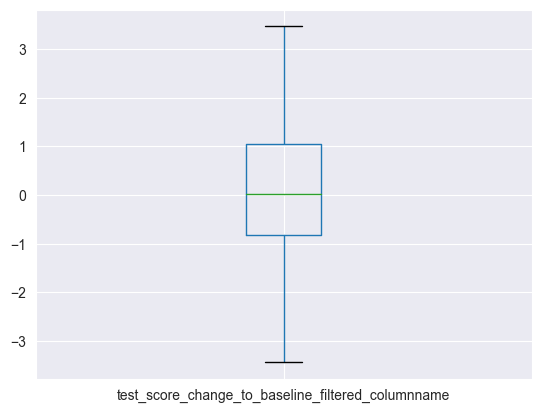

count    72.000000
mean     -0.087977
std       5.940388
min     -27.167630
25%      -0.828000
50%       0.030902
75%       1.059580
max      25.000000
Name: test_score_change_to_baseline_filtered_columnname, dtype: float64
only improved datasets


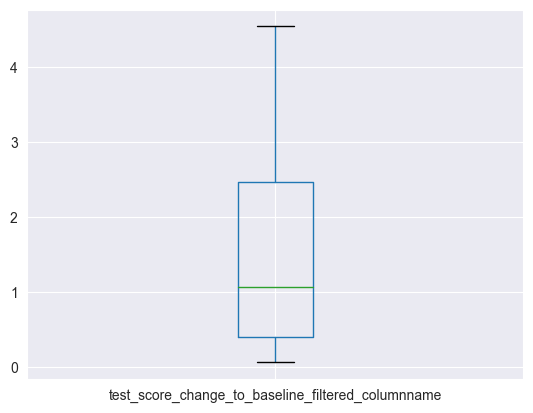

count    36.000000
mean      2.728200
std       5.288663
min       0.061805
25%       0.396477
50%       1.062078
75%       2.464665
max      25.000000
Name: test_score_change_to_baseline_filtered_columnname, dtype: float64


In [111]:
calc_stats_and_plot_all_features_or_filtered(df, test_score_change_to_baseline_filtered_columnname="test_score_change_to_baseline_filtered_columnname", test_score_greater_baseline_filtered_test_score_columnname="stacking_all_features>stacking_baseline_features")

# Stacking improved features vs. Stacking Baseline features filtered

In [112]:
df = df_results.loc[:, df_results.columns.str.contains("stacking_improved_features|stacking_baseline_filtered|dataset_id|dataset_name", regex=True)]
df = df.loc[:, ~df.columns.str.contains("only|train|time|hyper|pca|lda|umap|kmeans|autoencoder|selected_features|any", regex=True)]
df.head()

dataset_id   dataset_name  stacking_baseline_filtered_test_score  \
0           3       kr-vs-kp                               0.980681   
1           6         letter                               0.968971   
2          11  balance-scale                               0.938967   
3          12  mfeat-factors                               0.964706   
4          14  mfeat-fourier                               0.869118   

   stacking_improved_features_test_score  
0                               0.990800  
1                               0.968971  
2                               0.943662  
3                               0.976471  
4                               0.848529

In [113]:
df["stacking_improved_features>stacking_baseline_features"] = df['stacking_improved_features_test_score'] > df['stacking_baseline_filtered_test_score']

print(f"stacking_improved_features>stacking_baseline_features: {df['stacking_improved_features>stacking_baseline_features'].sum()}")

df["test_score_change_to_baseline_filtered_columnname"] = (df["stacking_improved_features_test_score"] / df['stacking_baseline_filtered_test_score'] -1) *100

df

stacking_improved_features>stacking_baseline_features: 36


dataset_id                            dataset_name  \
0            3                                kr-vs-kp   
1            6                                  letter   
2           11                           balance-scale   
3           12                           mfeat-factors   
4           14                           mfeat-fourier   
5           15                                breast-w   
6           16                          mfeat-karhunen   
7           18                     mfeat-morphological   
8           22                           mfeat-zernike   
9           23                                     cmc   
10          28                               optdigits   
11          29                         credit-approval   
12          31                                credit-g   
13          32                               pendigits   
14          37                                diabetes   
15          38                                    sick   
16          44                                spambase   
17          46                                  splice   
18          50                             tic-tac-toe   
19          54                                 vehicle   
20         151                             electricity   
21         182                                satimage   
22         188                              eucalyptus   
23         300                                  isolet   
24         307                                   vowel   
25         458                  analcatdata_authorship   
26         469                        analcatdata_dmft   
27         554                               mnist_784   
28        1049                                     pc4   
29        1050                                     pc3   
30        1053                                     jm1   
31        1063                                     kc2   
32        1067                                     kc1   
33        1068                                     pc1   
34        1461                          bank-marketing   
35        1462                 banknote-authentication   
36        1464        blood-transfusion-service-center   
37        1468                                  cnae-9   
38        1475             first-order-theorem-proving   
39        1478                                     har   
40        1480                                    ilpd   
41        1485                                 madelon   
42        1486                                   nomao   
43        1487                         ozone-level-8hr   
44        1489                                 phoneme   
45        1494                             qsar-biodeg   
46        1497                   wall-robot-navigation   
47        1501                                 semeion   
48        1510                                    wdbc   
49        1590                                   adult   
50        4134                             Bioresponse   
51        4534                        PhishingWebsites   
52        4538       GesturePhaseSegmentationProcessed   
53        6332                          cylinder-bands   
54       23381                           dresses-sales   
55       23517                             numerai28.6   
56       40499                                 texture   
57       40668                               connect-4   
58       40670                                     dna   
59       40701                                   churn   
60       40923                        Devnagari-Script   
61       40927                                CIFAR_10   
62       40966                             MiceProtein   
63       40975                                     car   
64       40978                 Internet-Advertisements   
65       40979                             mfeat-pixel   
66       40982                      steel-plates-fault   
67       40983                                    wilt   
68

Total improved Datasets over all features: 36 (50.0%)
all datasets


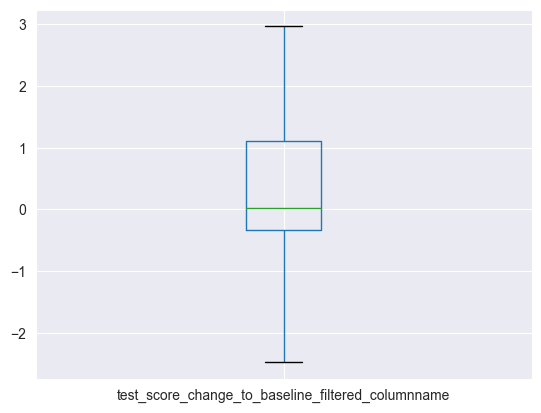

count    72.000000
mean      0.246404
std       6.386914
min     -26.878613
25%      -0.323639
50%       0.030902
75%       1.107017
max      32.500000
Name: test_score_change_to_baseline_filtered_columnname, dtype: float64
only improved datasets


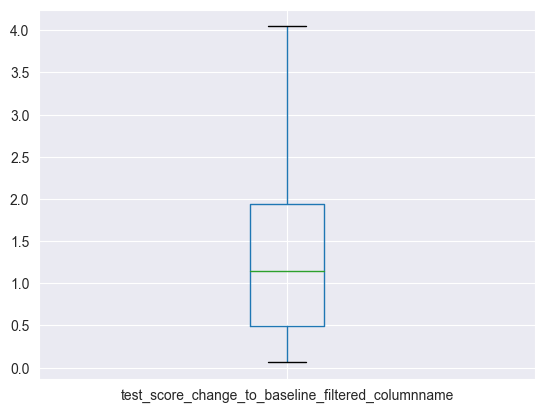

count    36.000000
mean      3.010163
std       6.348894
min       0.061805
25%       0.490035
50%       1.144515
75%       1.933960
max      32.500000
Name: test_score_change_to_baseline_filtered_columnname, dtype: float64


In [114]:
calc_stats_and_plot_all_features_or_filtered(df, test_score_change_to_baseline_filtered_columnname="test_score_change_to_baseline_filtered_columnname", test_score_greater_baseline_filtered_test_score_columnname="stacking_improved_features>stacking_baseline_features")

# Any mode (without stacking) vs. Baseline

In [115]:
df = df_results.loc[:, df_results.columns.str.contains("_test_score > baseline_filtered_test_score|dataset_id|dataset_name", regex=True)]
#df = df.loc[:, ~df.columns.str.contains("only|train|time|hyper|pca|lda|umap|kmeans|autoencoder|selected_features|any", regex=True)]
df

#[print(column) for column in df.columns]

dataset_id                            dataset_name  \
0            3                                kr-vs-kp   
1            6                                  letter   
2           11                           balance-scale   
3           12                           mfeat-factors   
4           14                           mfeat-fourier   
5           15                                breast-w   
6           16                          mfeat-karhunen   
7           18                     mfeat-morphological   
8           22                           mfeat-zernike   
9           23                                     cmc   
10          28                               optdigits   
11          29                         credit-approval   
12          31                                credit-g   
13          32                               pendigits   
14          37                                diabetes   
15          38                                    sick   
16          44                                spambase   
17          46                                  splice   
18          50                             tic-tac-toe   
19          54                                 vehicle   
20         151                             electricity   
21         182                                satimage   
22         188                              eucalyptus   
23         300                                  isolet   
24         307                                   vowel   
25         458                  analcatdata_authorship   
26         469                        analcatdata_dmft   
27         554                               mnist_784   
28        1049                                     pc4   
29        1050                                     pc3   
30        1053                                     jm1   
31        1063                                     kc2   
32        1067                                     kc1   
33        1068                                     pc1   
34        1461                          bank-marketing   
35        1462                 banknote-authentication   
36        1464        blood-transfusion-service-center   
37        1468                                  cnae-9   
38        1475             first-order-theorem-proving   
39        1478                                     har   
40        1480                                    ilpd   
41        1485                                 madelon   
42        1486                                   nomao   
43        1487                         ozone-level-8hr   
44        1489                                 phoneme   
45        1494                             qsar-biodeg   
46        1497                   wall-robot-navigation   
47        1501                                 semeion   
48        1510                                    wdbc   
49        1590                                   adult   
50        4134                             Bioresponse   
51        4534                        PhishingWebsites   
52        4538       GesturePhaseSegmentationProcessed   
53        6332                          cylinder-bands   
54       23381                           dresses-sales   
55       23517                             numerai28.6   
56       40499                                 texture   
57       40668                               connect-4   
58       40670                                     dna   
59       40701                                   churn   
60       40923                        Devnagari-Script   
61       40927                                CIFAR_10   
62       40966                             MiceProtein   
63       40975                                     car   
64       40978                 Internet-Advertisements   
65       40979                             mfeat-pixel   
66       40982                      steel-plates-fault   
67       40983                                    wilt   
68

## new features on basefeatures vs baseline

In [116]:
df["any_feature_type_clean_test_score > baseline_filtered_test_score"].sum()


67

## new features on basefeatures filtered vs baseline

In [117]:
df["any_feature_type_clean_filtered_test_score > baseline_filtered_test_score"].sum()

46

## both modi vs baseline

In [118]:
df[["any_feature_type_clean_test_score > baseline_filtered_test_score", "any_feature_type_clean_filtered_test_score > baseline_filtered_test_score"]].any(axis="columns").sum()

67

# Best mode (without stacking) vs. Baseline

In [119]:
df = df_results.loc[:, df_results.columns.str.contains("test_score|dataset_id|dataset_name", regex=True)]
df = df.loc[:, ~df.columns.str.contains("stacking|>|time|change", regex=True)]
df.head()

dataset_id   dataset_name  baseline_filtered_test_score  \
0           3       kr-vs-kp                      0.975161   
1           6         letter                      0.957794   
2          11  balance-scale                      0.873239   
3          12  mfeat-factors                      0.957353   
4          14  mfeat-fourier                      0.850000   

   only_pca_test_score  only_kpca_test_score  only_kmeans_test_score  \
0             0.565777              0.540018                0.537259   
1             0.131765              0.121471                0.053971   
2             0.558685              0.568075                0.779343   
3             0.745588              0.551471                0.670588   
4             0.282353              0.279412                0.154412   

   only_lda_test_score  only_umap_test_score  only_autoencoder_test_score  \
0             0.952162              0.664213                     0.916283   
1             0.196471              0.706912                     0.619118   
2             0.906103              0.708920                     0.666667   
3             0.983824              0.901471                     0.917647   
4             0.833824              0.629412                     0.704412   

   only_pca_filtered_test_score  only_kpca_filtered_test_score  \
0                      0.650414                       0.729531   
1                      0.206176                       0.220147   
2                      0.558685                       0.568075   
3                      0.652941                       0.645588   
4                      0.719118                       0.454412   

   only_kmeans_filtered_test_score  only_lda_filtered_test_score  \
0                         0.730451                      0.943882   
1                         0.434559                      0.251324   
2                         0.779343                      0.906103   
3                         0.708824                      0.958824   
4                         0.547059                      0.829412   

   only_umap_filtered_test_score  only_autoencoder_filtered_test_score  \
0                       0.688132                              0.928243   
1                       0.571029                              0.666912   
2                       0.708920                              0.455399   
3                       0.894118                              0.922059   
4                       0.766176                              0.736765   

   baseline_filtered_pca_test_score  baseline_filtered_kpca_test_score  \
0                          0.978841                           0.981601   
1                          0.953971                           0.960000   
2                          0.863850                           0.863850   
3                          0.955882                           0.958824   
4                          0.850000                           0.848529   

   baseline_filtered_kmeans_test_score  baseline_filtered_lda_test_score  \
0                             0.977001                          0.988960   
1                             0.960147                          0.956176   
2                             0.845070                          0.920188   
3                             0.954412                          0.982353   
4                             0.844118                          0.835294   

   baseline_filtered_umap_test_score  \
0                           0.984361   
1                           0.955735   
2                           0.840376   
3                           0.951471   
4                           0.850000   

   baseline_filtered_autoencoder_test_score  \
0                                  0.982521   
1                                  0.947647   
2                                  0.859155   
3                                  0.952941   
4                                  0.842647   

   baseline_filtered_pca_filtered_test_score  \
0        

In [120]:
# get all column with test_scores
test_score_columns = list(df.columns)
non_test_score_columns_and_baseline = ["dataset_id", "dataset_name", "baseline_filtered_test_score"]
test_score_columns = [column for column in test_score_columns if column not in non_test_score_columns_and_baseline]

# get the highest scoring model test_score in a column
df["highest_test_score"] = df[test_score_columns].max(axis="columns")

# compare best_score to baseline score
df["highest_test_score>baseline"] = df["highest_test_score"] > df["baseline_filtered_test_score"]

# calc the change from best test_score to baseline test_score
df["test_score_change_to_baseline_filtered_columnname"] = (df["highest_test_score"] / df['baseline_filtered_test_score'] -1) *100


Total improved Datasets over all features: 67 (93.06%)
all datasets


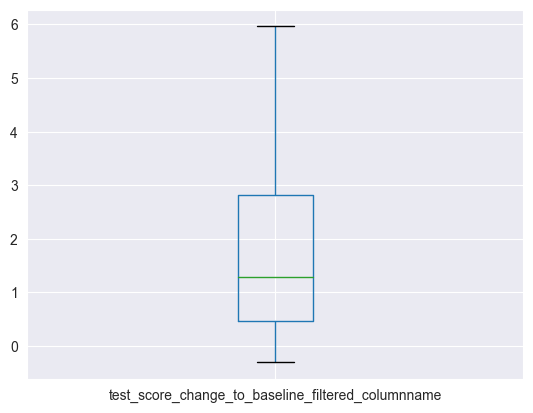

count    72.000000
mean      2.546104
std       3.890400
min      -0.305810
25%       0.464387
50%       1.291404
75%       2.812649
max      24.159350
Name: test_score_change_to_baseline_filtered_columnname, dtype: float64
only improved datasets


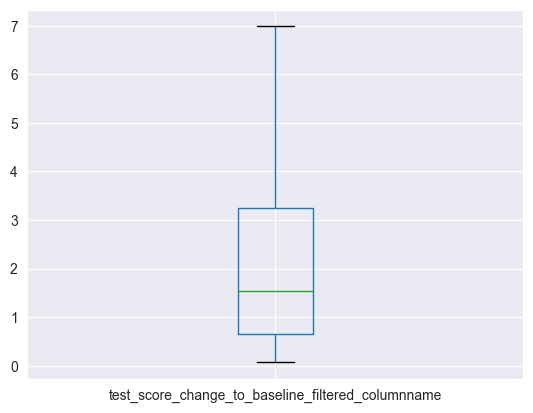

count    67.000000
mean      2.746514
std       3.961538
min       0.066890
25%       0.656775
50%       1.539942
75%       3.250221
max      24.159350
Name: test_score_change_to_baseline_filtered_columnname, dtype: float64


In [121]:
calc_stats_and_plot_all_features_or_filtered(df, test_score_change_to_baseline_filtered_columnname="test_score_change_to_baseline_filtered_columnname", test_score_greater_baseline_filtered_test_score_columnname="highest_test_score>baseline")